# **Final Project: Predicting Online News Popularity with Machine Learning**

**Group Members:** Anqi Gu, Evelyn Zhou, Han Zhang, Hongyu Liao, Yiwei Li

**Course:** MSDS 422 Practical Machine Learning

**Date:** March 10, 2025

In [4]:
# Import necessary libraries for data analysis, visualization, and machine learning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
import matplotlib.gridspec as gridspec
import xgboost as xgb
import lightgbm as lgb
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')

In [5]:
# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Plot settings
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## **Introduction**
In today's rapid digital world, online news consumption is quickly increasing. It trends to reshape the media landscape. For content creators and publishers, the key to success depends on driving engagement such as writing articles that engage audiences and resonate deeply. In addition to boosting readership, understanding content engagement allows publishers to expand their reach in an increasingly competitive digital space.
  
This project explores the dynamics of online news popularity by examining the characteristics and influencing factors of different news types. By categorizing "shares" into low, medium, and high engagement levels, our group apply four machine learning techniques, which are Random Forest, XGBoost, LightGBM, and Feedforward Neural Networks to find what truly drives reader interaction and develop powerful predictive models.  

## **Dataset**

This dataset used in our project can be found from the UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/332/online+news+popularity). It contains metadata and social feedback from 39,797 articles published on "*Mashable*"(www.mashable.com). It consists of 61 attributes, categorized as predictive features(58), non-predictive fields(2), and the target variable(1).  

### **1. Non-Predictive Attributes**  
- **`url`**: The URL of the article.  
- **`timedelta`**: The number of days between the article's publication and dataset acquisition.  

### **2. Predictive Attributes**  

- **n_tokens_title**: Number of words in the article title.  
- **n_tokens_content**: Number of words in the article body.  
- **n_unique_tokens**: Proportion of unique words in the content.  
- **n_non_stop_words**: Proportion of non-stop words in the content.  
- **n_non_stop_unique_tokens**: Proportion of unique non-stop words in the content.  
- **average_token_length**: Average length of words in the content.  
- **num_hrefs**: Number of hyperlinks in the article.  
- **num_self_hrefs**: Number of links to other *Mashable* articles.  
- **num_imgs**: Number of images in the article.  
- **num_videos**: Number of videos in the article.  
- **num_keywords**: Number of keywords assigned in the metadata.  
- **data_channel_is_lifestyle**: Is the article in the "Lifestyle" category?  
- **data_channel_is_entertainment**: Is the article in the "Entertainment" category?  
- **data_channel_is_bus**: Is the article in the "Business" category?  
- **data_channel_is_socmed**: Is the article in the "Social Media" category?  
- **data_channel_is_tech**: Is the article in the "Tech" category?  
- **data_channel_is_world**: Is the article in the "World" category?  
- **kw_min_min**: Minimum shares of the least popular keyword.  
- **kw_max_min**: Maximum shares of the least popular keyword.  
- **kw_avg_min**: Average shares of the least popular keyword.  
- **kw_min_max**: Minimum shares of the most popular keyword.  
- **kw_max_max**: Maximum shares of the most popular keyword.  
- **kw_avg_max**: Average shares of the most popular keyword.  
- **kw_min_avg**: Minimum shares of the average keyword.  
- **kw_max_avg**: Maximum shares of the average keyword.  
- **kw_avg_avg**: Average shares of the average keyword.  
- **self_reference_min_shares**: Minimum shares of referenced *Mashable* articles.  
- **self_reference_max_shares**: Maximum shares of referenced *Mashable* articles.  
- **self_reference_avg_sharess**: Average shares of referenced *Mashable* articles.  
- **weekday_is_monday** : Was the article published on Monday?  
- **weekday_is_tuesday** : Was the article published on Tuesday?  
- **weekday_is_wednesday** : Was the article published on Wednesday?  
- **weekday_is_thursday** : Was the article published on Thursday?  
- **weekday_is_friday** : Was the article published on Friday?  
- **weekday_is_saturday** : Was the article published on Saturday?  
- **weekday_is_sunday** : Was the article published on Sunday?  
- **is_weekend** : Was the article published on a weekend?    
- **LDA_00**, **LDA_01**, **LDA_02**, **LDA_03**, **LDA_04**: Probabilities of an article belonging to five different topics.  
- **global_subjectivity**: Subjectivity score of the article content.  
- **global_sentiment_polarity**: Overall sentiment polarity of the content.  
- **global_rate_positive_words**: Proportion of positive words in the content.  
- **global_rate_negative_words**: Proportion of negative words in the content.  
- **rate_positive_words**: Rate of positive words among non-neutral tokens.  
- **rate_negative_words**: Rate of negative words among non-neutral tokens.  
- **avg_positive_polarity**: Average polarity score of positive words.  
- **min_positive_polarity**: Minimum polarity score of positive words.  
- **max_positive_polarity**: Maximum polarity score of positive words.  
- **avg_negative_polarity**: Average polarity score of negative words.  
- **min_negative_polarity**: Minimum polarity score of negative words.  
- **max_negative_polarity**: Maximum polarity score of negative words.  
- **title_subjectivity`**: Subjectivity score of the title.  
- **title_sentiment_polarity**: Sentiment polarity of the title.  
- **abs_title_subjectivity**: Absolute subjectivity level of the title.  
- **abs_title_sentiment_polarity**: Absolute sentiment polarity level of the title.  

### **3. Target Variable**  
- **shares**: The number of times an article was shared online. This is the target variable for predicting article popularity.  

In [6]:
# Read data
file_path = 'Data/OnlineNewsPopularity_Final.xls'
df = pd.read_csv(file_path)

In [7]:
# Drop unnecessary columns
columns_to_drop = ['url', 'timedelta']
if 'author_name' in df.columns:
    columns_to_drop.append('author_name')
df = df.drop(columns_to_drop, axis=1, errors='ignore')

We choose to drop non-predictive attributes in machine learning preprocessing because these features "url" and "timedelta" typically do not contribute meaningful information into what drives article engagement or shares. It may introduce noise which will degrade model performance.  Overall, dropping these two columns allows the model to focus on the most relevant predictors.


## **EDA**

Before EDA, we aim to explore the dataset structure, check for missing values, and analyze key features like content, timing, and sentiment. We hope to identify patterns that influence article shares and guiding feature selection.

In [8]:
# 1. Dataset Overview
print("="*50)
print("1. Dataset Overview")
print(f"Dataset shape: {df.shape}")
print(f"Dataset memory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")
print("\nData type distribution:")
print(df.dtypes.value_counts())

# Display first few rows
print("\nFirst 5 rows of the dataset:")
display(df.head())

1. Dataset Overview
Dataset shape: (39644, 65)
Dataset memory usage: 19.66 MB

Data type distribution:
float64    34
int64      25
object      6
Name: count, dtype: int64

First 5 rows of the dataset:


n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0              12               219         0.663594               1.0   
1               9               255         0.604743               1.0   
2               9               211         0.575130               1.0   
3               9               531         0.503788               1.0   
4              13              1072         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385          4               2         1           0   
1                  0.791946          3               1         1           0   
2                  0.663866          3               1         1           0   
3                  0.665635          9               0         1           0   
4                  0.540890         19              19        20           0   

   average_token_length  num_keywords  data_channel_is_lifestyle  \
0              4.680365             5                          0   
1              4.913725             4                          0   
2              4.393365             6                          0   
3              4.404896             7                          0   
4              4.682836             7                          0   

   data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  \
0                              1                    0                       0   
1                              0                    1                       0   
2                              0                    1                       0   
3                              1                    0                       0   
4                              0                    0                       0   

   data_channel_is_tech  data_channel_is_world  kw_min_min  kw_max_min  \
0                     0                      0           0         0.0   
1                     0                      0           0         0.0   
2                     0                      0           0         0.0   
3                     0                      0           0         0.0   
4                     1                      0           0         0.0   

   kw_avg_min  kw_min_max  kw_max_max  kw_avg_max  kw_min_avg  kw_max_avg  \
0         0.0           0           0         0.0         0.0         0.0   
1         0.0           0           0         0.0         0.0         0.0   
2         0.0           0           0         0.0         0.0         0.0   
3         0.0           0           0         0.0         0.0         0.0   
4         0.0           0           0         0.0         0.0         0.0   

   kw_avg_avg  self_reference_min_shares  self_reference_max_shares  \
0         0.0                      496.0                      496.0   
1         0.0                        0.0                        0.0   
2         0.0                      918.0                      918.0   
3         0.0                        0.0                        0.0   
4         0.0                      545.0                    16000.0   

   self_reference_avg_sharess  weekday_is_monday  weekday_is_tuesday  \
0                  496.000000                  1                   0   
1                    0.000000                  1                   0   
2                  918.000000                  1                   0   
3                    0.000000                  1                   0   
4                 3151.157895                  1                   0   

   weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  \
0                     0                    0                  0   
1                     0                    0                  0   
2                     0                    0                  0   
3                     0                    0                  0   
4                     0                    0                  0   

   weekday

In [9]:
# Check for missing values
print("\nMissing values per column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.any() > 0 else "No missing values found")

# Check for object columns
object_columns = df.select_dtypes(include=['object']).columns
print("\nObject columns in the dataset:")
print(object_columns)

# Display unique values in each object column
for col in object_columns:
    print(f"\nUnique values in {col}: {df[col].nunique()}")
    print(df[col].value_counts().head())


Missing values per column:
No missing values found

Object columns in the dataset:
Index(['shares', 'followers', 'followers_original', 'channel', 'day_type',
       'author_level'],
      dtype='object')

Unique values in shares: 2
shares
High    21154
Low     18490
Name: count, dtype: int64

Unique values in followers: 7
followers
Low              15234
Unknown           8643
Medium            8200
Reprinted         3747
Extremely Low     2163
Name: count, dtype: int64

Unique values in followers_original: 151
followers_original
Null         9297
Reprinted    3747
5177         1508
9383         1467
9547         1457
Name: count, dtype: int64

Unique values in channel: 7
channel
world            8427
tech             7346
entertainment    7057
bus              6258
other            6134
Name: count, dtype: int64

Unique values in day_type: 2
day_type
weekday    34454
weekend     5190
Name: count, dtype: int64

Unique values in author_level: 3
author_level
Medium    22089
High      17


2. Target Variable Analysis

Shares category distribution:
shares
High    21154
Low     18490
Name: count, dtype: int64

Percentage distribution:
shares
High    53.36
Low     46.64
Name: count, dtype: float64


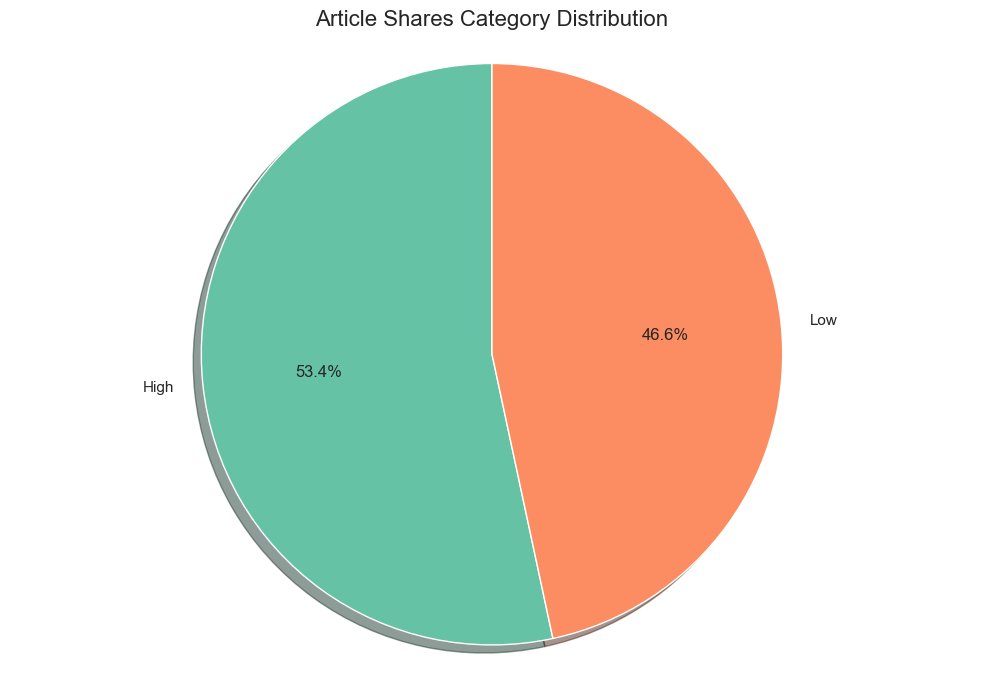

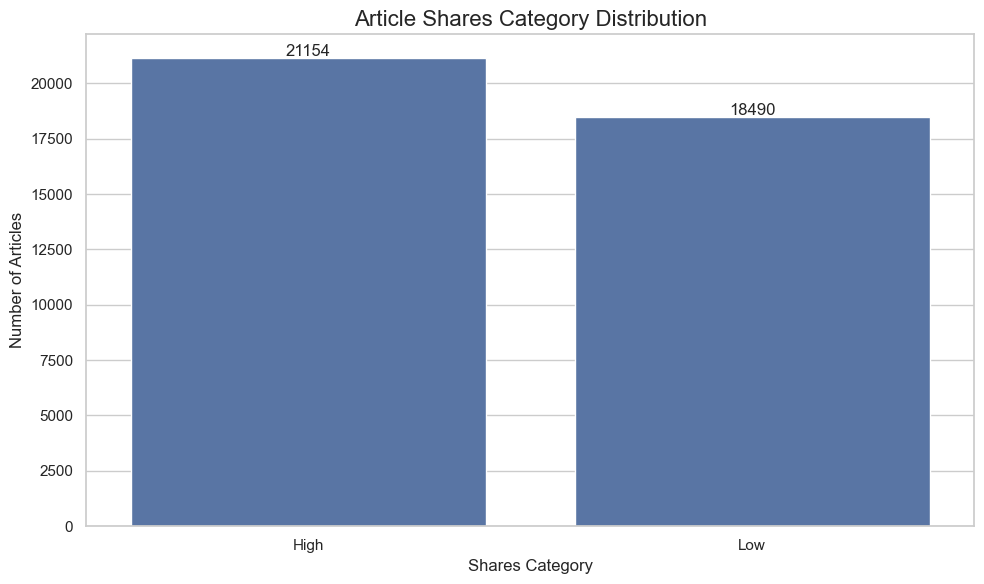

In [10]:
# 2. Target Variable Analysis
print("\n" + "="*50)
print("2. Target Variable Analysis")

# Check shares column type and process accordingly
if 'shares' in df.columns:
    if df['shares'].dtype == 'object':
        # If shares is object type, show category distribution
        shares_counts = df['shares'].value_counts()
        print("\nShares category distribution:")
        print(shares_counts)
        print("\nPercentage distribution:")
        print((shares_counts / len(df) * 100).round(2))
        
        # Pie chart
        plt.figure(figsize=(10, 7))
        plt.pie(shares_counts, labels=shares_counts.index, autopct='%1.1f%%', 
                shadow=True, startangle=90, colors=sns.color_palette("Set2"))
        plt.title('Article Shares Category Distribution', fontsize=16)
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.tight_layout()
        plt.show()
        
        # Bar chart
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=shares_counts.index, y=shares_counts.values)
        plt.title('Article Shares Category Distribution', fontsize=16)
        plt.xlabel('Shares Category')
        plt.ylabel('Number of Articles')
        
        # Add value labels on bars
        for i, v in enumerate(shares_counts.values):
            ax.text(i, v + 100, f"{v}", ha='center')
            
        plt.tight_layout()
        plt.show()
    
    elif df['shares'].dtype == 'int32' or df['shares'].dtype == 'int64' or df['shares'].dtype == 'float64':
        # If shares is numeric, show value statistics
        print("\nShares value statistics:")
        print(df['shares'].describe())
        
        # Histogram
        plt.figure(figsize=(12, 6))
        sns.histplot(df['shares'], bins=30, kde=True)
        plt.title('Article Shares Distribution', fontsize=16)
        plt.xlabel('Number of Shares')
        plt.ylabel('Number of Articles')
        plt.tight_layout()
        plt.show()

**Interpretation of the Pie Chart:**
The pie chart shows the proportion of articles in each category. It confirms that 76.6% of articles fall into the Low and Medium engagement levels. It highlights that achieving high or viral status is really rare. The sharp decline in articles with higher engagement suggests that only a select few pieces resonate widely with audiences. So understanding the factors that drive virality is important. 

**Interpretation of the Bar Chart:**
The bar chart displays the distribution of articles across different share categories. The majority of articles fall into the Low (18,490 articles, ~46.6%) and Medium (13,075 articles, ~33%) categories, while fewer articles are classified as High (6,079 articles, ~15.3%) or Viral (2,000 articles, ~5%). This indicates that most articles struggle to gain high engagement. Only a small fraction achieving viral success.

In [11]:
# 3. Content Feature Analysis
print("\n" + "="*50)
print("3. Content Feature Analysis")

# Select content-related features
content_features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 
                   'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 
                   'average_token_length', 'num_keywords']

# Filter to include only features that exist in the dataframe
content_features = [f for f in content_features if f in df.columns]

# Descriptive statistics for content features
content_stats = df[content_features].describe().T
content_stats['cv'] = content_stats['std'] / content_stats['mean']  # Coefficient of variation
print("\nContent feature statistics:")
display(content_stats)


3. Content Feature Analysis

Content feature statistics:


count        mean         std  min         25%  \
n_tokens_title        39644.0   10.398749    2.114037  2.0    9.000000   
n_tokens_content      39644.0  546.514731  471.107508  0.0  246.000000   
n_unique_tokens       39644.0    0.548216    3.520708  0.0    0.470870   
num_hrefs             39644.0   10.883690   11.332017  0.0    4.000000   
num_self_hrefs        39644.0    3.293638    3.855141  0.0    1.000000   
num_imgs              39644.0    4.544143    8.309434  0.0    1.000000   
num_videos            39644.0    1.249874    4.107855  0.0    0.000000   
average_token_length  39644.0    4.548239    0.844406  0.0    4.478404   
num_keywords          39644.0    7.223767    1.909130  1.0    6.000000   

                             50%         75%          max        cv  
n_tokens_title         10.000000   12.000000    23.000000  0.203297  
n_tokens_content      409.000000  716.000000  8474.000000  0.862022  
n_unique_tokens         0.539226    0.608696   701.000000  6.422122  
num_hrefs               8.000000   14.000000   304.000000  1.041193  
num_self_hrefs          3.000000    4.000000   116.000000  1.170481  
num_imgs                1.000000    4.000000   128.000000  1.828603  
num_videos              0.000000    1.000000    91.000000  3.286616  
average_token_length    4.664082    4.854839     8.041534  0.185655  
num_keywords            7.000000    9.000000    10.000000  0.264285

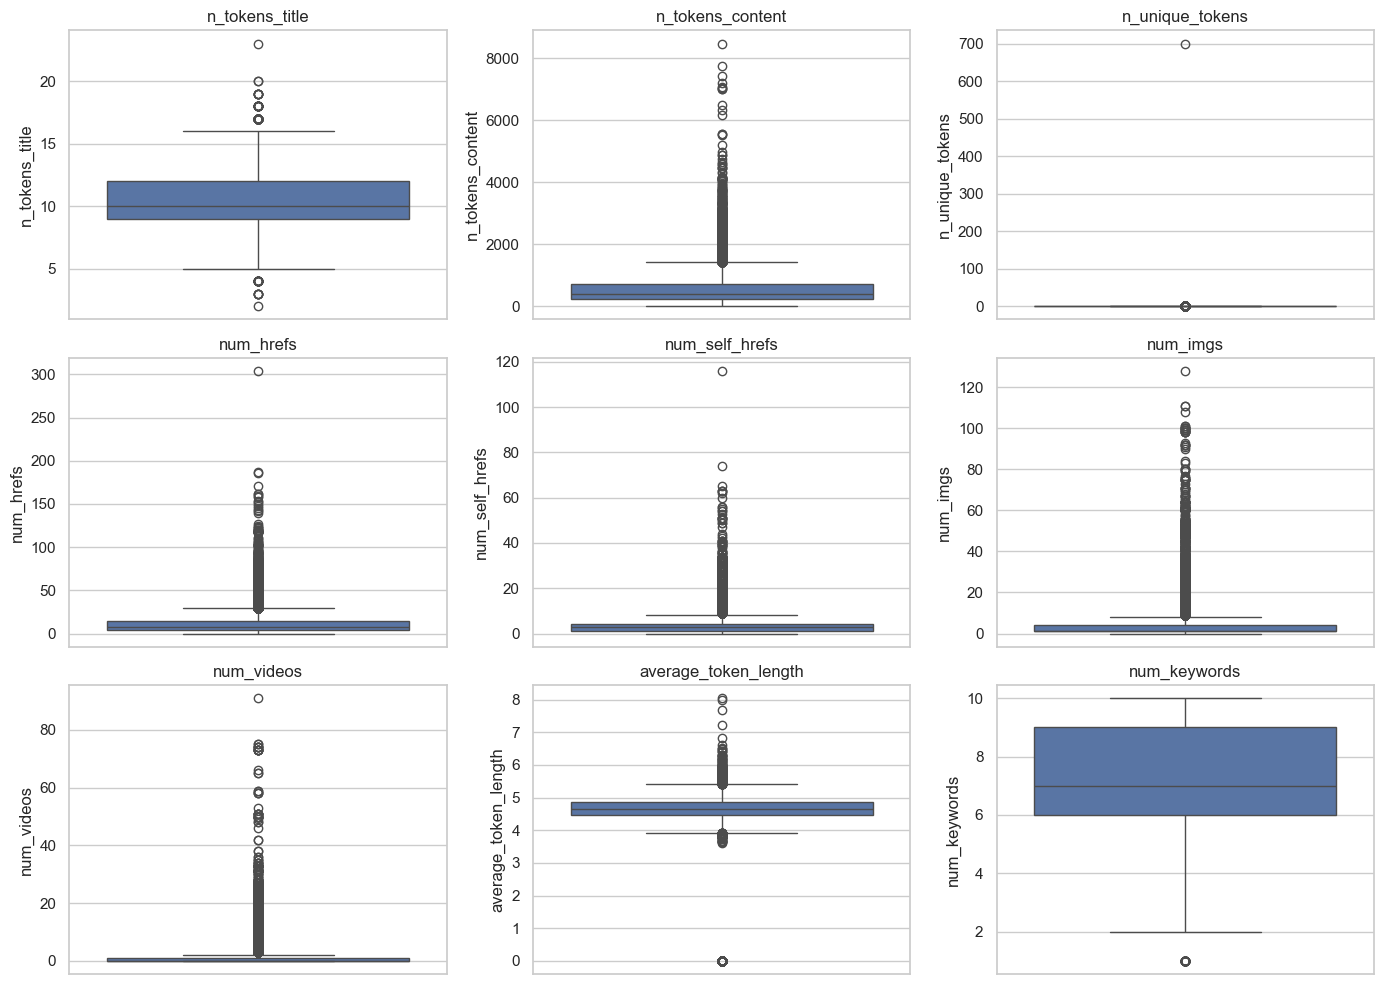

In [12]:
# Box plots for content features
plt.figure(figsize=(14, 10))
for i, feature in enumerate(content_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[feature])
    plt.title(f'{feature}')
    plt.tight_layout()
plt.show()

**Interpretation of the Boxplots:**

The boxplots display the distribution of many numerical features related to article content. A key observation is the presence of numerous outliers in most variables. It indicates that certain articles have exceptionally high values compared to the majority.  

- **n_tokens_title and n_tokens_content:** The title word count is relatively consistent, but the content word count has extreme outliers. It suggests that some articles are much longer.  
- **num_hrefs, num_self_hrefs, num_imgs, num_videos:** These features show heavy-tailed distributions with extreme values. It indicates that some of them have outliers.  
- **num_keywords:** This feature shows a more balanced distribution with a typical range between 6 and 9 keywords.  

Overall, the dataset has highly skewed distributions for many features and many outliers. This suggests that article characteristics vary widely, and special attention may be needed during data preprocessing like normalization when building predictive models.


4. Channel Distribution Analysis

Channel distribution:
channel
world            8427
tech             7346
entertainment    7057
bus              6258
other            6134
socmed           2323
lifestyle        2099
Name: count, dtype: int64


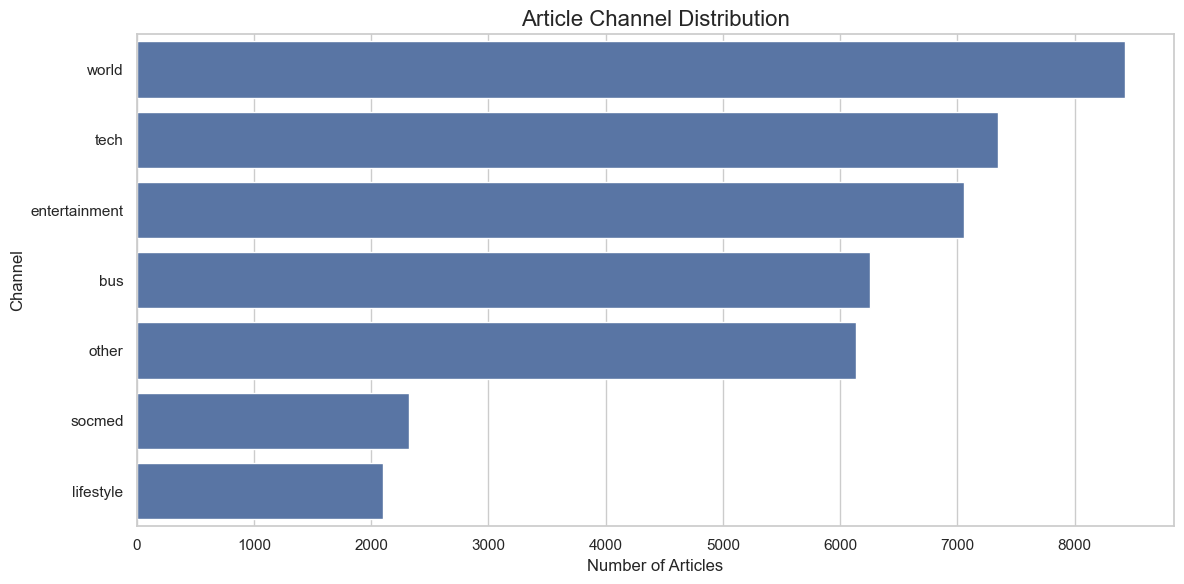

In [13]:
# 4. Channel Distribution Analysis
print("\n" + "="*50)
print("4. Channel Distribution Analysis")

# Check if channel column exists
if 'channel' in df.columns:
    channel_counts = df['channel'].value_counts()
    print("\nChannel distribution:")
    print(channel_counts)
    
    # Plot channel distribution
    plt.figure(figsize=(12, 6))
    sns.countplot(y='channel', data=df, order=channel_counts.index)
    plt.title('Article Channel Distribution', fontsize=16)
    plt.xlabel('Number of Articles')
    plt.ylabel('Channel')
    plt.tight_layout()
    plt.show()
else:
    # Use data_channel_is_* columns
    channel_cols = [col for col in df.columns if col.startswith('data_channel_is_')]
    if channel_cols:
        channel_counts = {}
        for col in channel_cols:
            channel_name = col.replace('data_channel_is_', '')
            channel_counts[channel_name] = df[col].sum()
        
        channel_df = pd.DataFrame.from_dict(channel_counts, orient='index', columns=['count'])
        channel_df = channel_df.sort_values('count', ascending=False)
        
        print("\nChannel distribution:")
        print(channel_df)
        
        # Plot channel distribution
        plt.figure(figsize=(12, 6))
        sns.barplot(x=channel_df.index, y='count', data=channel_df)
        plt.title('Article Channel Distribution', fontsize=16)
        plt.xlabel('Channel')
        plt.ylabel('Number of Articles')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

**Intepretation of Article Channel Distribution:**

The bar chart shows the distribution of articles across different content channels. It reveals that the "World" category has the highest number of articles (8,427), "Tech" (7,346), "Entertainment" (7,057), "Business" (6,258), "Social Media" (2,323) and "Lifestyle" (2,099). This suggests that news coverage is heavily skewed towards global affairs, technology, and entertainment, while social media and lifestyle topics are less frequently published. The distribution highlights content priorities and could indicate audience preferences.

In [14]:

# 5. Followers Analysis
print("\n" + "="*50)
print("5. Followers Analysis")

# Check if followers column exists
if 'followers' in df.columns:
    print("\nFound 'followers' column")
    
    # Check the data type and sample values
    print(f"Data type of 'followers' column: {df['followers'].dtype}")
    print("Sample values from 'followers' column:")
    print(df['followers'].head())
    
    # If the column contains concatenated strings, clean it first
    # This step is crucial based on the error message
    if df['followers'].dtype == 'object':
        # Check if we need to extract individual categories
        if len(df['followers'].unique()) > 10:  # If there are too many unique values, it might be concatenated
            print("\nDetected possible concatenated values in 'followers' column. Cleaning data...")
            
            # Try to extract the categories properly
            # Create a pattern to match the expected categories
            import re
            
            # Extract valid category values (Low, Medium, High, Viral)
            valid_categories = ['Low', 'Medium', 'High', 'Viral']
            
            # Function to extract the first valid category from a string
            def extract_category(value):
                if isinstance(value, str):
                    for category in valid_categories:
                        if category in value:
                            return category
                return value
            
            # Apply the function to clean the column
            df['followers_clean'] = df['followers'].apply(extract_category)
            print("\nCreated 'followers_clean' column with extracted categories")
            print(df['followers_clean'].value_counts())
            
            # Use the cleaned column for analysis
            followers_col = 'followers_clean'
        else:
            # If values look reasonable, use as-is
            followers_col = 'followers'
    else:
        # If not string type, use as-is
        followers_col = 'followers'
    
    # Output basic statistics
    print("\nBasic statistics for the followers column:")
    print(df[followers_col].describe())
    
    # Get unique values
    unique_values = sorted(df[followers_col].unique())
    print(f"\nUnique values in followers column: {unique_values}")


5. Followers Analysis

Found 'followers' column
Data type of 'followers' column: object
Sample values from 'followers' column:
0         High
1       Medium
2       Medium
3    Reprinted
4          Low
Name: followers, dtype: object

Basic statistics for the followers column:
count     39644
unique        7
top         Low
freq      15234
Name: followers, dtype: object

Unique values in followers column: ['Extremely Low', 'High', 'Low', 'Medium', 'Official', 'Reprinted', 'Unknown']



Followers category distribution:
followers
Extremely Low     2163
High              1003
Low              15234
Medium            8200
Official           654
Reprinted         3747
Unknown           8643
Name: count, dtype: int64


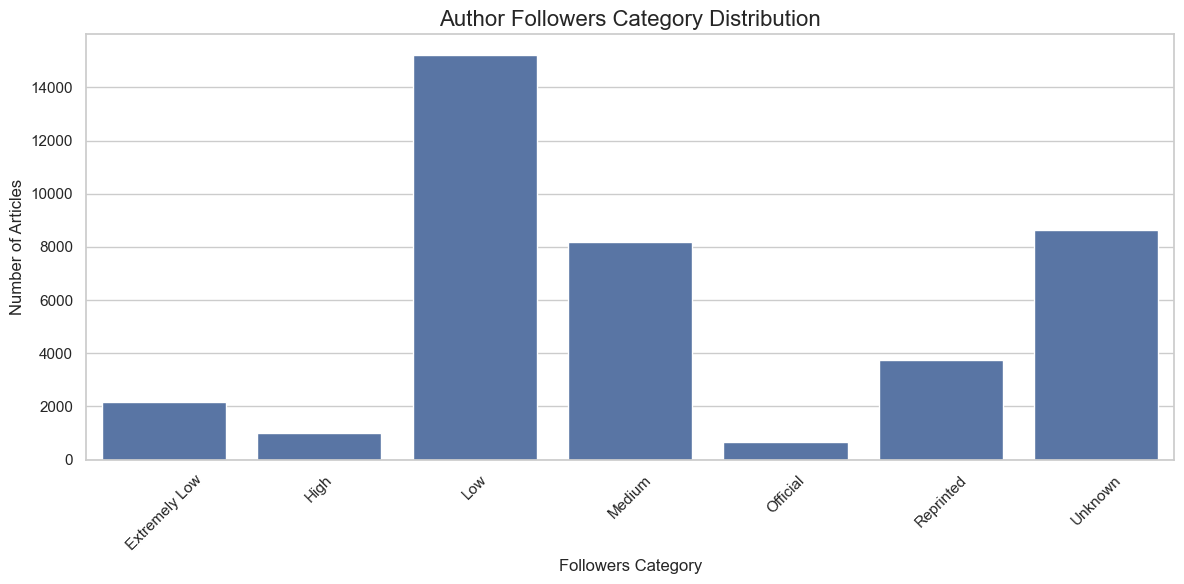

In [15]:
# Count the distribution of each category
followers_distribution = df[followers_col].value_counts().sort_index()
print("\nFollowers category distribution:")
print(followers_distribution)
    
# Plot the followers distribution
plt.figure(figsize=(12, 6))
sns.countplot(x=followers_col, data=df, order=sorted(df[followers_col].unique()))
plt.title('Author Followers Category Distribution', fontsize=16)
plt.xlabel('Followers Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Intepretation of Author Followers Category Distribution:**

The bar chart illustrates the distribution of articles based on the author's follower category. Interestingly, we found that very few articles are written by authors with High follower counts (1,003). It means highly followed authors contribute less frequently. Additionally, a portion of articles are categorized as Reprinted (3,747), indicating content republished from other sources. This distribution suggests that articles from low-followed or unknown authors dominate the platform. We consider that the reason for this possibility is that low-followed authors need to actively publish their works on the platform to get more traffic.

In [16]:
# 6. Time Feature Analysis
print("\n" + "="*50)
print("6. Time Feature Analysis")

# Check if weekday columns exist
weekday_cols = [col for col in df.columns if col.startswith('weekday_is_')]
if weekday_cols:
    # Count articles for each day
    weekday_counts = {}
    for col in weekday_cols:
        day = col.replace('weekday_is_', '')
        weekday_counts[day] = df[col].sum()
    
    # Specify order
    ordered_days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
    weekday_df = pd.DataFrame([(day, weekday_counts.get(day, 0)) for day in ordered_days],
                             columns=['day', 'count'])
    
    print("\nArticles per day:")
    print(weekday_df)


6. Time Feature Analysis

Articles per day:
         day  count
0     monday   6661
1    tuesday   7390
2  wednesday   7435
3   thursday   7267
4     friday   5701
5   saturday   2453
6     sunday   2737


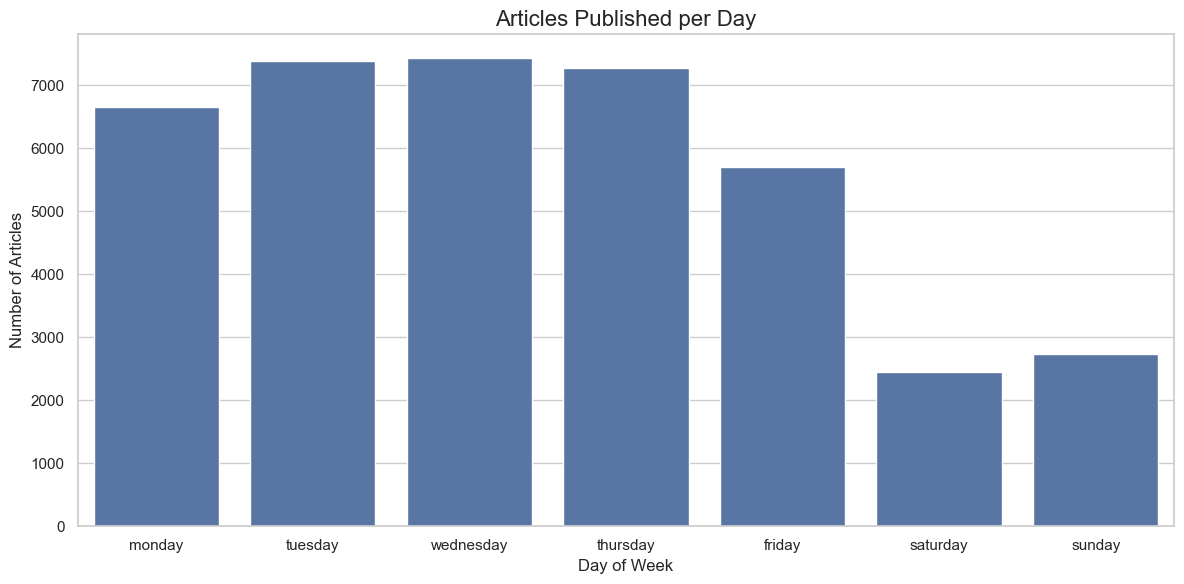

In [17]:
 # Plot articles per day
plt.figure(figsize=(12, 6))
sns.barplot(x='day', y='count', data=weekday_df)
plt.title('Articles Published per Day', fontsize=16)
plt.xlabel('Day of Week')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()


Weekday vs Weekend articles:
Weekday: 34454
Weekend: 5190


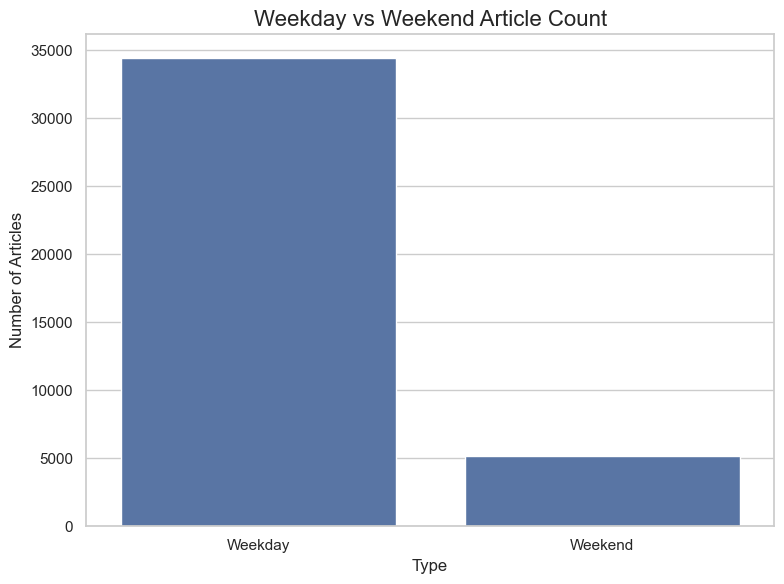

In [18]:
# Analyze weekend vs weekday difference
if 'is_weekend' in df.columns:
    weekend_counts = df['is_weekend'].value_counts()
    labels = ['Weekday', 'Weekend']
        
    print("\nWeekday vs Weekend articles:")
    print(f"Weekday: {weekend_counts.get(0, 0)}")
    print(f"Weekend: {weekend_counts.get(1, 0)}")
        
# Plot weekday vs weekend comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=[0, 1], y=[weekend_counts.get(0, 0), weekend_counts.get(1, 0)])
plt.title('Weekday vs Weekend Article Count', fontsize=16)
plt.xlabel('Type')
plt.ylabel('Number of Articles')
plt.xticks([0, 1], labels)
plt.tight_layout()
plt.show()

**Intepretation of "Articles Published Per Day" and "Weekday vs Weekend Article Count":**

This is an interesting result. Our group initially guessed that the number of articles on weekends would be greater than the number on weekdays. We found that the first chart shows that article publication peaks from Tuesday to Thursday, and a sharp drop on weekends. The second chart further shows this trend by aggregating the data. This suggests that most content is published during the workweek. This may be due to a significant drop in publication frequency on weekends to connect with higher audience engagement and newsroom activity.


7. Sentiment and Subjectivity Analysis

Sentiment feature statistics:


count      mean       std      min       25%  \
global_subjectivity         39644.0  0.443370  0.116685  0.00000  0.396167   
global_sentiment_polarity   39644.0  0.119309  0.096931 -0.39375  0.057757   
global_rate_positive_words  39644.0  0.039625  0.017429  0.00000  0.028384   
global_rate_negative_words  39644.0  0.016612  0.010828  0.00000  0.009615   
rate_positive_words         39644.0  0.682150  0.190206  0.00000  0.600000   
rate_negative_words         39644.0  0.287934  0.156156  0.00000  0.185185   
avg_positive_polarity       39644.0  0.353825  0.104542  0.00000  0.306244   
avg_negative_polarity       39644.0 -0.259524  0.127726 -1.00000 -0.328383   
title_subjectivity          39644.0  0.282353  0.324247  0.00000  0.000000   
title_sentiment_polarity    39644.0  0.071425  0.265450 -1.00000  0.000000   

                                 50%       75%       max  
global_subjectivity         0.453457  0.508333  1.000000  
global_sentiment_polarity   0.119117  0.177832  0.727841  
global_rate_positive_words  0.039023  0.050279  0.155488  
global_rate_negative_words  0.015337  0.021739  0.184932  
rate_positive_words         0.710526  0.800000  1.000000  
rate_negative_words         0.280000  0.384615  1.000000  
avg_positive_polarity       0.358755  0.411428  1.000000  
avg_negative_polarity      -0.253333 -0.186905  0.000000  
title_subjectivity          0.150000  0.500000  1.000000  
title_sentiment_polarity    0.000000  0.150000  1.000000

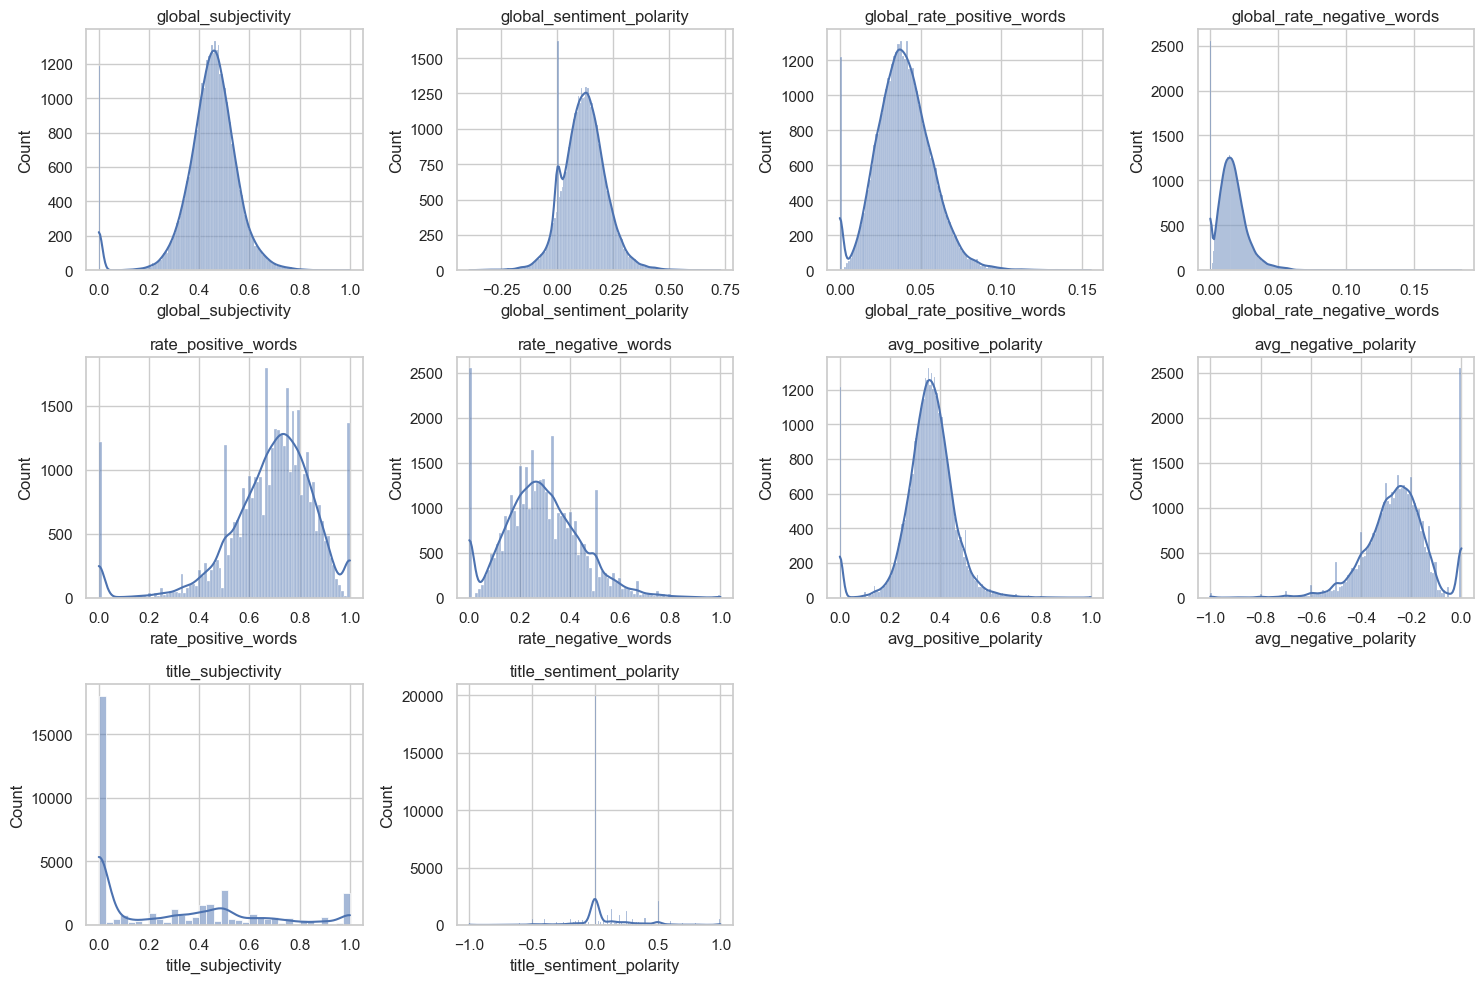

In [19]:
# 7. Sentiment Feature Analysis
print("\n" + "="*50)
print("7. Sentiment and Subjectivity Analysis")

# Select sentiment and subjectivity features
sentiment_features = [
    'global_subjectivity', 'global_sentiment_polarity', 
    'global_rate_positive_words', 'global_rate_negative_words',
    'rate_positive_words', 'rate_negative_words',
    'avg_positive_polarity', 'avg_negative_polarity',
    'title_subjectivity', 'title_sentiment_polarity'
]

sentiment_features = [f for f in sentiment_features if f in df.columns]

if sentiment_features:
    # Descriptive statistics for sentiment features
    sentiment_stats = df[sentiment_features].describe().T
    print("\nSentiment feature statistics:")
    display(sentiment_stats)
    
    # Distribution plots for sentiment features
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(sentiment_features):
        plt.subplot(3, 4, i+1)
        sns.histplot(df[feature], kde=True)
        plt.title(f'{feature}')
        plt.tight_layout()
    plt.show()

**Intepretation of the distribution plots:**

The distribution plots provide insights into the sentiment and subjectivity characteristics of the articles. We found an interesting fact is that the rate of positive words (0.62 on average) is much higher than the rate of negative words (0.29 on average). The title sentiment polarity and subjectivity distributions indicate that most article titles remain neutral, but some exhibit extreme sentiment (both positive and negative). Overall, the data suggests that articles generally keep a moderate subjectivity level with a little trend towards positivity and a small proportion containing strong negative words.

In [20]:
# 8. Correlation Analysis
print("\n" + "="*50)
print("8. Correlation Analysis")

# Convert shares categories to numeric values
df['shares_num'] = df['shares'].map({'Viral': 4, 'High': 3, 'Medium': 2, 'Low': 1})
df[['shares_num', 'shares']]
columns_to_drop = ['shares_original', 'followers_original', 'channel', 'day_type']
df.drop(columns=columns_to_drop, inplace=True)
# Label encode the 'author_level' column for non-null values only.
# Create a boolean mask for non-null rows in 'author_level'
df["author_level"] = df["author_level"].fillna("unknown")

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the entire 'author_level' column
df["author_level"] = le.fit_transform(df["author_level"])



8. Correlation Analysis


The code is converting the categorical values in the "shares" column which represents article popularity categories like Low, Medium, High, and Viral into numerical values using the ".map()" function. The mapping assigns 'Low' = 1, 'Medium' = 2, 'High' = 3, and 'Viral' = 4 and creates a new column called "shares_num". This transformation is necessary because correlation analysis and most machine learning models require numerical data instead of categorical strings. 


Absolute correlation ranking with shares:
shares_num                       1.000000
LDA_02                           0.159896
kw_avg_avg                       0.157787
data_channel_is_world            0.154195
is_weekend                       0.140852
data_channel_is_entertainment    0.114156
data_channel_is_socmed           0.112044
weekday_is_saturday              0.108938
data_channel_is_tech             0.102832
LDA_04                           0.094877
kw_min_avg                       0.090708
num_hrefs                        0.090229
weekday_is_sunday                0.083874
LDA_01                           0.078873
global_sentiment_polarity        0.073547
num_keywords                     0.073085
rate_negative_words              0.071249
kw_max_avg                       0.070496
global_subjectivity              0.068059
LDA_00                           0.067253
num_imgs                         0.067193
self_reference_avg_sharess       0.065304
global_rate_positive_words       

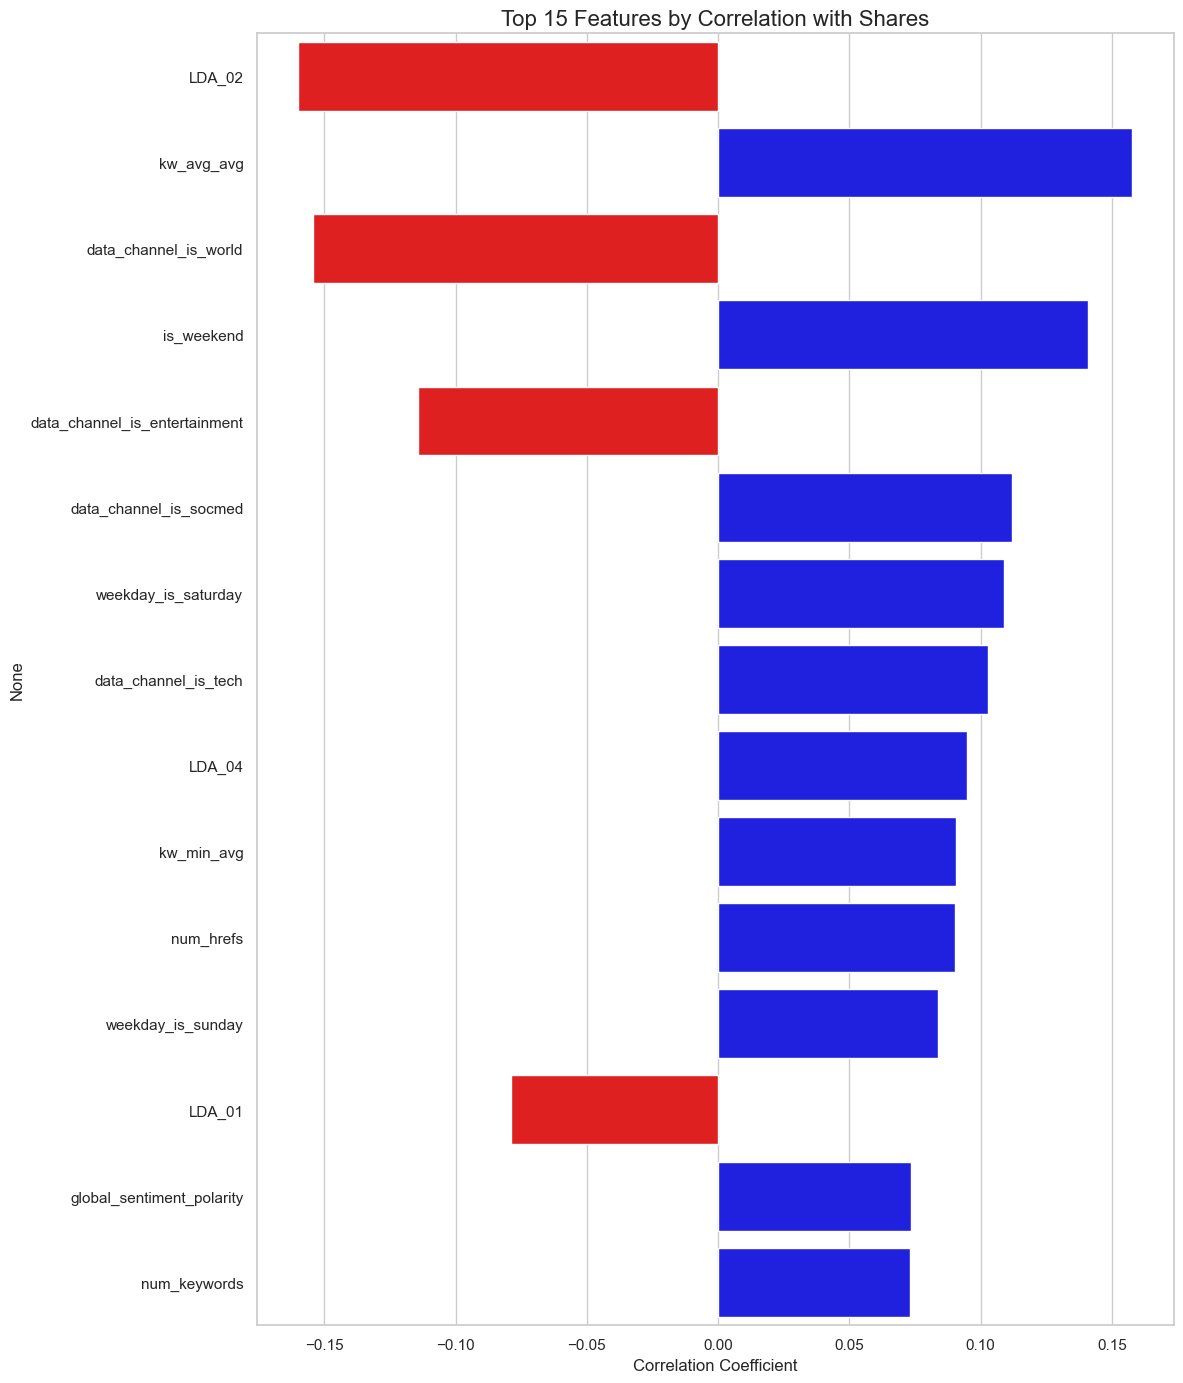

In [21]:
# First, ensure shares column is numeric
numeric_df = df.select_dtypes(include=['int32', 'int64', 'float64'])

# Calculate correlations
corr_matrix = numeric_df.corr()

# Save shares column correlations with other features
if 'shares_num' in corr_matrix.columns:
    shares_corr = corr_matrix['shares_num'].sort_values(ascending=False)
    
    # Calculate absolute correlations and rank them
    shares_corr_abs = shares_corr.abs().sort_values(ascending=False)
    
    print("\nAbsolute correlation ranking with shares:")
    print(shares_corr_abs)
    
    print("\nTop positive correlations with shares:")
    print(shares_corr.head(15))
    
    print("\nTop negative correlations with shares:")
    # Use sort_values with ascending=True to get the most negative correlations first
    print(shares_corr.sort_values(ascending=True).head(15))

    # Plot correlation bar chart
    plt.figure(figsize=(12, 14))
    top_features = shares_corr_abs[1:16].index  # Exclude shares itself
    
    colors = ['red' if x < 0 else 'blue' for x in shares_corr[top_features]]
    
    sns.barplot(x=shares_corr[top_features], y=top_features, palette=colors)
    plt.title('Top 15 Features by Correlation with Shares', fontsize=16)
    plt.xlabel('Correlation Coefficient')
    plt.tight_layout()
    plt.show()

**Intepretation of Top 15 features by correlation with shares:**

The bar chart presents the top 15 features that correlate with the number of shares in an article. Positive correlations (blue bars) indicate features that increase engagement. Most of these features show a stronger positive relationship with shares. This suggests that articles with well-performing keywords, those published on weekends, and those with more hyperlinks tend to gain more engagement. Conversely, negative correlations (red bars) indicate features that are associated with fewer shares. This implies that articles in certain LDA topics and the "World" or "Entertainment" categories might receive lower engagement.

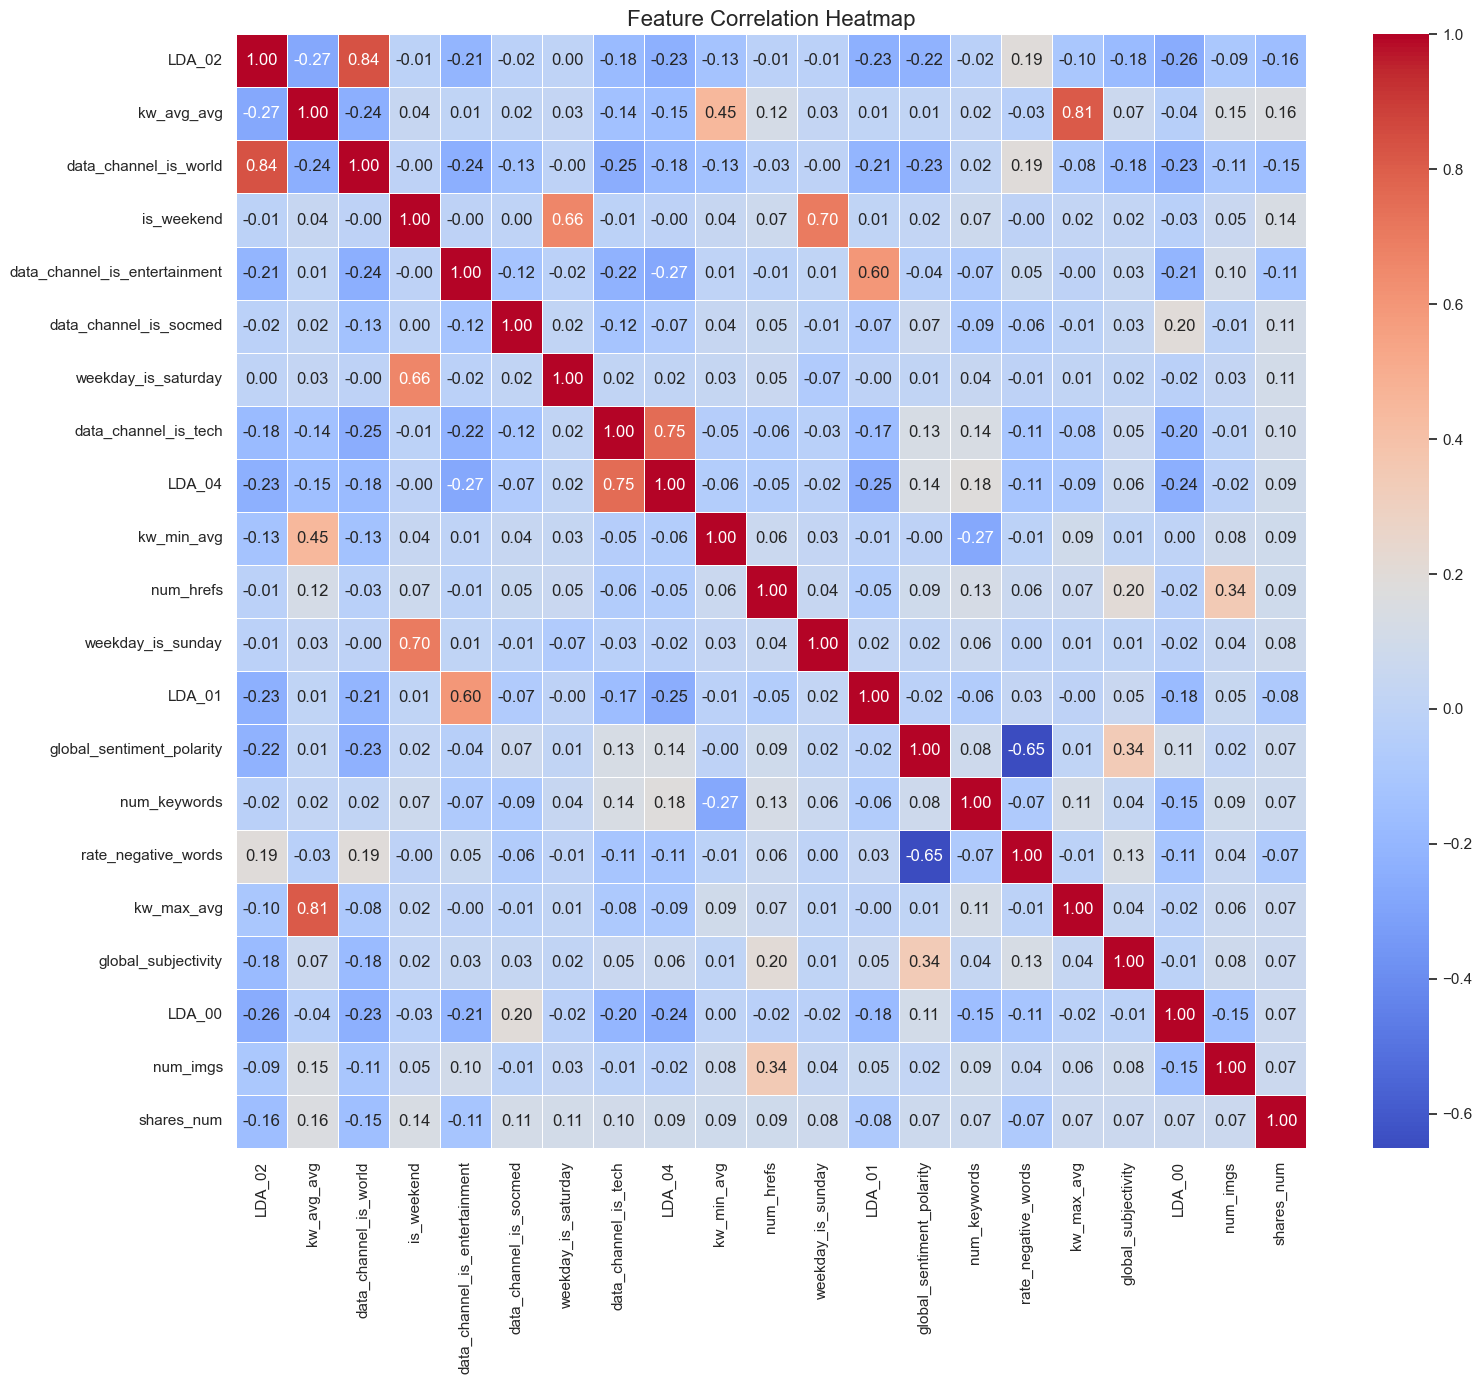

In [22]:
# Heatmap showing feature correlations
plt.figure(figsize=(16, 14))
# Select top 20 features most correlated with shares
if 'shares_num' in corr_matrix.columns:
    top_corr_features = list(shares_corr_abs[1:21].index)  # Exclude shares_num itself
    top_corr_features.append('shares_num')  # Add shares back
    
    # Create heatmap
    sns.heatmap(corr_matrix.loc[top_corr_features, top_corr_features], 
                annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Feature Correlation Heatmap', fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    # If no shares column, use all features
    plt.figure(figsize=(16, 14))
    sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
    plt.title('Feature Correlation Heatmap', fontsize=16)
    plt.tight_layout()
    plt.show()


**Intepretation of feature correlation heatmap:**

The heatmap's result is similar with the previous bar chart. The heatmap visualizes the correlation between different features, including the "shares_num" variable, which shows article popularity. Darker red indicates a strong positive correlation, and darker blue represents a strong negative correlation. The strongest positive correlation is observed between "kw_avg_avg" and "shares_num", suggesting that articles with well-performing keywords tend to receive more shares. Other interesting positive correlations include "num_hrefs" and "is_weekend" show that linked articles and those published on weekends may gain more engagement. Conversely, features such as "LDA_02" and "data_channel_is_world" show a negative correlation.


9. Channel and Shares Relationship

lifestyle channel vs shares category cross-tabulation:
shares                      High    Low
data_channel_is_lifestyle              
0                          19871  17674
1                           1283    816


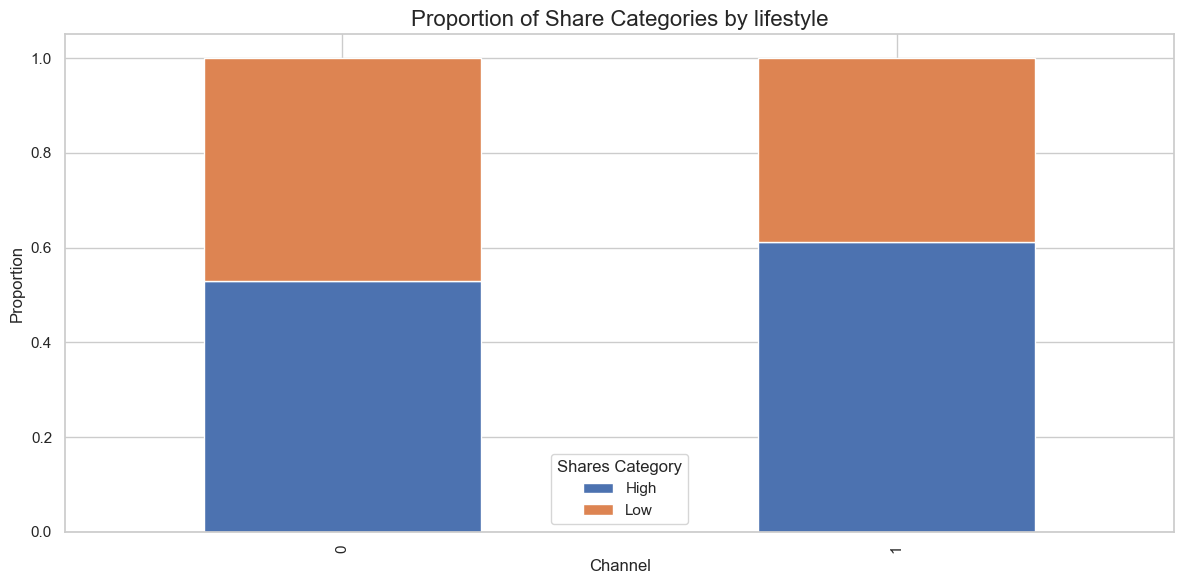


entertainment channel vs shares category cross-tabulation:
shares                          High    Low
data_channel_is_entertainment              
0                              18252  14335
1                               2902   4155


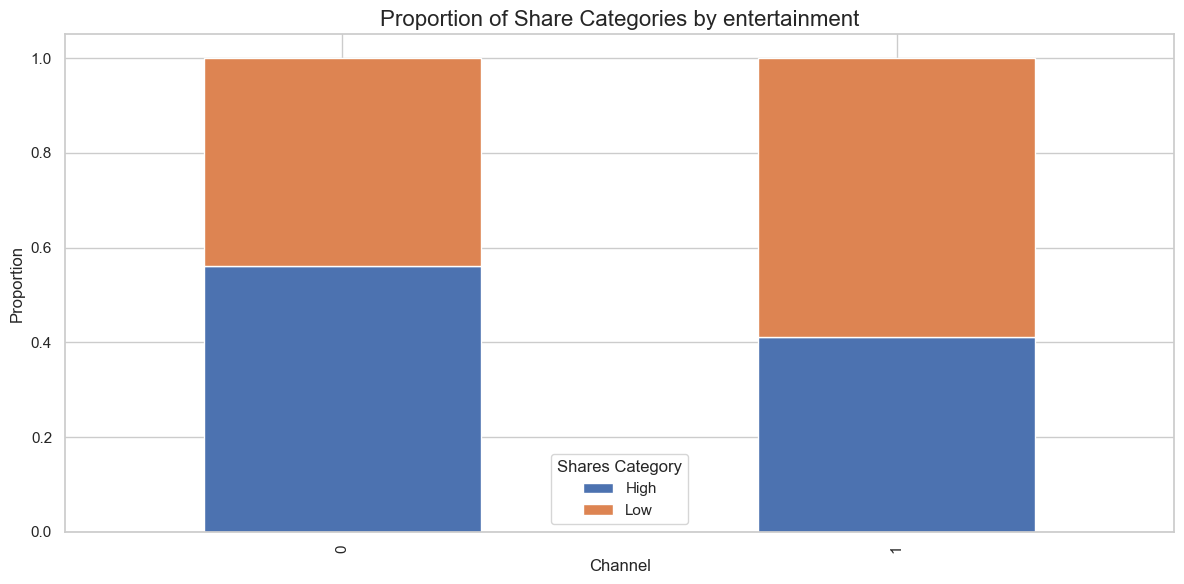


bus channel vs shares category cross-tabulation:
shares                High    Low
data_channel_is_bus              
0                    17842  15544
1                     3312   2946


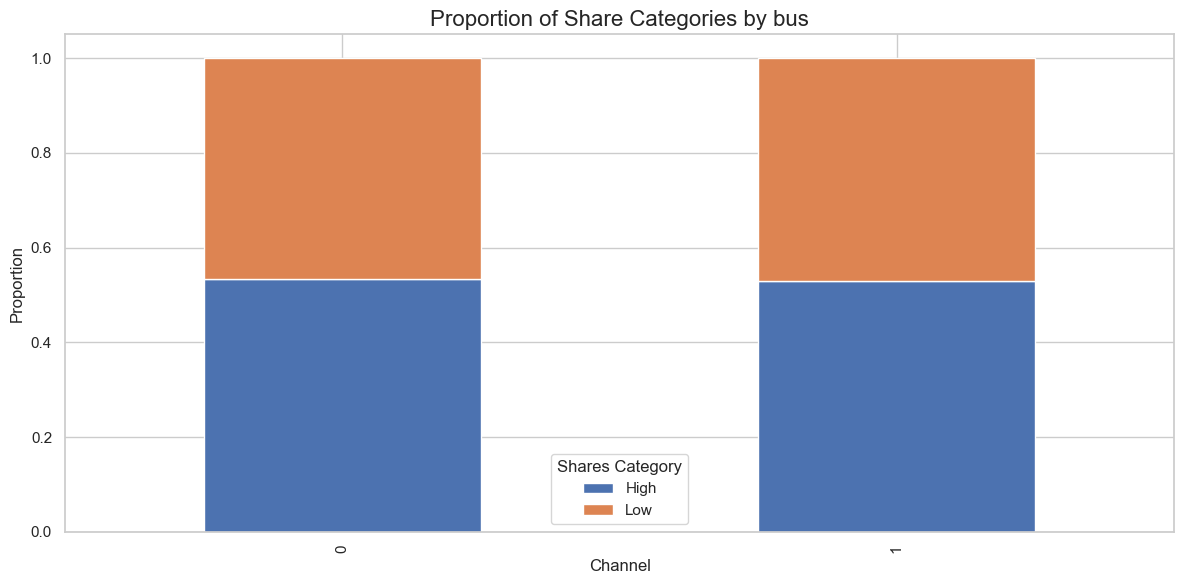


socmed channel vs shares category cross-tabulation:
shares                   High    Low
data_channel_is_socmed              
0                       19394  17927
1                        1760    563


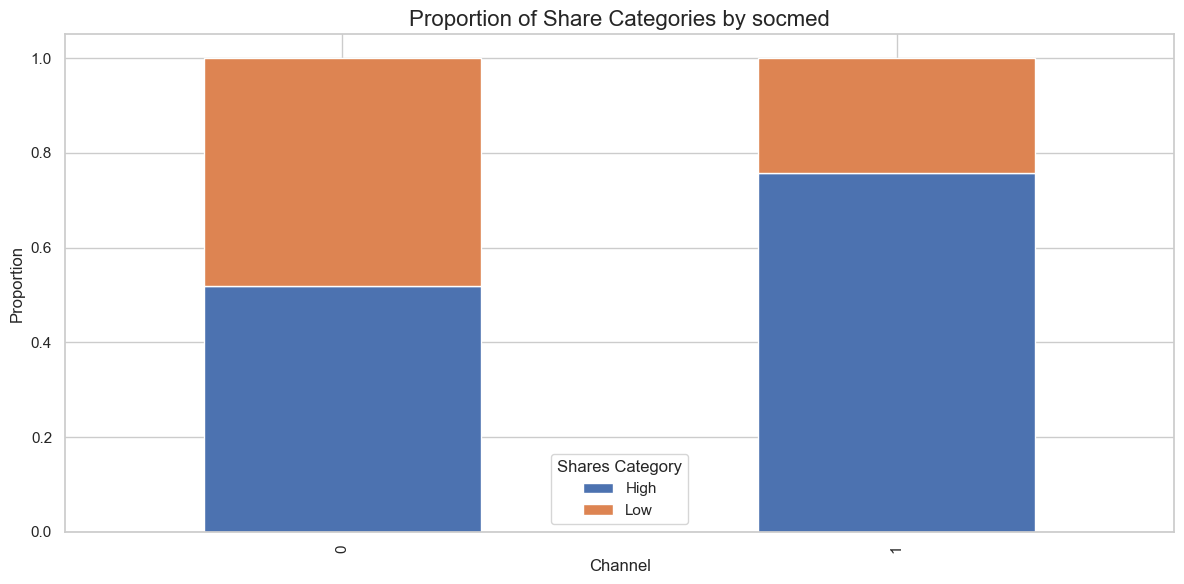


tech channel vs shares category cross-tabulation:
shares                 High    Low
data_channel_is_tech              
0                     16444  15854
1                      4710   2636


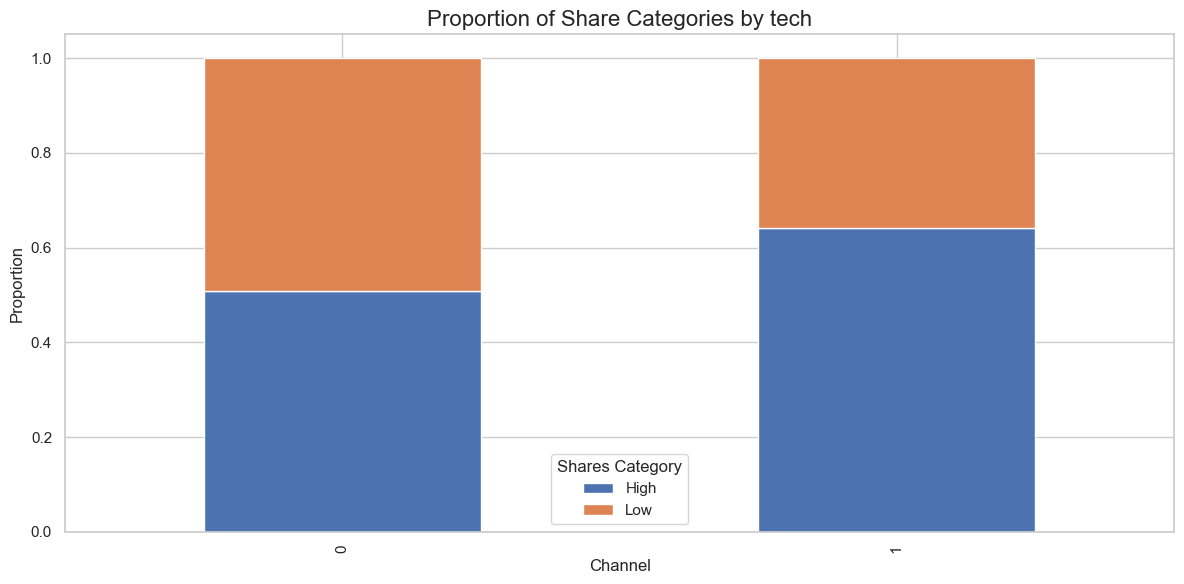


world channel vs shares category cross-tabulation:
shares                  High    Low
data_channel_is_world              
0                      17905  13312
1                       3249   5178


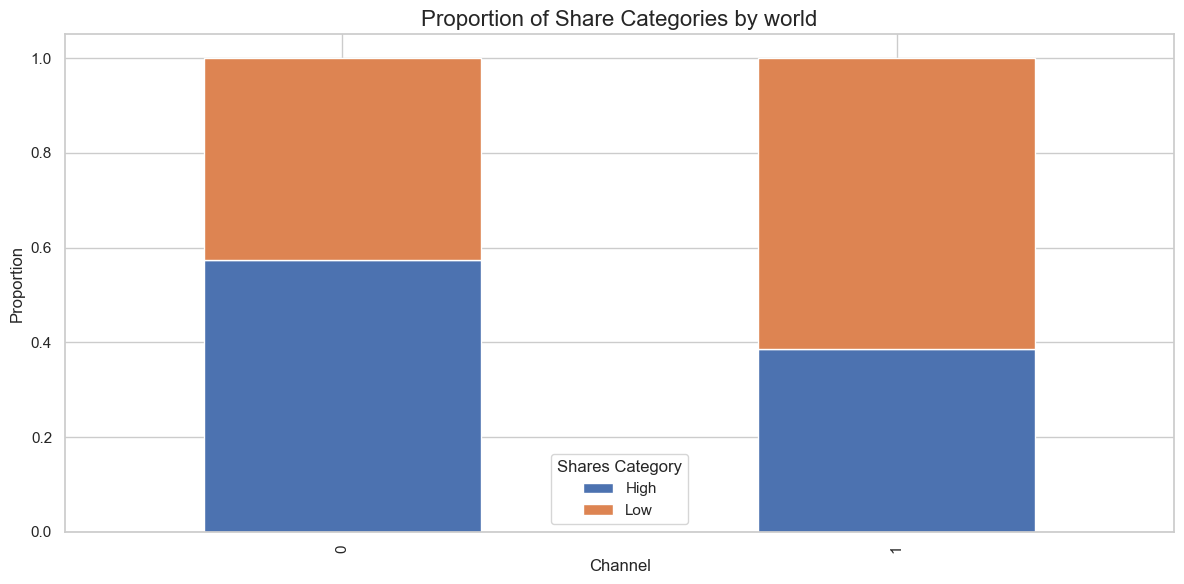

In [23]:
# 9. Explore relationship between channel and shares
print("\n" + "="*50)
print("9. Channel and Shares Relationship")

# Check for channel or data_channel_is_* columns
if 'channel' in df.columns and 'shares' in df.columns:
    plt.figure(figsize=(12, 6))
    
    if df['shares'].dtype == 'object':
        # If shares is a categorical variable
        cross_tab = pd.crosstab(df['channel'], df['shares'])
        print("\nChannel vs shares category cross-tabulation:")
        print(cross_tab)
        
        # Plot stacked bar chart
        cross_tab_pct = cross_tab.div(cross_tab.sum(axis=1), axis=0)
        cross_tab_pct.plot(kind='bar', stacked=True, figsize=(12, 6))
        plt.title('Proportion of Share Categories by Channel', fontsize=16)
        plt.xlabel('Channel')
        plt.ylabel('Proportion')
        plt.legend(title='Shares Category')
        plt.tight_layout()
        plt.show()
    else:
        # If shares is a numeric variable
        channel_shares = df.groupby('channel')['shares'].agg(['mean', 'median', 'std'])
        print("\nShares statistics by channel:")
        print(channel_shares)
        
        # Plot boxplot
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='channel', y='shares', data=df)
        plt.title('Shares Distribution by Channel', fontsize=16)
        plt.xlabel('Channel')
        plt.ylabel('Number of Shares')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
elif any(col.startswith('data_channel_is_') for col in df.columns) and 'shares' in df.columns:
    # Use data_channel_is_* columns
    channel_cols = [col for col in df.columns if col.startswith('data_channel_is_')]
    
    if df['shares'].dtype == 'object':
        # If shares is a categorical variable
        for col in channel_cols:
            channel_name = col.replace('data_channel_is_', '')
            cross_tab = pd.crosstab(df[col], df['shares'])
            print(f"\n{channel_name} channel vs shares category cross-tabulation:")
            print(cross_tab)

            cross_tab_pct = cross_tab.div(cross_tab.sum(axis=1), axis=0)
            cross_tab_pct.plot(kind='bar', stacked=True, figsize=(12, 6))
            title = f"Proportion of Share Categories by {channel_name}"
            plt.title(title, fontsize=16)
            plt.xlabel('Channel')
            plt.ylabel('Proportion')
            plt.legend(title='Shares Category')
            plt.tight_layout()
            plt.show()
            
    else:
        # If shares is a numeric variable
        channel_shares = {}
        for col in channel_cols:
            channel_name = col.replace('data_channel_is_', '')
            channel_data = df[df[col] == 1]['shares']
            channel_shares[channel_name] = {
                'mean': channel_data.mean(),
                'median': channel_data.median(),
                'std': channel_data.std()
            }
        
        channel_shares_df = pd.DataFrame(channel_shares).T
        print("\nShares statistics by channel:")
        print(channel_shares_df)
        
        # Plot mean shares by channel
        plt.figure(figsize=(12, 6))
        sns.barplot(x=channel_shares_df.index, y='mean', data=channel_shares_df)
        plt.title('Mean Shares by Channel', fontsize=16)
        plt.xlabel('Channel')
        plt.ylabel('Mean Shares')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

**Intepretation of article channels and share categories:**

 Across all channels, the "Low" and "Medium" share categories dominate and "Viral" shares remain the least common. The Entertainment, Tech, and World channels tend to have higher proportions of "High" and "Viral" shares compared to other categories. Also, the Lifestyle and Business (Bus) channels have lower engagement, with a larger proportion of articles in the "Low" share category. Additionally, Social Media (Socmed) articles show an interesting pattern where the "Medium" share category is relatively high. Overall, the data suggests that certain content types such as Tech and Entertainment have a higher potential for engagement, and others like Lifestyle and Business are more likely to receive lower shares.

In [24]:
# 10. Relationship between followers level and shares
df['follower_num'] = df['followers'].map({
    'Extremely Low': 1,
    'Low': 2,
    'Medium': 3,
    'High': 4,
    'Unknown': 5,
    'Reprinted': 6
})
df[['follower_num', 'followers']]

follower_num  followers
0               4.0       High
1               3.0     Medium
2               3.0     Medium
3               6.0  Reprinted
4               2.0        Low
...             ...        ...
39639           2.0        Low
39640           5.0    Unknown
39641           2.0        Low
39642           5.0    Unknown
39643           2.0        Low

[39644 rows x 2 columns]


10. Followers Level and Shares Relationship

Followers level vs shares category cross-tabulation:
shares         High   Low
followers                
Extremely Low  1159  1004
High            528   475
Low            8245  6989
Medium         4345  3855
Official        337   317
Reprinted      1978  1769
Unknown        4562  4081


<Figure size 1400x800 with 0 Axes>

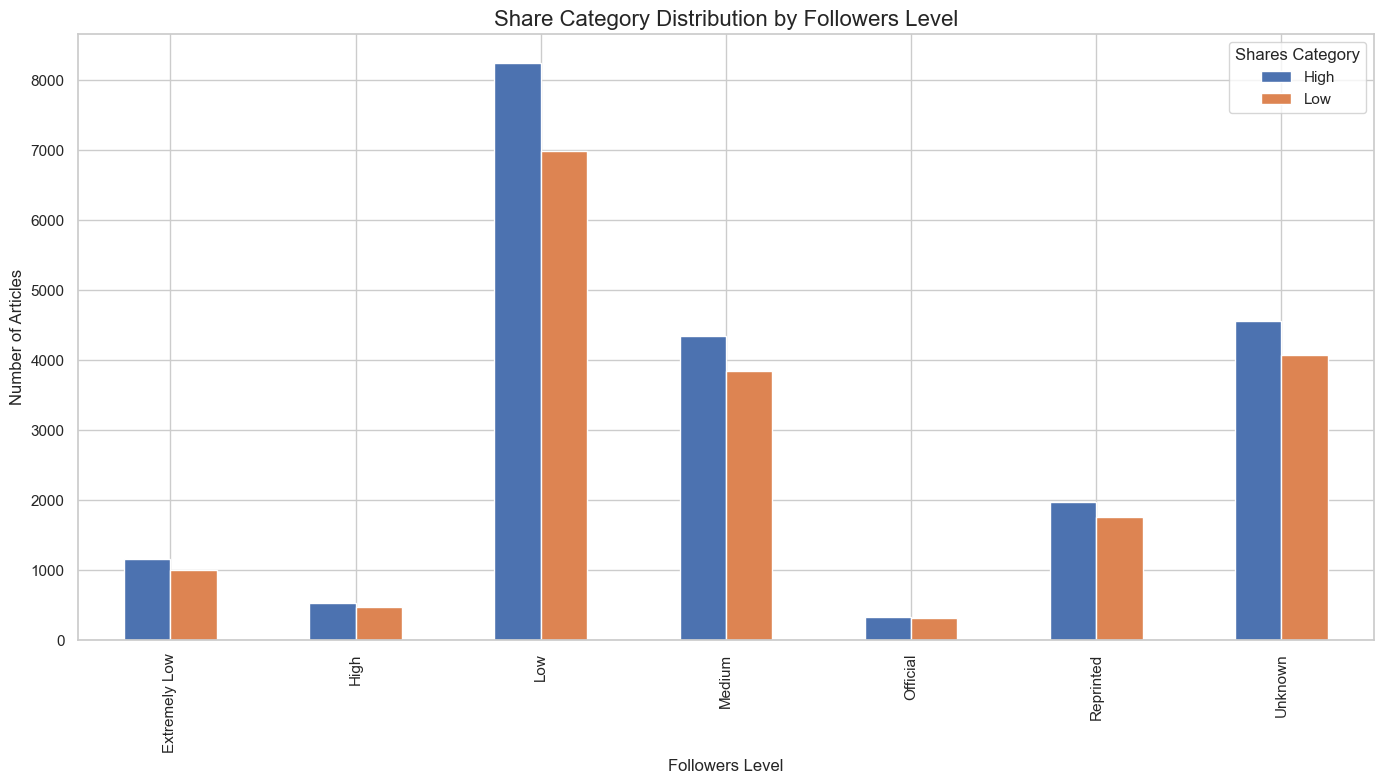


EDA completed!


In [25]:
print("\n" + "="*50)
print("10. Followers Level and Shares Relationship")

if 'followers' in df.columns and 'shares' in df.columns:
    if df['shares'].dtype == 'object':
        # If shares is a categorical variable
        # Create cross-tabulation
        cross_tab = pd.crosstab(df['followers'], df['shares'])
        print("\nFollowers level vs shares category cross-tabulation:")
        print(cross_tab)
        
        # Create comparison chart
        plt.figure(figsize=(14, 8))
        cross_tab.plot(kind='bar', stacked=False, figsize=(14, 8))
        plt.title('Share Category Distribution by Followers Level', fontsize=16)
        plt.xlabel('Followers Level')
        plt.ylabel('Number of Articles')
        plt.legend(title='Shares Category')
        plt.tight_layout()
        plt.show()
    else:
        # If shares is a numeric variable
        follower_shares = {}
        for follower_level in df['followers'].unique():
            follower_data = df[df['followers'] == follower_level]['shares']
            follower_shares[follower_level] = {
                'mean': follower_data.mean(),
                'median': follower_data.median(),
                'std': follower_data.std()
            }
        
        follower_shares_df = pd.DataFrame(follower_shares).T
        print("\nShares statistics by followers level:")
        print(follower_shares_df)
        
        # Plot mean shares by followers level
        plt.figure(figsize=(12, 6))
        sns.barplot(x=follower_shares_df.index, y='mean', data=follower_shares_df)
        plt.title('Mean Shares by Followers Level', fontsize=16)
        plt.xlabel('Followers Level')
        plt.ylabel('Mean Shares')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

print("\n" + "="*50)
print("EDA completed!")

**Intepretation of share category distribution by followers level:**

The analysis of followers' levels and share categories shows that articles written by authors with low or unknown follower counts tend to receive the highest proportion of low engagement. Authors with higher follower counts (Medium or High) have a more balanced distribution of shares. Interestingly, reprinted articles also show a higher probability of achieving Medium or High shares, suggesting that republished content may still attract considerable engagement. 

**Oveview of EDA:**

After doing EDA, we examined the dataset’s structure, distributions, correlations, and relationships between features and article shares. We analyzed content-related features such as keywords, hyperlinks, images, and videos, as well as categorical variables like article channels and publication weekdays. The correlation analysis revealed that keyword-related metrics, the presence of hyperlinks, and the type of data channel such as world or social media have great influences on shares. We also explored sentiment-based features and found that subjectivity and polarity play a role in engagement. One interesting insight is that articles published on weekdays significantly outnumber those on weekends. Also, our target variable is highly imbalanced, with most articles receiving low engagement. These findings guide our feature engineering and model selection to improve predictive performance.

## **Feature Engineering**

During feature engineering, we aim to refine the dataset to improve model performance. We will encode categorical variables, normalize skewed features, and scale numerical data for consistency. Also, we plan to create interaction terms and polynomial features to capture complex relationships. Finally, we will remove highly correlated variables to reduce redundancy. These steps will help enhance the predictive power of our models in analyzing news shareability.

In [26]:
# Feature Engineering will continue with the 'df' DataFrame from EDA
# Create a copy to work with for feature engineering
df_fe = df.copy()

print("="*50)
print("Feature Engineering Process")
print(f"Initial dataset shape: {df_fe.shape}")

Feature Engineering Process
Initial dataset shape: (39644, 63)


In [27]:
# 1. Handling Categorical Variables
print("\n" + "="*50)
print("1. Handling Categorical Variables")

# Check object columns
object_columns = df_fe.select_dtypes(include=['object']).columns
print(f"Object columns to process: {list(object_columns)}")


1. Handling Categorical Variables
Object columns to process: ['shares', 'followers']



Processing target variable 'shares' with label encoding...

Label encoding mapping for 'shares':
High -> 0
Low -> 1


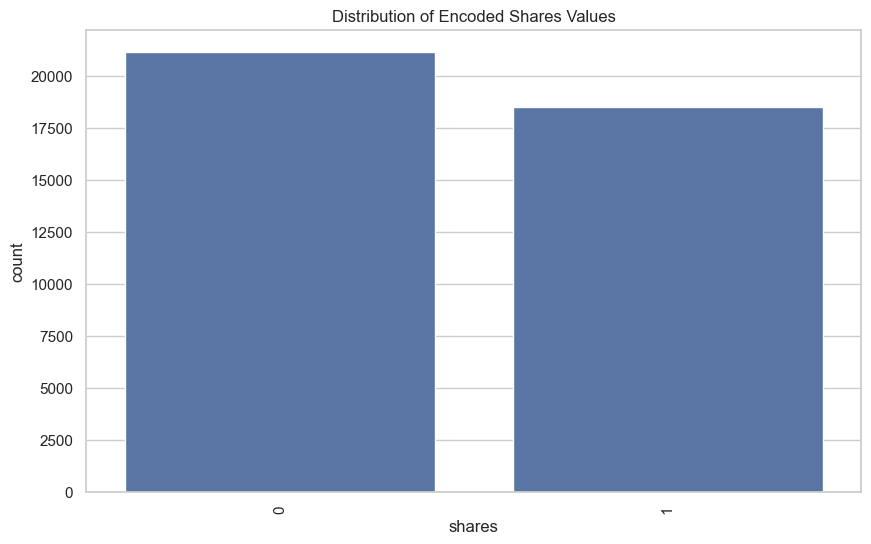

In [28]:
# 1.1 Process the target variable 'shares' with label encoding if it's categorical
if 'shares' in object_columns:
    print("\nProcessing target variable 'shares' with label encoding...")
    
    # Save original values for reference
    df_fe['shares_original_value'] = df_fe['shares']
    
    # Apply label encoding to 'shares'
    label_encoder = LabelEncoder()
    df_fe['shares'] = label_encoder.fit_transform(df_fe['shares'])
    
    # Show the mapping
    mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print("\nLabel encoding mapping for 'shares':")
    for original, encoded in mapping.items():
        print(f"{original} -> {encoded}")
    
    # Visualize the distribution of encoded values
    plt.figure(figsize=(10, 6))
    sns.countplot(x='shares', data=df_fe)
    plt.title('Distribution of Encoded Shares Values')
    plt.xticks(rotation=90)
    plt.show()

In [29]:
# 1.2 Process other categorical columns
categorical_columns = [col for col in object_columns if col != 'shares']
for col in categorical_columns:
    print(f"\nProcessing categorical column: {col}")
    
    # Check the number of unique values
    num_unique = df_fe[col].nunique()
    print(f"Number of unique values: {num_unique}")
    
    if num_unique == 2:
        # Binary columns can be label encoded (0, 1)
        print(f"Label encoding binary column {col}")
        df_fe[col] = LabelEncoder().fit_transform(df_fe[col])
    elif num_unique <= 10:
        # For columns with few categories, use one-hot encoding
        print(f"One-hot encoding {col}")
        one_hot = pd.get_dummies(df_fe[col], prefix=col)
        df_fe = df_fe.drop([col], axis=1)
        df_fe = pd.concat([df_fe, one_hot], axis=1)
    else:
        # For columns with many categories, consider frequency encoding
        print(f"Column {col} has many categories. Using frequency encoding.")
        # Frequency encoding replaces categories with their frequency
        freq_encoding = df_fe[col].value_counts(normalize=True).to_dict()
        df_fe[f"{col}_freq"] = df_fe[col].map(freq_encoding)
        df_fe = df_fe.drop([col], axis=1)


Processing categorical column: followers
Number of unique values: 7
One-hot encoding followers



2. Feature Skewness Transformation
Skewness before transformation:
n_non_stop_words                198.792445
n_unique_tokens                 198.655116
n_non_stop_unique_tokens        198.443294
kw_max_min                       35.328434
kw_avg_min                       31.306108
self_reference_min_shares        26.264364
self_reference_avg_sharess       17.914093
kw_max_avg                       16.411670
self_reference_max_shares        13.870849
num_videos                        7.019533
kw_avg_avg                        5.760177
num_self_hrefs                    5.172751
num_hrefs                         4.013495
num_imgs                          3.946596
min_positive_polarity             3.040468
n_tokens_content                  2.945422
LDA_01                            2.086722
abs_title_sentiment_polarity      1.704193
LDA_00                            1.567463
global_rate_negative_words        1.491917
LDA_02                            1.311695
LDA_03                       

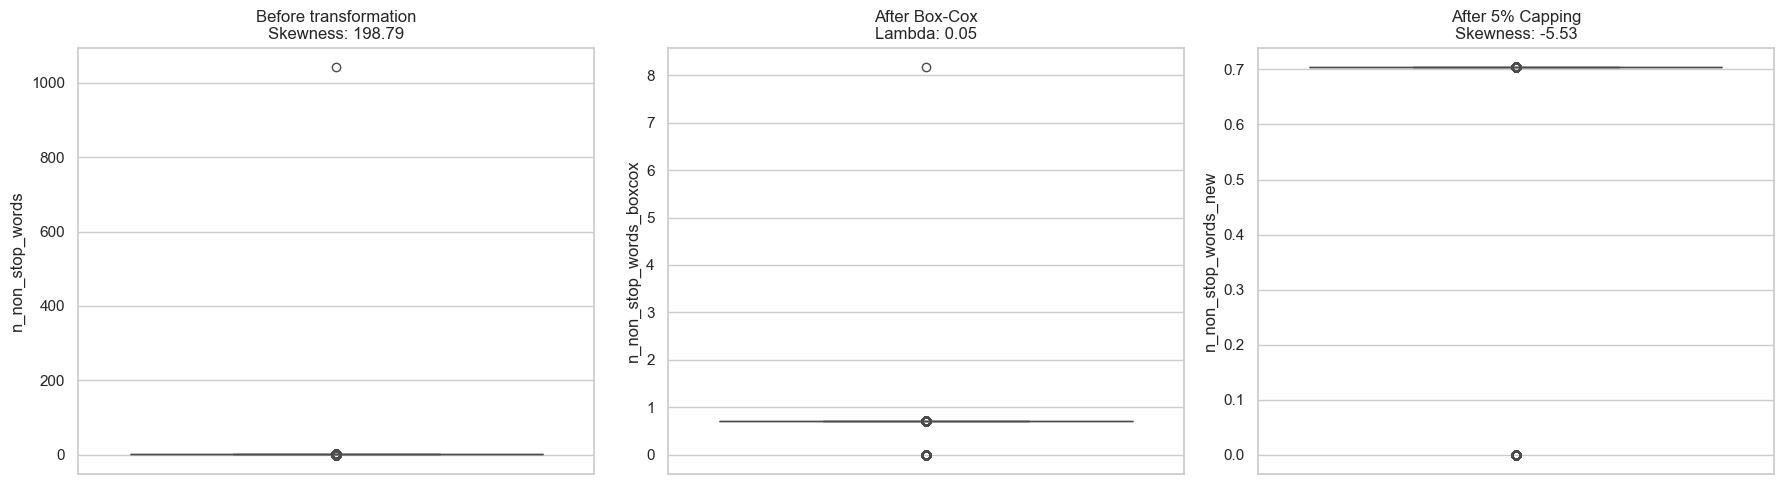


Processing n_unique_tokens (Skewness: 198.66)


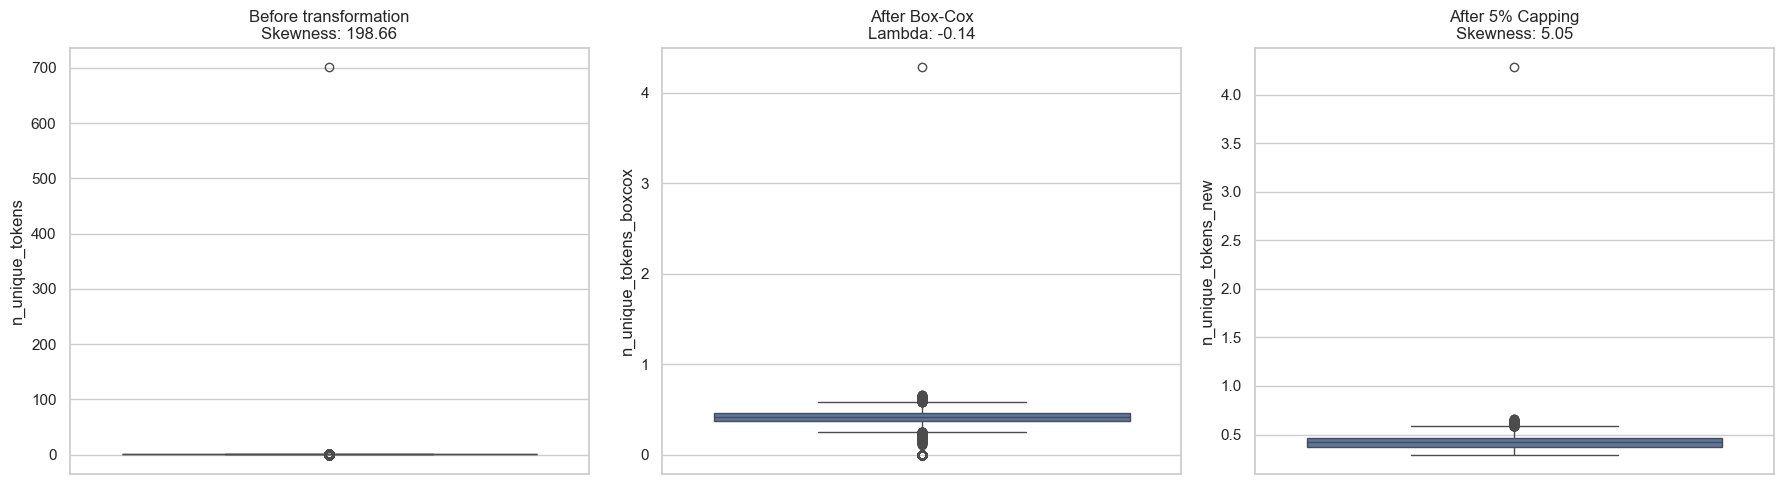


Processing n_non_stop_unique_tokens (Skewness: 198.44)


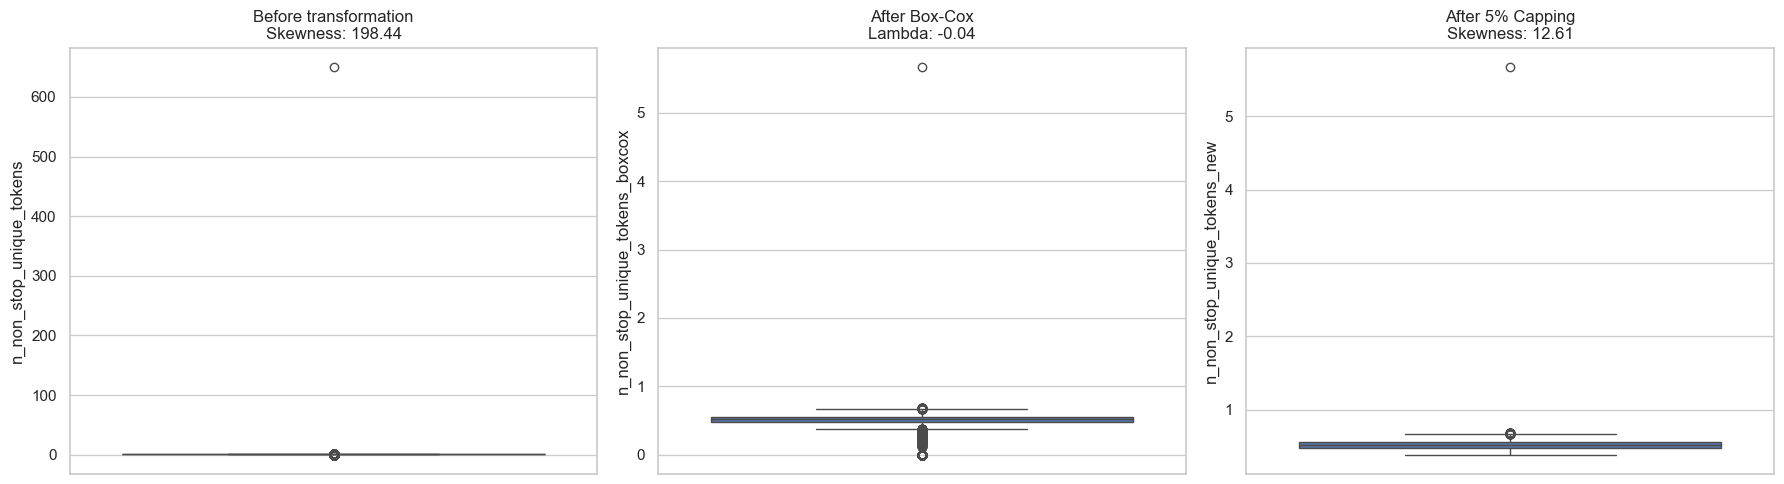


Processing kw_max_min (Skewness: 35.33)


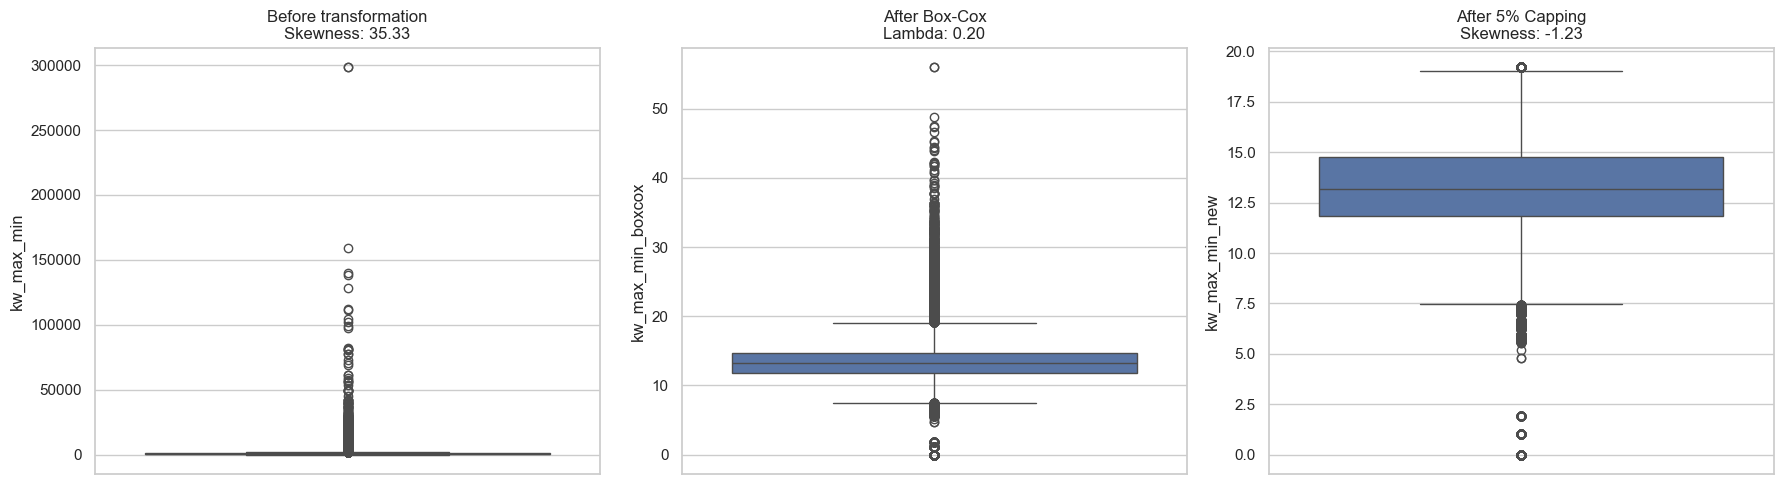


Processing kw_avg_min (Skewness: 31.31)


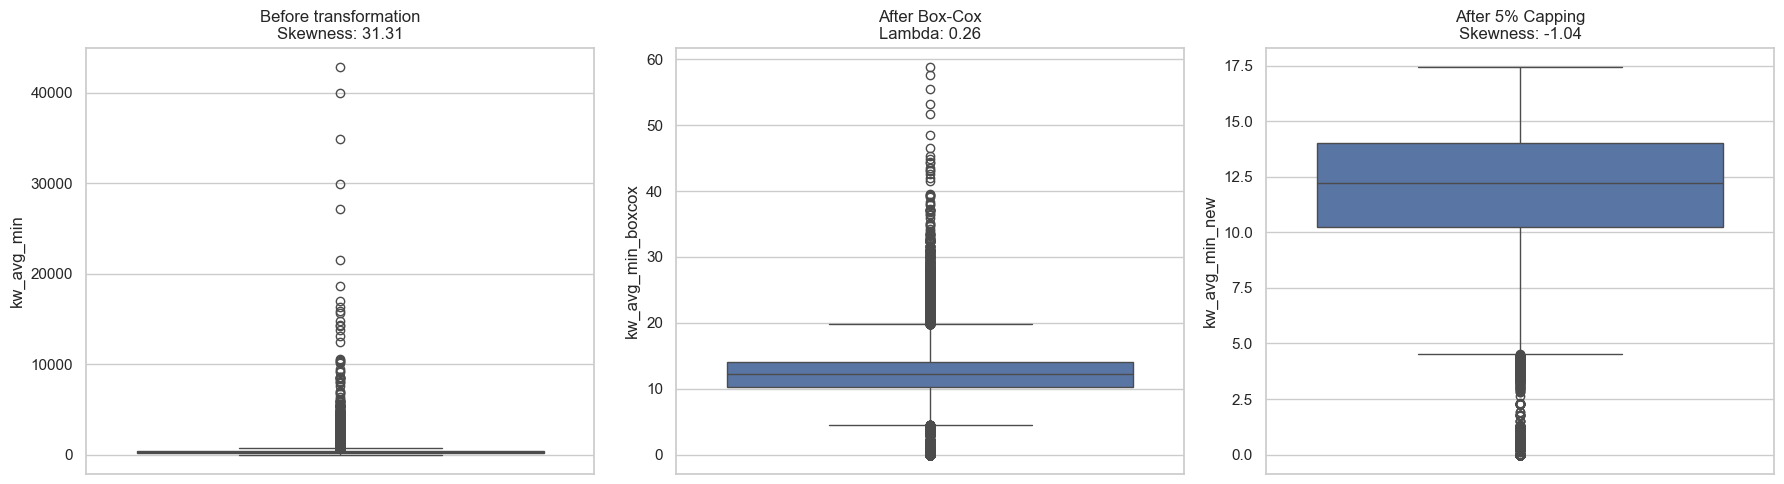


Processing self_reference_min_shares (Skewness: 26.26)


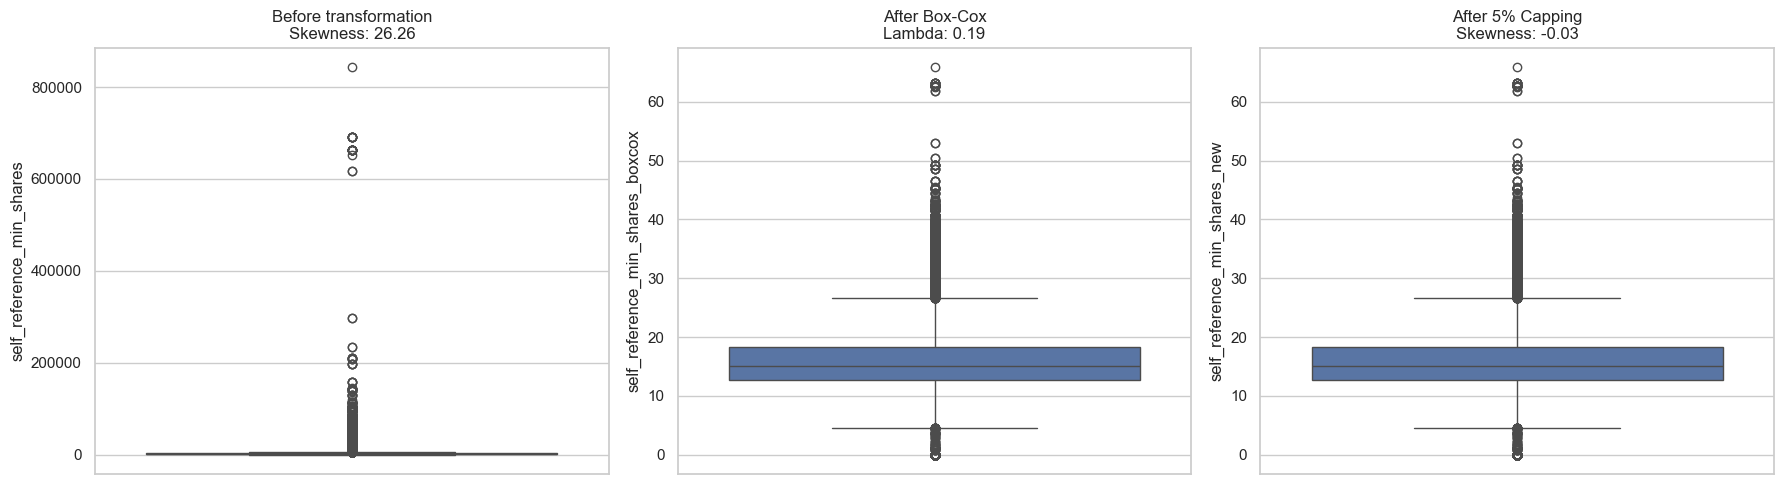


Processing self_reference_avg_sharess (Skewness: 17.91)


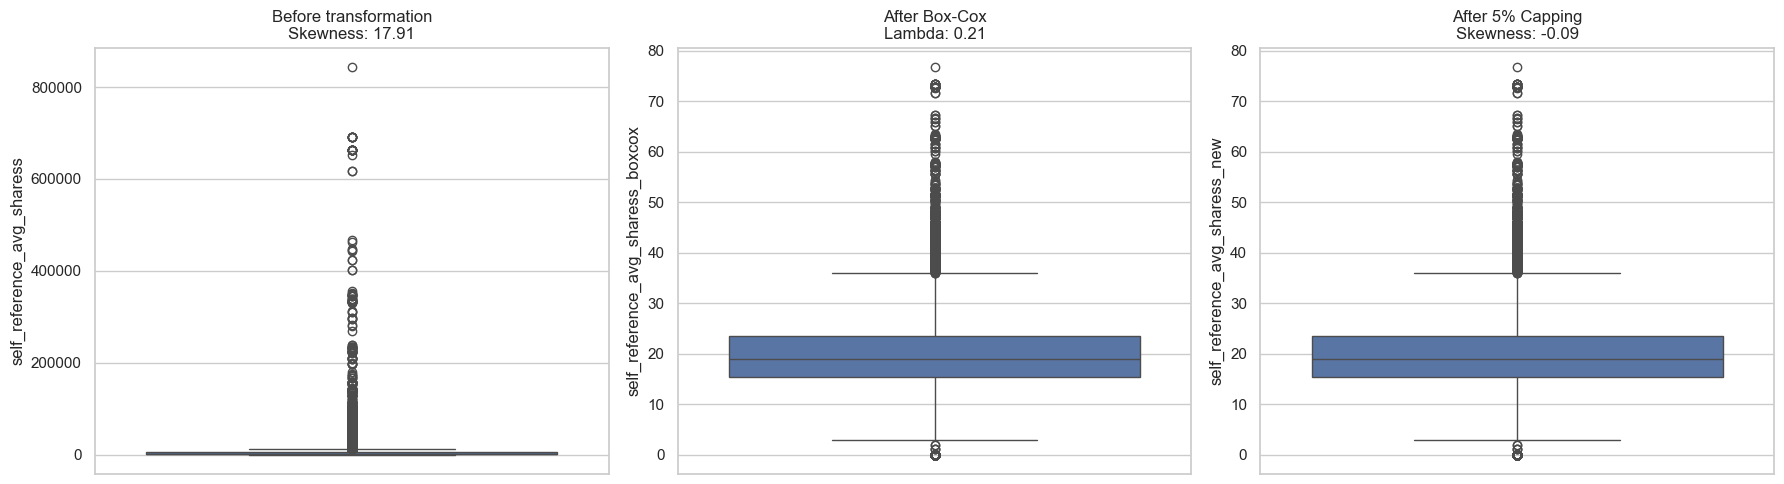


Processing kw_max_avg (Skewness: 16.41)


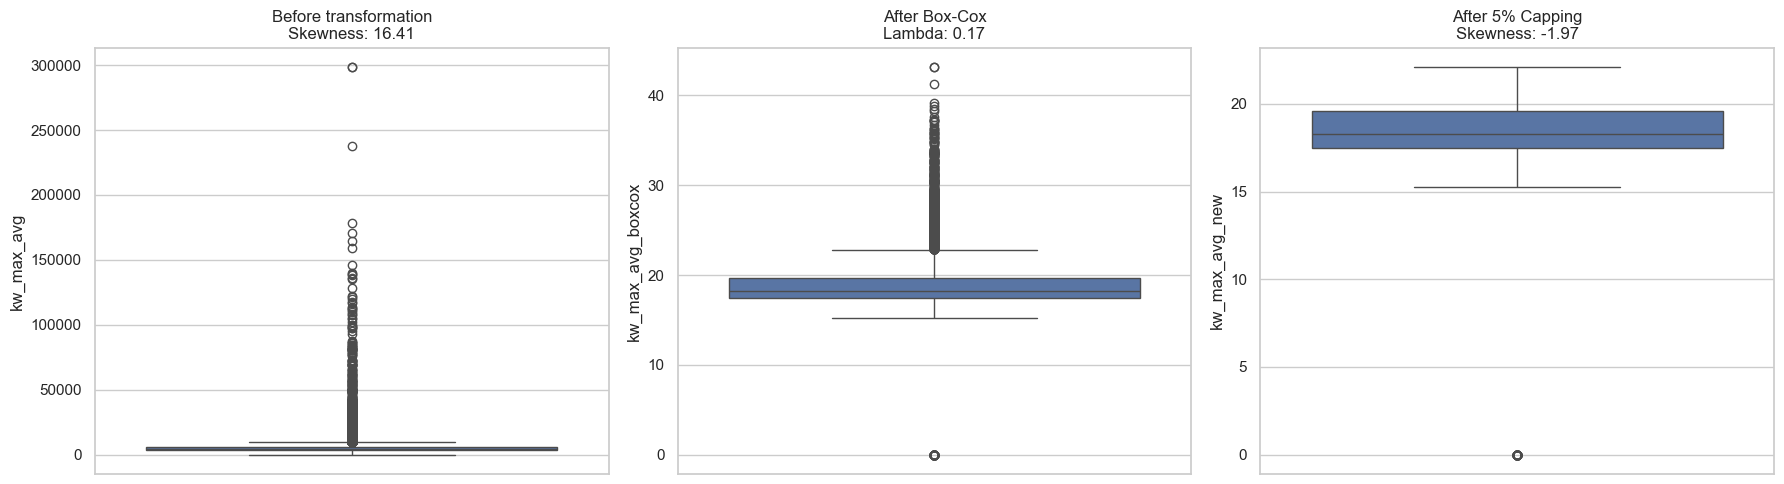


Processing self_reference_max_shares (Skewness: 13.87)


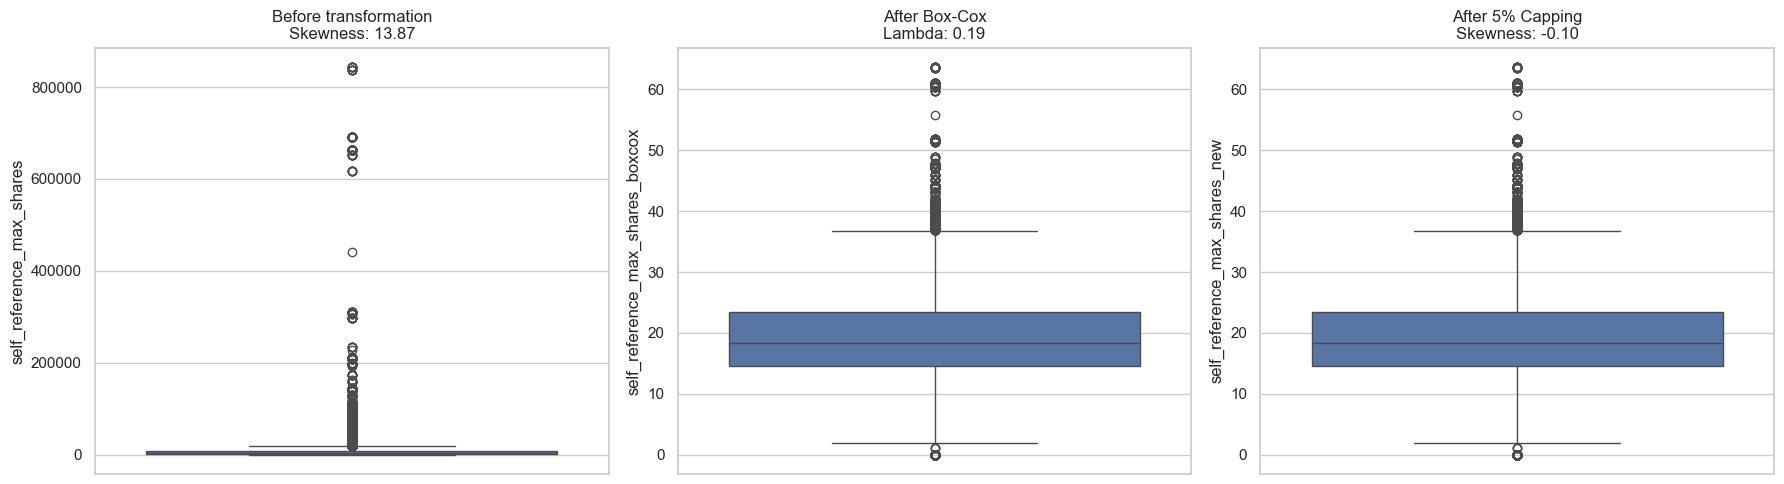


Processing num_videos (Skewness: 7.02)


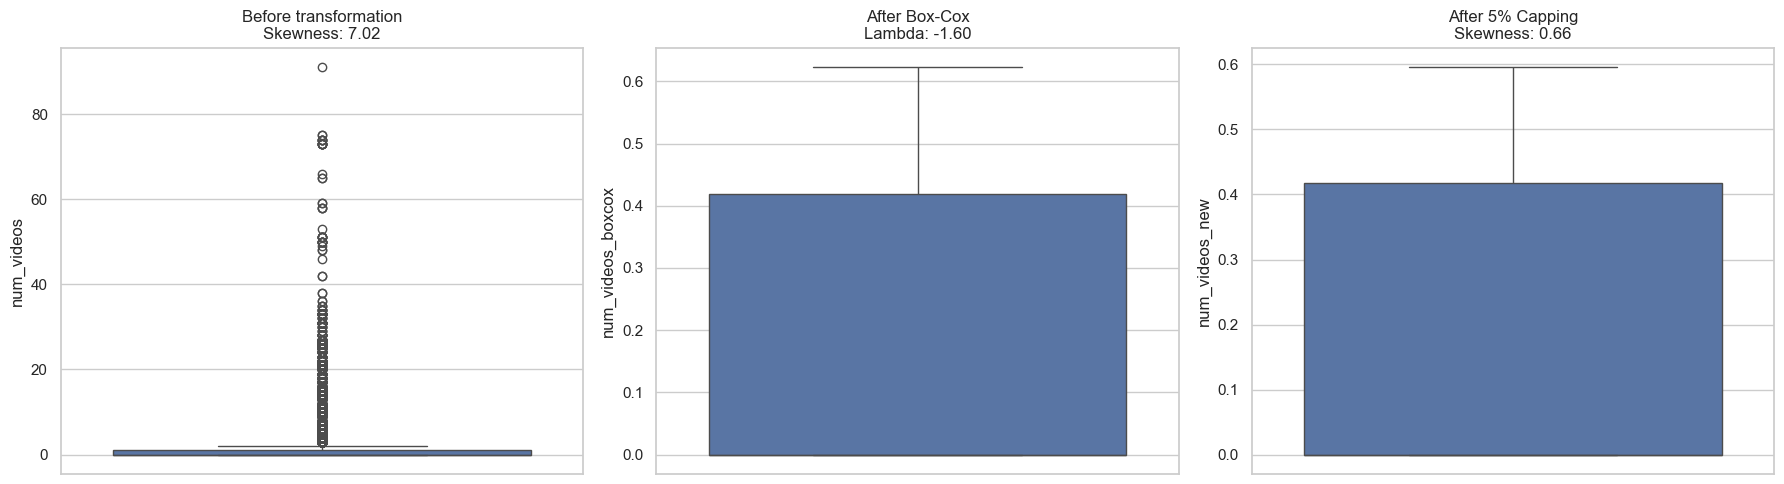


Processing kw_avg_avg (Skewness: 5.76)


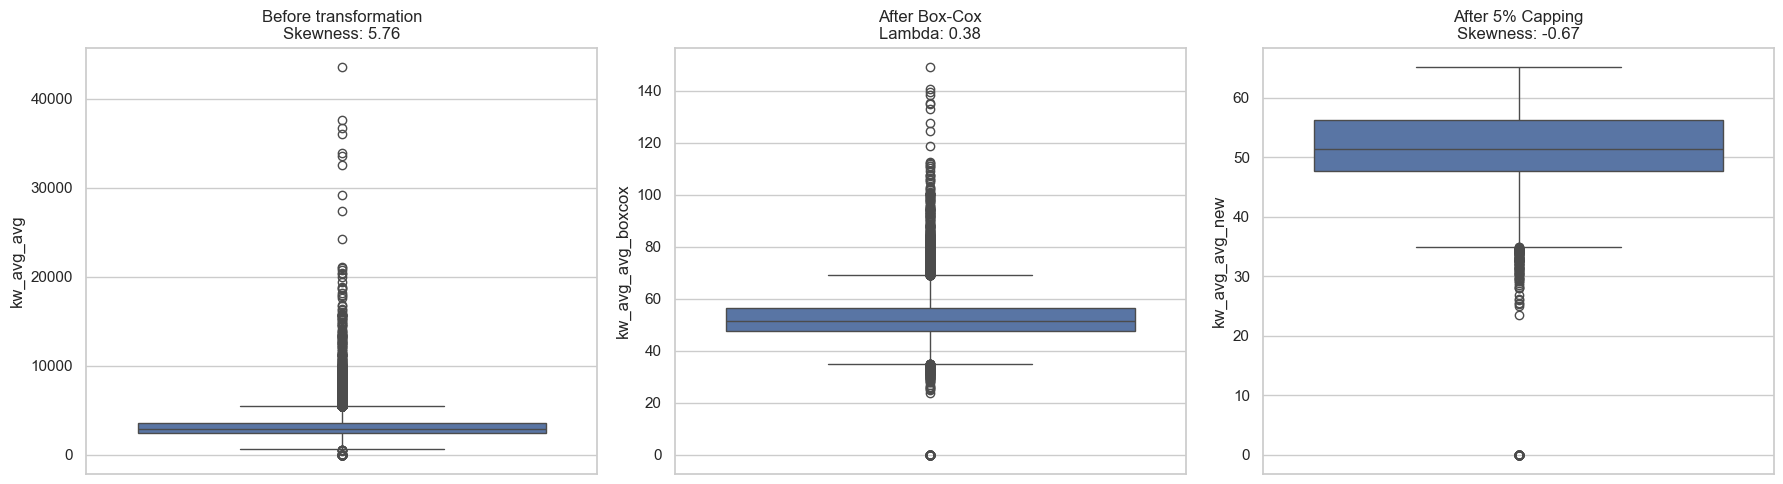


Processing num_self_hrefs (Skewness: 5.17)


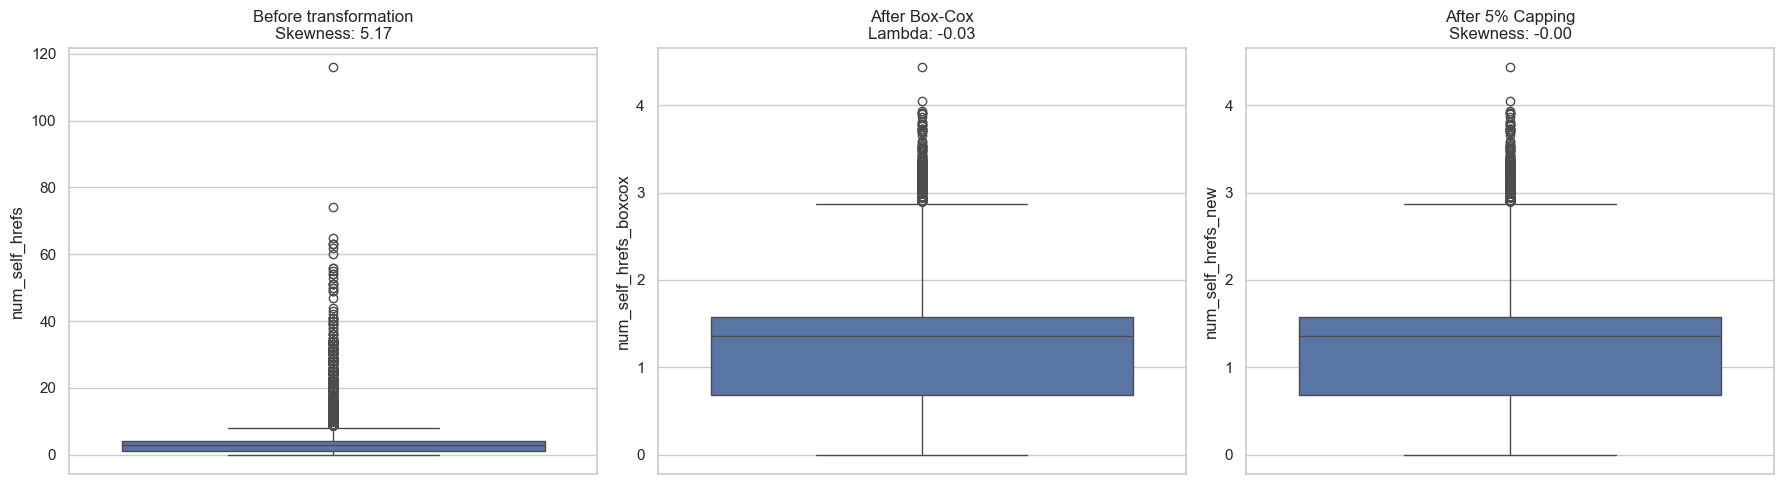


Processing num_hrefs (Skewness: 4.01)


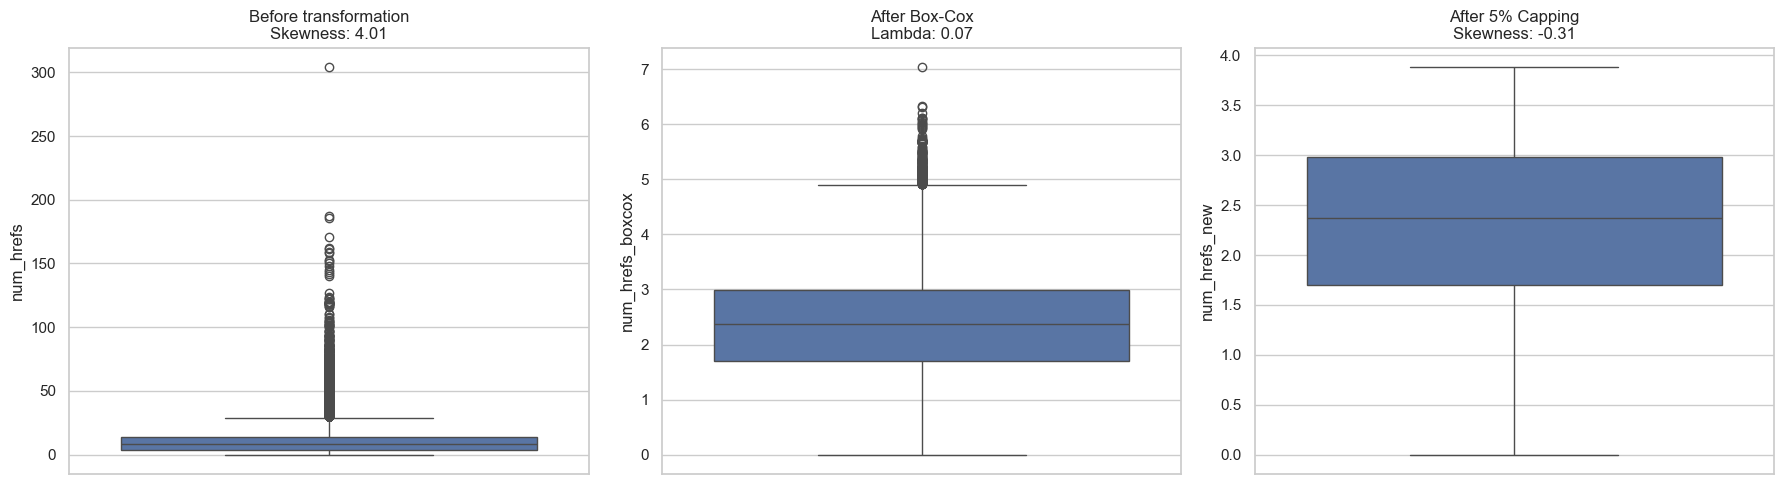


Processing num_imgs (Skewness: 3.95)


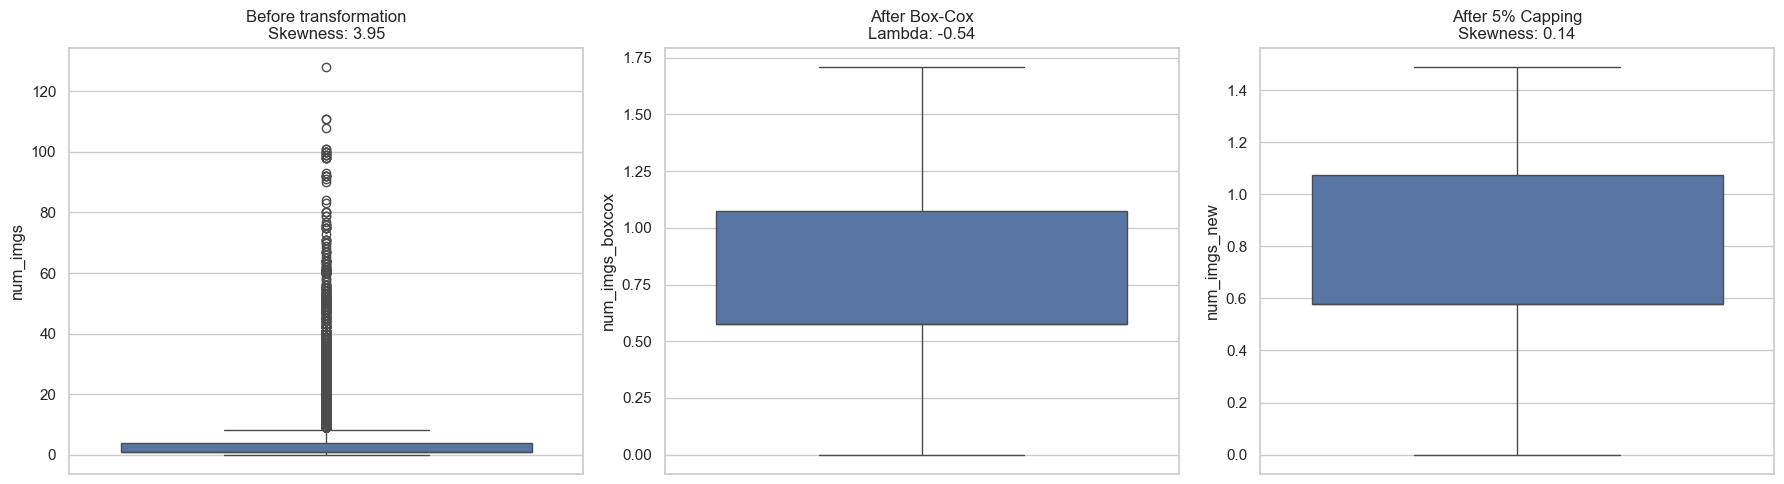


Processing min_positive_polarity (Skewness: 3.04)


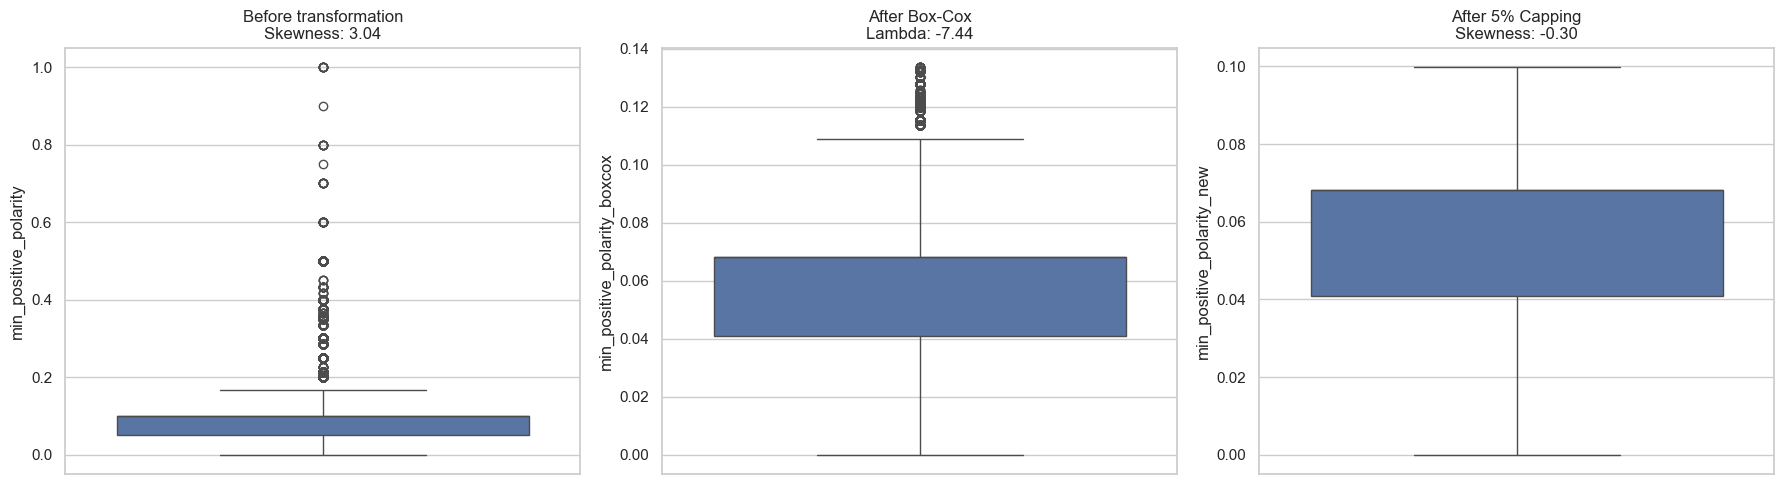


Processing n_tokens_content (Skewness: 2.95)


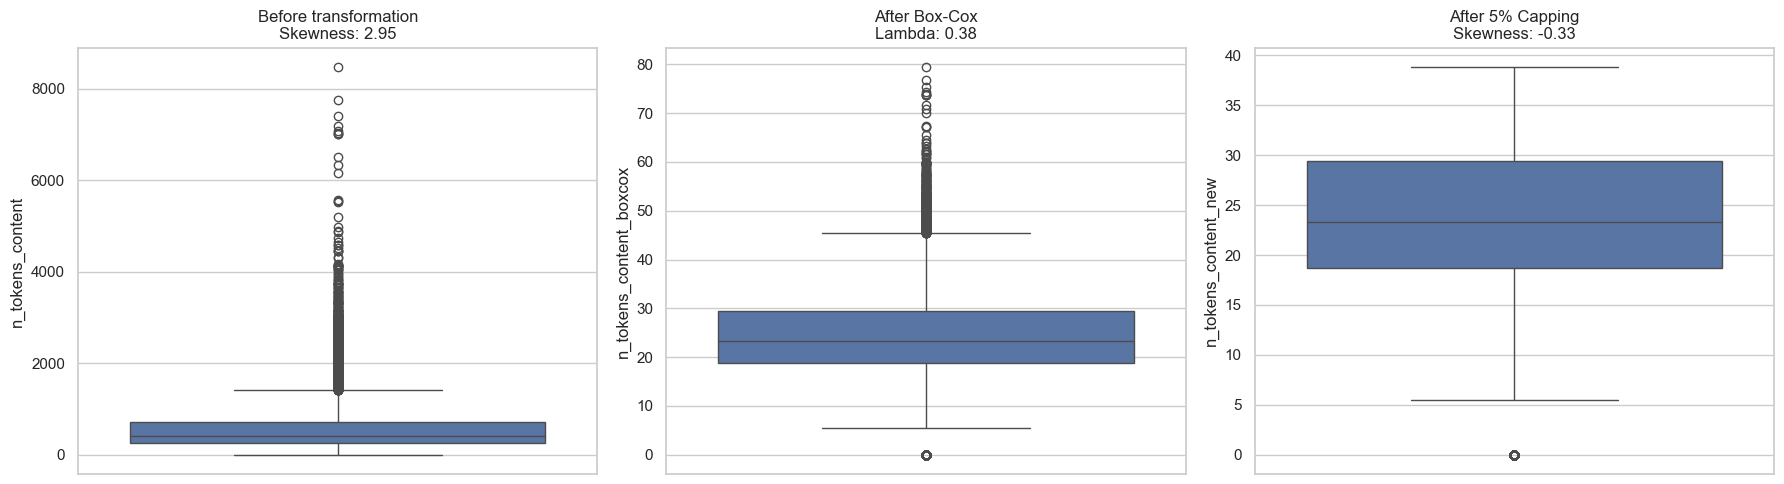


Processing LDA_01 (Skewness: 2.09)


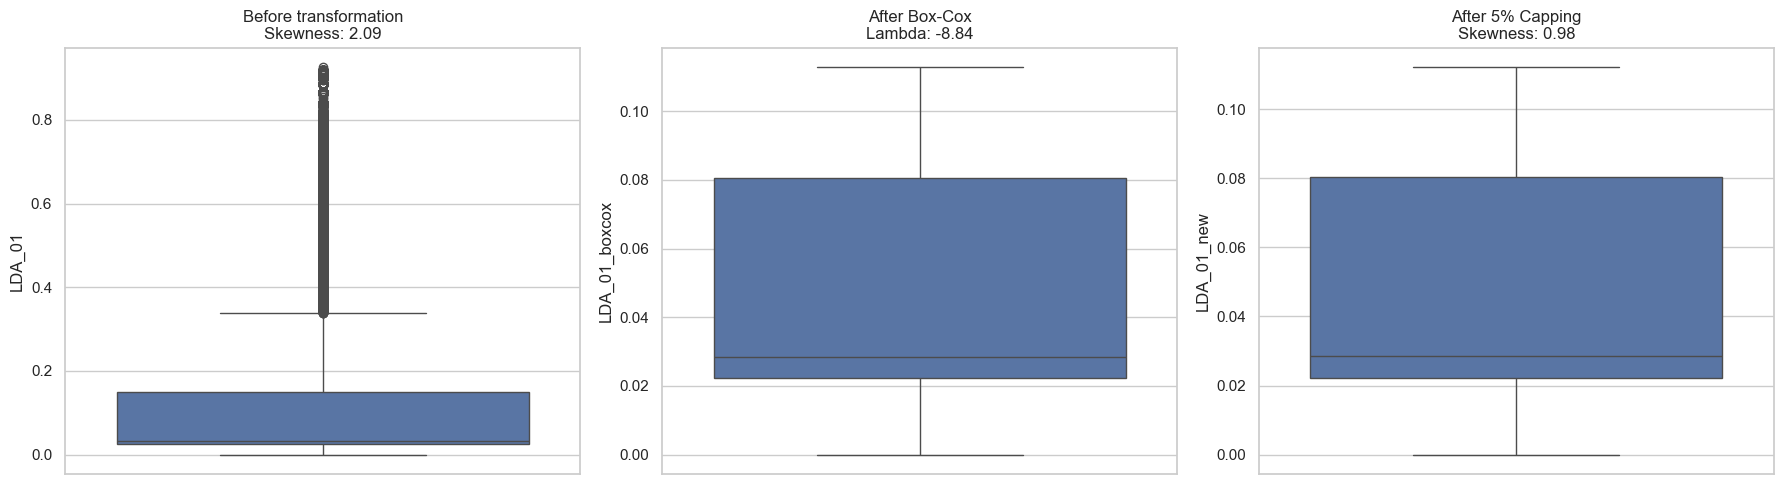


Processing abs_title_sentiment_polarity (Skewness: 1.70)


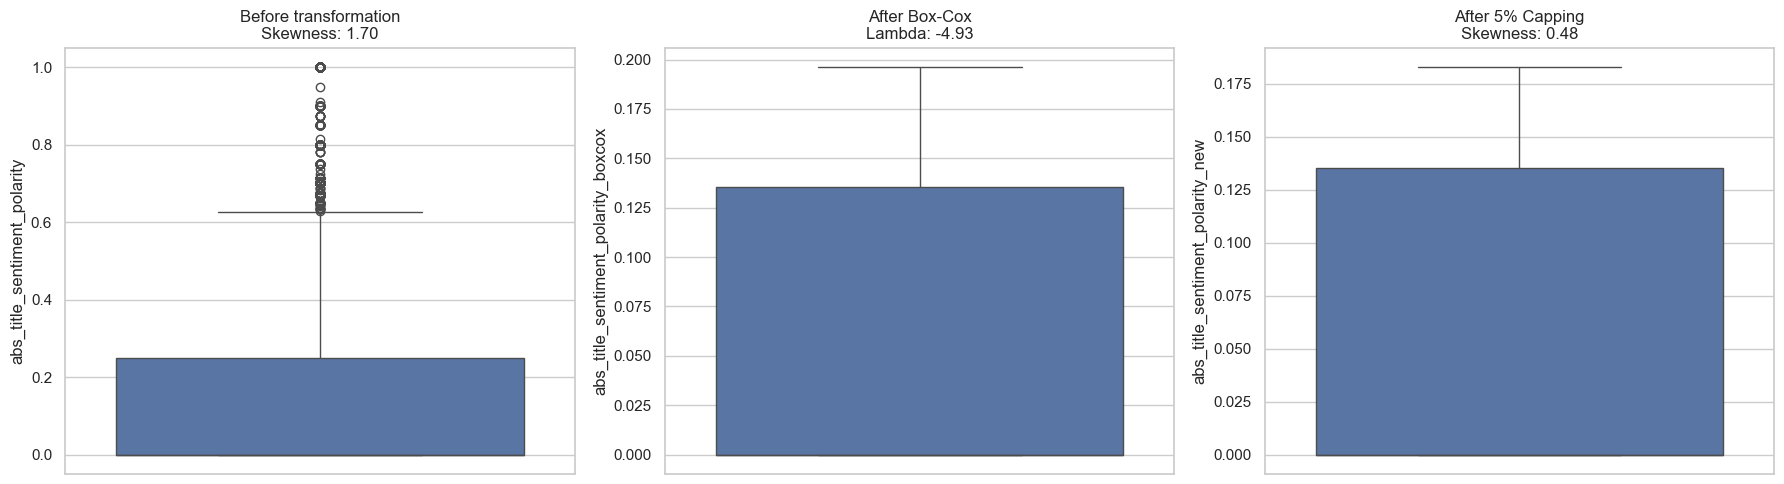


Processing LDA_00 (Skewness: 1.57)


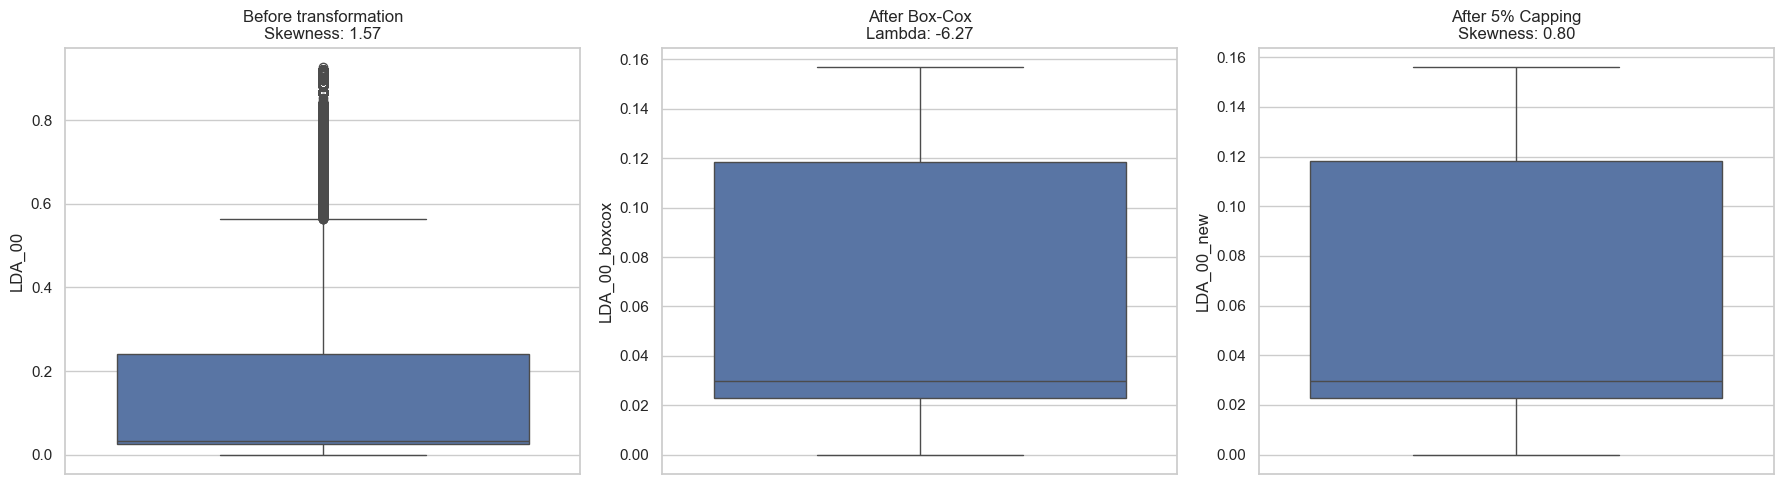


Processing global_rate_negative_words (Skewness: 1.49)


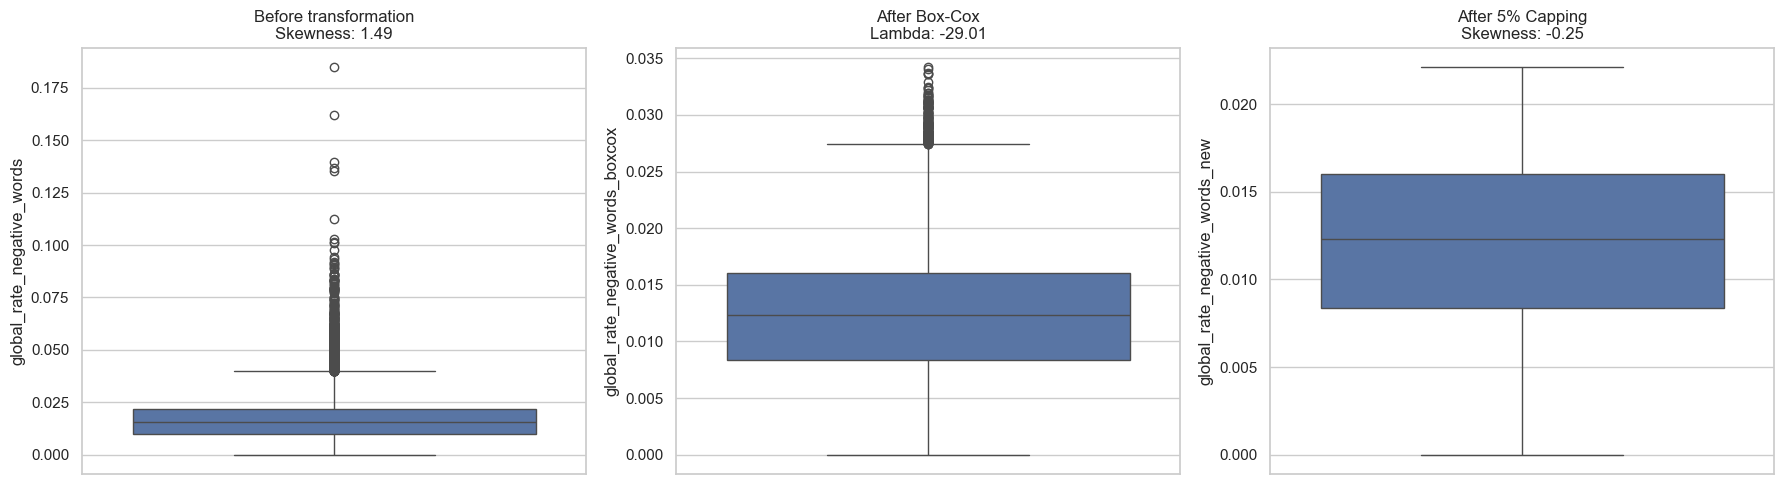


Processing LDA_02 (Skewness: 1.31)


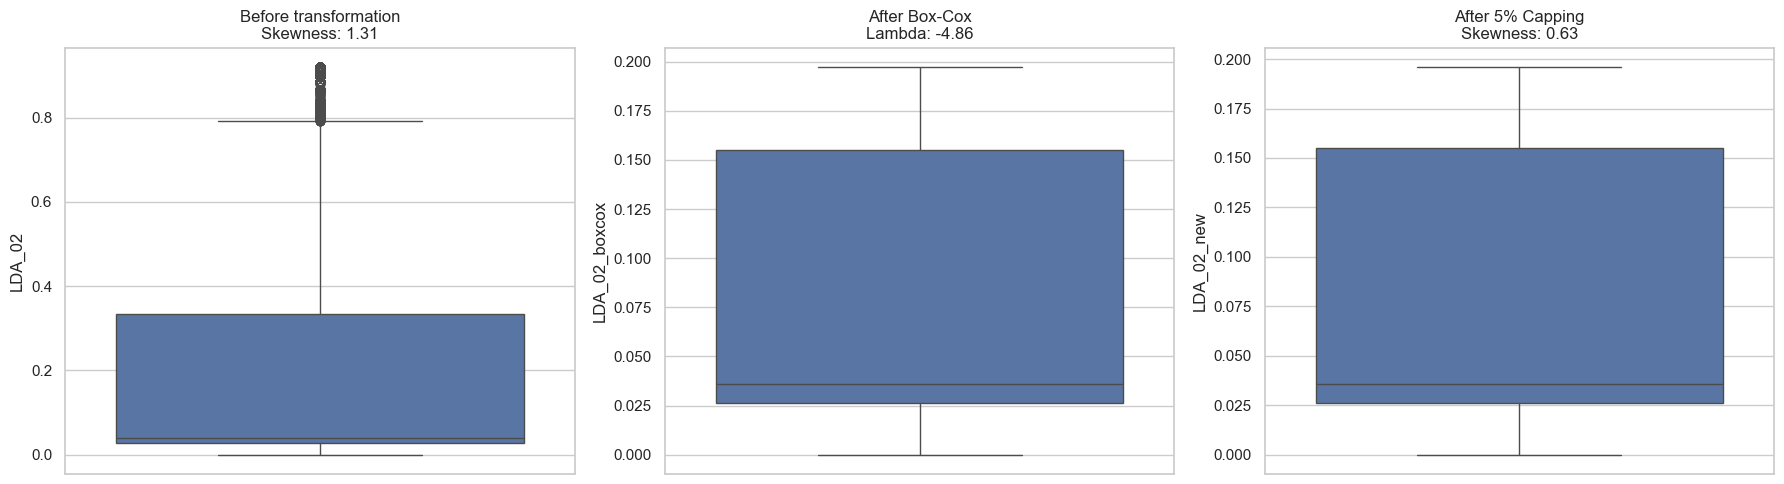


Processing LDA_03 (Skewness: 1.24)


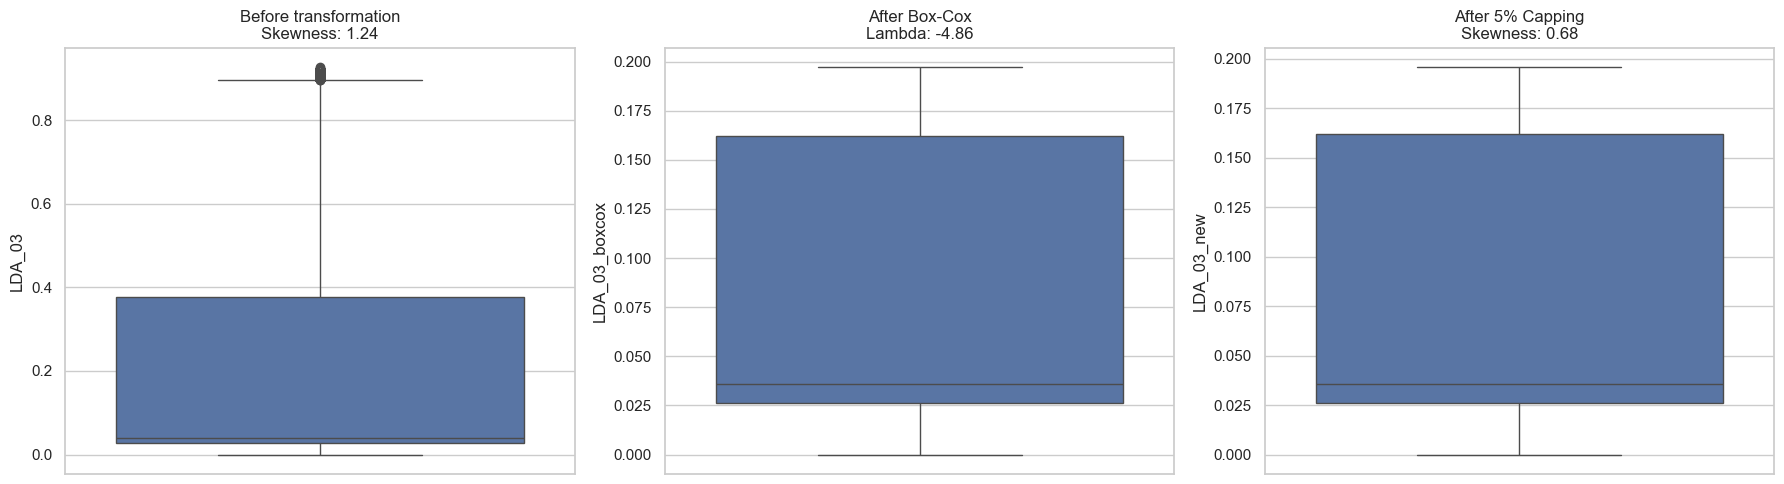


Processing LDA_04 (Skewness: 1.17)


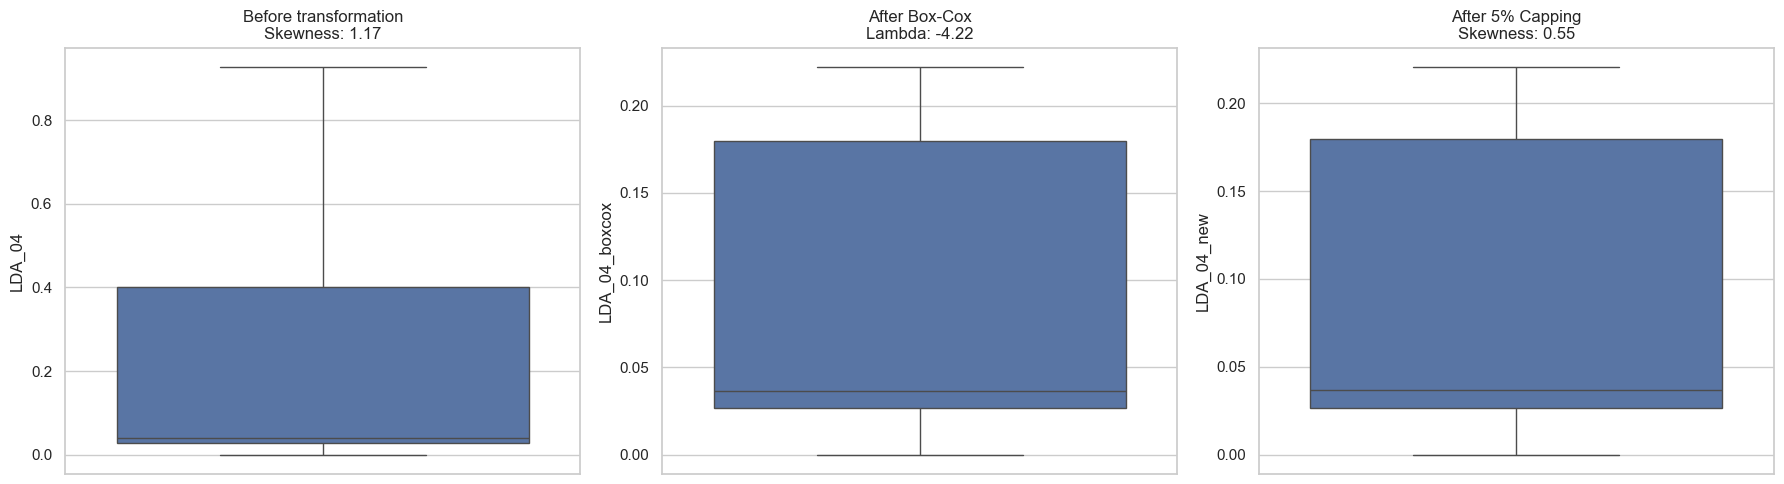


Processing global_subjectivity (Skewness: -1.37)


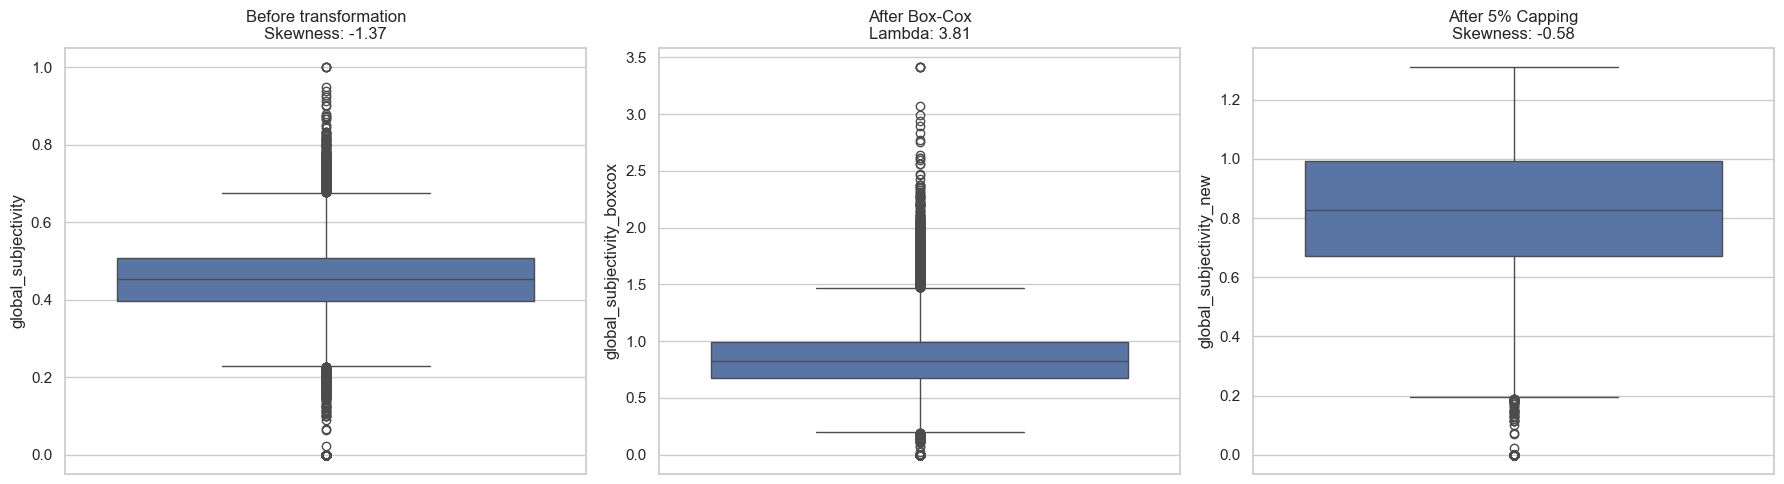


Processing rate_positive_words (Skewness: -1.42)


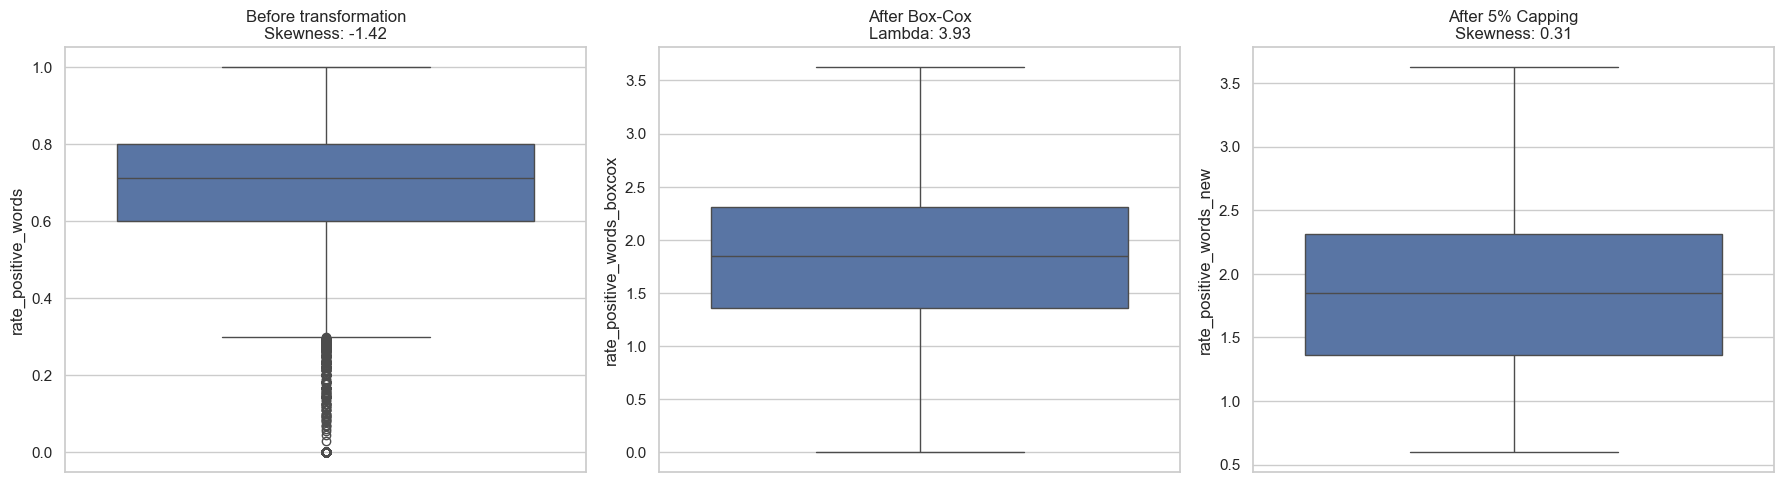


Processing max_negative_polarity (Skewness: -3.46)


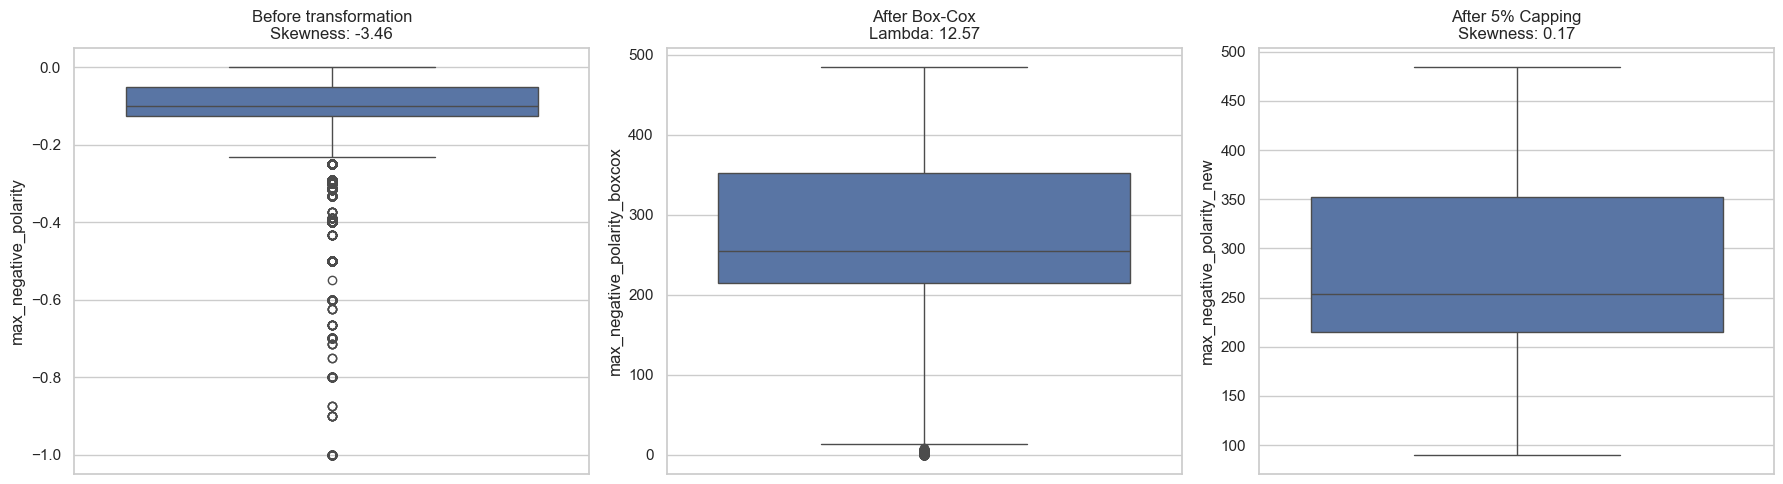


Processing average_token_length (Skewness: -4.58)


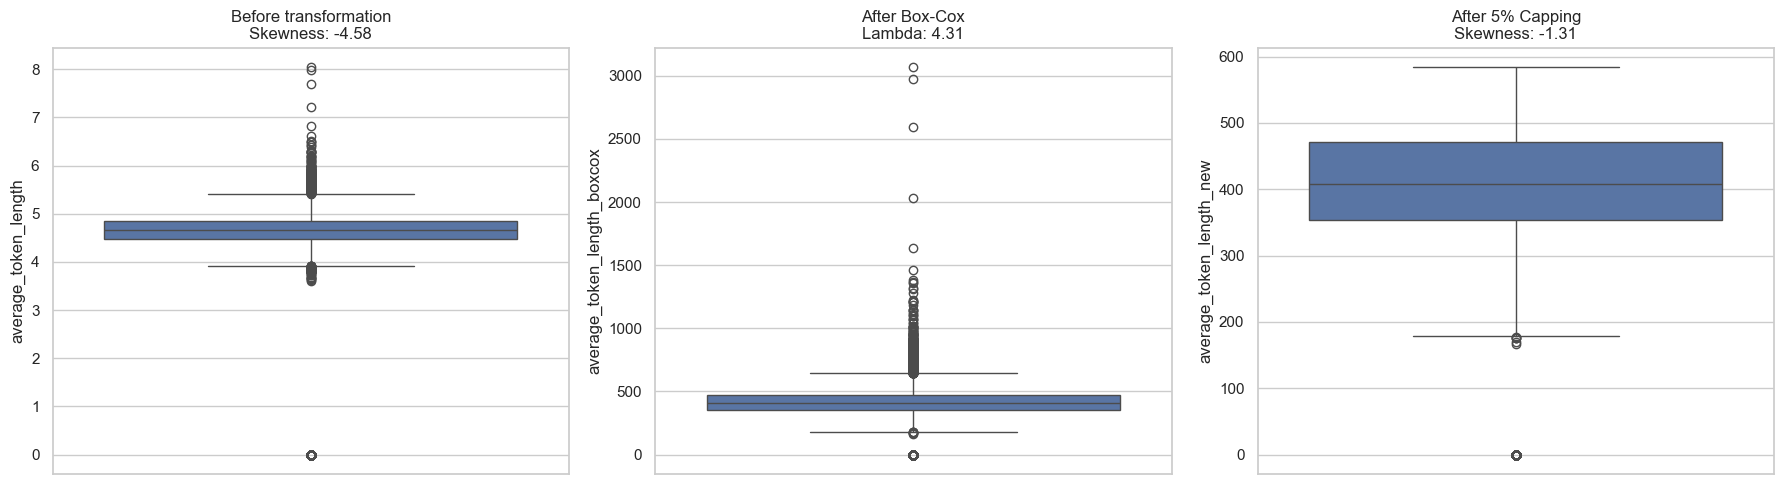


Transformation Results:


original_skewness  new_skewness  improvement
n_non_stop_words                     198.792445     -5.531834   204.324279
n_unique_tokens                      198.655116      5.051712   193.603403
n_non_stop_unique_tokens             198.443294     12.612118   185.831176
kw_max_min                            35.328434     -1.228690    36.557124
kw_avg_min                            31.306108     -1.041904    32.348012
self_reference_min_shares             26.264364     -0.029696    26.294060
kw_max_avg                            16.411670     -1.966664    18.378334
self_reference_avg_sharess            17.914093     -0.090106    18.004200
self_reference_max_shares             13.870849     -0.100769    13.971618
kw_avg_avg                             5.760177     -0.666255     6.426432
num_videos                             7.019533      0.656991     6.362542
num_self_hrefs                         5.172751     -0.000939     5.173690
num_hrefs                              4.013495     -0.311996     4.325491
num_imgs                               3.946596      0.142712     3.803884
min_positive_polarity                  3.040468     -0.304887     3.345355
n_tokens_content                       2.945422     -0.331256     3.276678
global_rate_negative_words             1.491917     -0.254395     1.746312
abs_title_sentiment_polarity           1.704193      0.476557     1.227636
LDA_01                                 2.086722      0.982109     1.104613
LDA_00                                 1.567463      0.800367     0.767096
LDA_02                                 1.311695      0.630263     0.681432
LDA_04                                 1.173129      0.551258     0.621871
LDA_03                                 1.238716      0.676088     0.562628
global_subjectivity                   -1.372689     -0.579451    -0.793238
rate_positive_words                   -1.423106      0.310210    -1.733316
average_token_length                  -4.576012     -1.307873    -3.268139
max_negative_polarity                 -3.459747      0.169102    -3.628849

In [30]:
# 2. Feature Skewness Transformation
print("\n" + "="*50)
print("2. Feature Skewness Transformation")

# Define list of continuous features to check
continuous_features = [
    'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 
    'n_non_stop_words', 'n_non_stop_unique_tokens', 
    'average_token_length', 'num_hrefs', 'num_self_hrefs',
    'num_imgs', 'num_videos', 'num_keywords',
    'kw_max_min', 'kw_avg_min', 'kw_avg_max', 
    'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 
    'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 
    'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 
    'global_subjectivity', 'global_sentiment_polarity', 
    'global_rate_positive_words', 'global_rate_negative_words', 
    'rate_positive_words', 'rate_negative_words', 
    'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 
    'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 
    'title_subjectivity', 'title_sentiment_polarity', 
    'abs_title_subjectivity', 'abs_title_sentiment_polarity'
]

# Filter to include only features that exist in the dataframe and are numeric
numeric_df = df_fe.select_dtypes(include=['int32', 'int64', 'float64'])
continuous_features = [col for col in continuous_features if col in numeric_df.columns]

# Calculate skewness for each feature
skewness = numeric_df[continuous_features].skew().sort_values(ascending=False)
print("Skewness before transformation:")
print(skewness)

# Set threshold for applying transformation
skew_threshold = 1.0  # Features with skewness > 1.0 will be transformed
high_skew_features = skewness[skewness.abs() > skew_threshold].index.tolist()
print(f"\nFound {len(high_skew_features)} features with high skewness (|skew| > {skew_threshold})")
print("Top high-skewed features:", high_skew_features[:5] if len(high_skew_features) > 5 else high_skew_features)

# Function to apply and visualize Box-Cox transformation
def transform_and_visualize(dataframe, feature, skewness_value):
    # Create a figure with 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Plot original distribution
    sns.boxplot(y=dataframe[feature], ax=axes[0])
    axes[0].set_title(f"Before transformation\nSkewness: {skewness_value:.2f}")
    
    # Box-Cox requires all values to be positive
    min_value = dataframe[feature].min()
    
    # If there are non-positive values, shift the data
    if min_value <= 0:
        shift = abs(min_value) + 1  # Add 1 to avoid zeros
        dataframe[f"{feature}_shifted"] = dataframe[feature] + shift
        feature_to_transform = f"{feature}_shifted"
    else:
        feature_to_transform = feature
    
    # Apply Box-Cox transformation
    try:
        transformed_data, lambda_value = stats.boxcox(dataframe[feature_to_transform])
        
        # For display purposes, keep transformed data in a temporary column
        dataframe[f"{feature}_boxcox"] = transformed_data
        
        # Plot the transformed distribution
        sns.boxplot(y=dataframe[f"{feature}_boxcox"], ax=axes[1])
        axes[1].set_title(f"After Box-Cox\nLambda: {lambda_value:.2f}")
        
        # Apply capping to only the most extreme 5% values
        # For positive skew, cap only the upper tail
        # For negative skew, cap only the lower tail
        if dataframe[f"{feature}_boxcox"].skew() > 0:
            # Positive skew - cap the upper 5%
            upper_percentile = np.percentile(dataframe[f"{feature}_boxcox"], 95)
            dataframe[f"{feature}_new"] = np.where(
                dataframe[f"{feature}_boxcox"] > upper_percentile,
                upper_percentile,
                dataframe[f"{feature}_boxcox"]
            )
        else:
            # Negative skew - cap the lower 5%
            lower_percentile = np.percentile(dataframe[f"{feature}_boxcox"], 5)
            dataframe[f"{feature}_new"] = np.where(
                dataframe[f"{feature}_boxcox"] < lower_percentile,
                lower_percentile,
                dataframe[f"{feature}_boxcox"]
            )
        
        # Plot the capped distribution
        sns.boxplot(y=dataframe[f"{feature}_new"], ax=axes[2])
        new_skewness = dataframe[f"{feature}_new"].skew()
        axes[2].set_title(f"After 5% Capping\nSkewness: {new_skewness:.2f}")
        
        plt.tight_layout()
        plt.show()
        
        # Replace original column with the final transformed data
        dataframe[feature] = dataframe[f"{feature}_new"]
        
        # Clean up temporary columns
        for col in [f"{feature}_shifted", f"{feature}_boxcox", f"{feature}_new"]:
            if col in dataframe.columns:
                dataframe.drop(col, axis=1, inplace=True)
        
        # Return success flag and new skewness
        return True, new_skewness
    
    except Exception as e:
        print(f"Error transforming {feature}: {e}")
        
        # Try log transformation as fallback
        try:
            if min_value <= 0:
                shift = abs(min_value) + 1
                dataframe[feature] = np.log1p(dataframe[feature] + shift)
            else:
                dataframe[feature] = np.log1p(dataframe[feature])
            
            # Plot log-transformed data
            sns.boxplot(y=dataframe[feature], ax=axes[1])
            new_skewness = dataframe[feature].skew()
            axes[1].set_title(f"After Log Transform\nSkewness: {new_skewness:.2f}")
            
            # No capping for log transform
            axes[2].set_visible(False)
            
            plt.tight_layout()
            plt.show()
            
            return True, new_skewness
        except:
            print(f"Log transformation also failed for {feature}")
            plt.close(fig)  # Close the figure if both transformations fail
            return False, skewness_value

# Process features with high skewness
results = {}
for feature in high_skew_features:
    print(f"\nProcessing {feature} (Skewness: {skewness[feature]:.2f})")
    success, new_skewness = transform_and_visualize(df_fe, feature, skewness[feature])
    if success:
        results[feature] = {
            'original_skewness': skewness[feature],
            'new_skewness': new_skewness,
            'improvement': skewness[feature] - new_skewness
        }

# Print transformation results
if results:
    print("\nTransformation Results:")
    results_df = pd.DataFrame(results).T
    display(results_df.sort_values('improvement', ascending=False))

The feature skewness transformation process aimed to reduce high skewness in continuous numerical variables. We want to improve their distributions for better model performance. Initially, 27 features exhibited high skewness (|skew| > 1.0). To address this, a Box-Cox transformation was applied to positively skewed features. It ensures all values were positive by shifting where necessary. If Box-Cox failed, we considered using a log transformation as a fallback. Additionally, 5% capping was implemented to limit extreme outliers. After finishing transformation, most features showed improved skewness and made them more suitable for predictive modeling. 

In [31]:
# 3. Feature Scaling
print("\n" + "="*50)
print("3. Feature Scaling")

# Identify numeric columns for scaling (exclude target variable if it's numeric)
numeric_columns = df_fe.select_dtypes(include=['int32', 'int64', 'float64']).columns.tolist()
if 'shares' in numeric_columns:
    numeric_columns.remove('shares')
if 'shares_original_value' in numeric_columns:
    numeric_columns.remove('shares_original_value')

print(f"Scaling {len(numeric_columns)} numeric features")

# Apply standard scaling
scaler = StandardScaler()
df_fe[numeric_columns] = scaler.fit_transform(df_fe[numeric_columns])

# Check statistics after scaling
scaled_stats = df_fe[numeric_columns].describe().T[['mean', 'std', 'min', 'max']]
print("\nStatistics after scaling (sample of features):")
display(scaled_stats.head())


3. Feature Scaling
Scaling 61 numeric features

Statistics after scaling (sample of features):


mean       std       min        max
n_tokens_title            3.785355e-16  1.000013 -3.972899   5.960828
n_tokens_content         -3.541601e-16  1.000013 -2.937041   1.839659
n_unique_tokens          -9.406034e-16  1.000013 -1.880639  58.351434
n_non_stop_words          6.997172e-16  1.000013 -5.706852   0.175228
n_non_stop_unique_tokens  5.620679e-16  1.000013 -2.003119  79.758437

In [32]:
# 4. Feature Engineering - Create New Features
print("\n" + "="*50)
print("4. Creating New Features")

# 4.1 Interaction Features
print("\n4.1 Creating interaction features")

# Create interaction between title and content length
if all(col in df_fe.columns for col in ['n_tokens_title', 'n_tokens_content']):
    df_fe['title_content_ratio'] = df_fe['n_tokens_title'] / df_fe['n_tokens_content']
    print("Created title_content_ratio feature")

# Create interaction between positive and negative sentiment
if all(col in df_fe.columns for col in ['global_rate_positive_words', 'global_rate_negative_words']):
    df_fe['pos_neg_ratio'] = df_fe['global_rate_positive_words'] / (df_fe['global_rate_negative_words'] + 0.0001)
    print("Created pos_neg_ratio feature")

# Create interaction between links and images
if all(col in df_fe.columns for col in ['num_hrefs', 'num_imgs']):
    df_fe['media_refs_ratio'] = (df_fe['num_imgs'] + 1) / (df_fe['num_hrefs'] + 1)
    print("Created media_refs_ratio feature")


4. Creating New Features

4.1 Creating interaction features
Created title_content_ratio feature
Created pos_neg_ratio feature
Created media_refs_ratio feature


In [33]:
# 4.2 Polynomial features for key variables
print("\n4.2 Creating polynomial features")

# Create polynomial features for selected important variables
polynomial_candidates = ['global_subjectivity', 'num_hrefs', 'num_keywords']
polynomial_candidates = [col for col in polynomial_candidates if col in df_fe.columns]

for col in polynomial_candidates:
    df_fe[f'{col}_squared'] = df_fe[col] ** 2
    print(f"Created {col}_squared feature")


4.2 Creating polynomial features
Created global_subjectivity_squared feature
Created num_hrefs_squared feature
Created num_keywords_squared feature


In [34]:
# 4.3 Feature Aggregation
print("\n4.3 Creating aggregated features")

# Aggregate sentiment features
sentiment_features = [col for col in df_fe.columns if 'sentiment' in col or 'polarity' in col]
if sentiment_features:
    df_fe['sentiment_aggregate'] = df_fe[sentiment_features].mean(axis=1)
    print("Created sentiment_aggregate feature")

# Aggregate keyword features
keyword_features = [col for col in df_fe.columns if 'kw_' in col]
if keyword_features:
    df_fe['keyword_aggregate'] = df_fe[keyword_features].mean(axis=1)
    print("Created keyword_aggregate feature")


4.3 Creating aggregated features
Created sentiment_aggregate feature
Created keyword_aggregate feature


In [35]:
# 5. Dimensionality Reduction
print("\n" + "="*50)
print("5. Feature Selection")

# 5.1 Remove highly correlated features
print("\n5.1 Checking for highly correlated features")

# Calculate correlation matrix for numeric features
numeric_df = df_fe.select_dtypes(include=['int32', 'int64', 'float64'])
corr_matrix = numeric_df.corr().abs()

# Identify highly correlated feature pairs
high_corr_threshold = 0.9
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > high_corr_threshold)]

if high_corr_features:
    print(f"Found {len(high_corr_features)} features with correlation > {high_corr_threshold}:")
    print(high_corr_features)
    
    # Remove highly correlated features
    df_fe = df_fe.drop(high_corr_features, axis=1)
    print(f"Removed {len(high_corr_features)} highly correlated features")
else:
    print(f"No features found with correlation > {high_corr_threshold}")



5. Feature Selection

5.1 Checking for highly correlated features
Found 4 features with correlation > 0.9:
['n_non_stop_unique_tokens', 'kw_avg_min', 'self_reference_avg_sharess', 'shares_num']
Removed 4 highly correlated features


In [36]:
# 6. Final Dataset Review
print("\n" + "="*50)
print("6. Final Dataset Review")

print(f"Final dataset shape: {df_fe.shape}")
print(f"Features added: {df_fe.shape[1] - df.shape[1]}")
print(f"Total number of features: {df_fe.shape[1]}")

# Display feature types
feature_types = df_fe.dtypes.value_counts()
print("\nFeature types in final dataset:")
print(feature_types)

# Check if any categorical features remain as objects
remaining_objects = df_fe.select_dtypes(include=['object']).columns
if len(remaining_objects) > 0:
    print("\nWarning: Some object columns remain:")
    print(remaining_objects)
else:
    print("\nAll categorical features have been properly encoded.")

# Save the engineered dataset
df_fe.to_csv('Data/engineered_data.csv', index=False)
print("\nFeature engineering completed! Engineered dataset saved to 'engineered_data.csv'")

# Show sample of final dataset
print("\nSample of final dataset:")
display(df_fe.head())


6. Final Dataset Review
Final dataset shape: (39644, 74)
Features added: 11
Total number of features: 74

Feature types in final dataset:
float64    65
bool        7
int64       1
object      1
Name: count, dtype: int64

Index(['shares_original_value'], dtype='object')

Feature engineering completed! Engineered dataset saved to 'engineered_data.csv'

Sample of final dataset:


n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0        0.757447         -0.743523         1.109069          0.175228   
1       -0.661657         -0.594141         0.601491          0.175228   
2       -0.661657         -0.778743         0.337987          0.175228   
3       -0.661657          0.261372        -0.320734          0.175228   
4        1.230482          1.338783        -1.185615          0.175228   

   num_hrefs  num_self_hrefs  num_imgs  num_videos  average_token_length  \
0  -0.706566       -0.149019 -0.286799   -0.751195              0.064691   
1  -0.985688       -0.740154 -0.286799   -0.751195              0.794540   
2  -0.985688       -0.740154 -0.286799   -0.751195             -0.706613   
3   0.188843       -1.767673 -0.286799   -0.751195             -0.678126   
4   1.128832        2.522405  1.686736   -0.751195              0.071916   

   num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  \
0     -1.164821                  -0.236445                       2.148880   
1     -1.688626                  -0.236445                      -0.465359   
2     -0.641015                  -0.236445                      -0.465359   
3     -0.117210                  -0.236445                       2.148880   
4     -0.117210                  -0.236445                      -0.465359   

   data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
0            -0.432948               -0.249487             -0.476911   
1             2.309747               -0.249487             -0.476911   
2             2.309747               -0.249487             -0.476911   
3            -0.432948               -0.249487             -0.476911   
4            -0.432948               -0.249487              2.096826   

   data_channel_is_world  kw_min_min  kw_max_min  kw_min_max  kw_max_max  \
0              -0.519566   -0.374924   -3.900145   -0.234755   -3.507348   
1              -0.519566   -0.374924   -3.900145   -0.234755   -3.507348   
2              -0.519566   -0.374924   -3.900145   -0.234755   -3.507348   
3              -0.519566   -0.374924   -3.900145   -0.234755   -3.507348   
4              -0.519566   -0.374924   -3.900145   -0.234755   -3.507348   

   kw_avg_max  kw_min_avg  kw_max_avg  kw_avg_avg  self_reference_min_shares  \
0   -1.919178   -0.982156  -10.812453   -7.639526                  -0.292303   
1   -1.919178   -0.982156  -10.812453   -7.639526                  -1.723839   
2   -1.919178   -0.982156  -10.812453   -7.639526                  -0.035299   
3   -1.919178   -0.982156  -10.812453   -7.639526                  -1.723839   
4   -1.919178   -0.982156  -10.812453   -7.639526                  -0.254921   

   self_reference_max_shares  weekday_is_monday  weekday_is_tuesday  \
0                  -0.563888           2.225232           -0.478664   
1                  -1.714075           2.225232           -0.478664   
2                  -0.359504           2.225232           -0.478664   
3                  -1.714075           2.225232           -0.478664   
4                   0.971402           2.225232           -0.478664   

   weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  \
0             -0.480454            -0.473761          -0.409827   
1             -0.480454            -0.473761          -0.409827   
2             -0.480454            -0.473761          -0.409827   
3             -0.480454            -0.473761          -0.409827   
4             -0.480454            -0.473761          -0.409827   

   weekday_is_saturday  weekday_is_sunday  is_weekend    LDA_00    LDA_01  \
0            -0.256821          -0.272322   -0.388118  1.573523  1.717067   
1            -0.256821          -0.272322   -0.388118  1.734430 -0.217430   
2            -0.256821          -0.272322   -0.388118  0.935194 -0.541429   
3            -0.256821          -0.272322   -0.388118 -0.711907  1.760938   
4            -0.256821          -0.272322   -0.38811

**Oveview of Feature Engineering:**

Our group performed feature engineering to enhance the dataset’s performance in machine learning models. 

First, we processed categorical variables by applying label encoding to binary variables. We used one-hot encoding for variables with fewer categories, and frequency encoding to those with many unique categories. Additionally, we converted the target variable "shares" into numerical format for further analysis. In terms of feature transformation, we identified numerical variables with high skewness and applied Box-Cox or logarithmic transformations to reduce skewness and also limiting extreme values to reduce the impact of outliers. 

Next, we standardized all numerical variables to have a mean of zero and a variance of one to improve model stability. To enrich the dataset, we created interaction features such as the ratio between title and content length, the proportion of positive to negative sentiment words, and the ratio of media references. 

Furthermore, we generated polynomial features for key variables and aggregated sentiment and keyword features to extract more representative information. To reduce redundancy, we analyzed feature correlations and removed variables with correlation coefficients above 0.9 to minimize multicollinearity. Compared to the original dataset, these transformations improved the distribution of variables and introduced new features that enhance interpretability and predictive power. 

## **Modeling**

Building on our motivation to understand what factors drive online news popularity, our group aim to develop predictive models that classify articles into different engagement levels based on their shares. We hypothesize that factors such as linguistic attributes, sentiment and keyword relevance etc. of an article impact its shareability. Our expectation is that machine learning models will identify the most influential features that contribute to engagement which allows content creators to optimize their articles for a wider audience. Additionally, we anticipate that models like Random Forest and XGBoost will perform well due to their ability to handle complex feature interactions and neural networks may good at capturing nonlinear relationships.

In [37]:
# Set random seed for reproducibility
np.random.seed(42)

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [38]:
#----------------------------------------
# Step 1: Prepare Modeling Data
#----------------------------------------
print("\n" + "="*80)
print("STEP 1: Preparing Data for Modeling")
print("="*80)

# Exclude columns that would leak the target or are irrelevant
exclude_columns = [
]
df  = pd.get_dummies(df, columns=["followers"], prefix="followers")
# Remove columns to exclude
df_filtered = df.drop(columns=[col for col in exclude_columns if col in df.columns])

# Separate features and target
X = df_filtered.drop(['shares', 'shares_num', 'follower_num'], axis=1)
y = df_filtered['shares']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target classes: {y.unique()}")
print(f"Class distribution:\n{y.value_counts()}")

# Ensure consistent class order (Low, Medium, High, Viral)
class_order = ['Low', 'Medium', 'High', 'Viral']
# Verify all classes are in the dataset
class_order = [c for c in class_order if c in y.unique()]

# use LabelEncoder to convert class labels to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(f"Original labels: {label_encoder.classes_}")
print(f"Encoded labels: {np.unique(y_encoded)}")

# keep the original class labels for reference
label_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))
print(f"Label mapping: {label_mapping}")

# Split data into training and testing sets (stratified by target)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

# Check for any object columns that need encoding
object_columns = X_train.select_dtypes(include=['object']).columns
if len(object_columns) > 0:
    print(f"Encoding object columns: {list(object_columns)}")
    
    # One-hot encode any remaining object columns
    X_train = pd.get_dummies(X_train, drop_first=True)
    X_test = pd.get_dummies(X_test, drop_first=True)

    # Ensure X_test has the same columns as X_train
    for col in X_train.columns:
        if col not in X_test.columns:
            X_test[col] = 0

    # Make sure they have the same columns in the same order
    X_test = X_test[X_train.columns]
X.info()


STEP 1: Preparing Data for Modeling
Features shape: (39644, 66)
Target shape: (39644,)
Target classes: ['Low' 'High']
Class distribution:
shares
High    21154
Low     18490
Name: count, dtype: int64
Original labels: ['High' 'Low']
Encoded labels: [0 1]
Label mapping: {0: 'High', 1: 'Low'}
Training set shape: (31715, 66), (31715,)
Testing set shape: (7929, 66), (7929,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 39644 non-null  int64  
 1   n_tokens_content               39644 non-null  int64  
 2   n_unique_tokens                39644 non-null  float64
 3   n_non_stop_words               39644 non-null  float64
 4   n_non_stop_unique_tokens       39644 non-null  float64
 5   num_hrefs                      39644 non-null  int64  
 6   num_self_hrefs                 396

Found 17 feature pairs with correlation > 0.7:
n_unique_tokens & n_non_stop_unique_tokens: 0.9999
n_unique_tokens & n_non_stop_words: 0.9996
n_non_stop_words & n_non_stop_unique_tokens: 0.9995
kw_max_min & kw_avg_min: 0.9405
kw_min_min & kw_max_max: -0.8572
self_reference_max_shares & self_reference_avg_sharess: 0.8535
data_channel_is_world & LDA_02: 0.8366
self_reference_min_shares & self_reference_avg_sharess: 0.8189
kw_max_avg & kw_avg_avg: 0.8119
global_rate_negative_words & rate_negative_words: 0.7796
data_channel_is_bus & LDA_00: 0.7747
data_channel_is_tech & LDA_04: 0.7497
avg_negative_polarity & min_negative_polarity: 0.7489
global_sentiment_polarity & rate_positive_words: 0.7278
title_subjectivity & abs_title_sentiment_polarity: 0.7145
avg_positive_polarity & max_positive_polarity: 0.7036
weekday_is_sunday & is_weekend: 0.7016


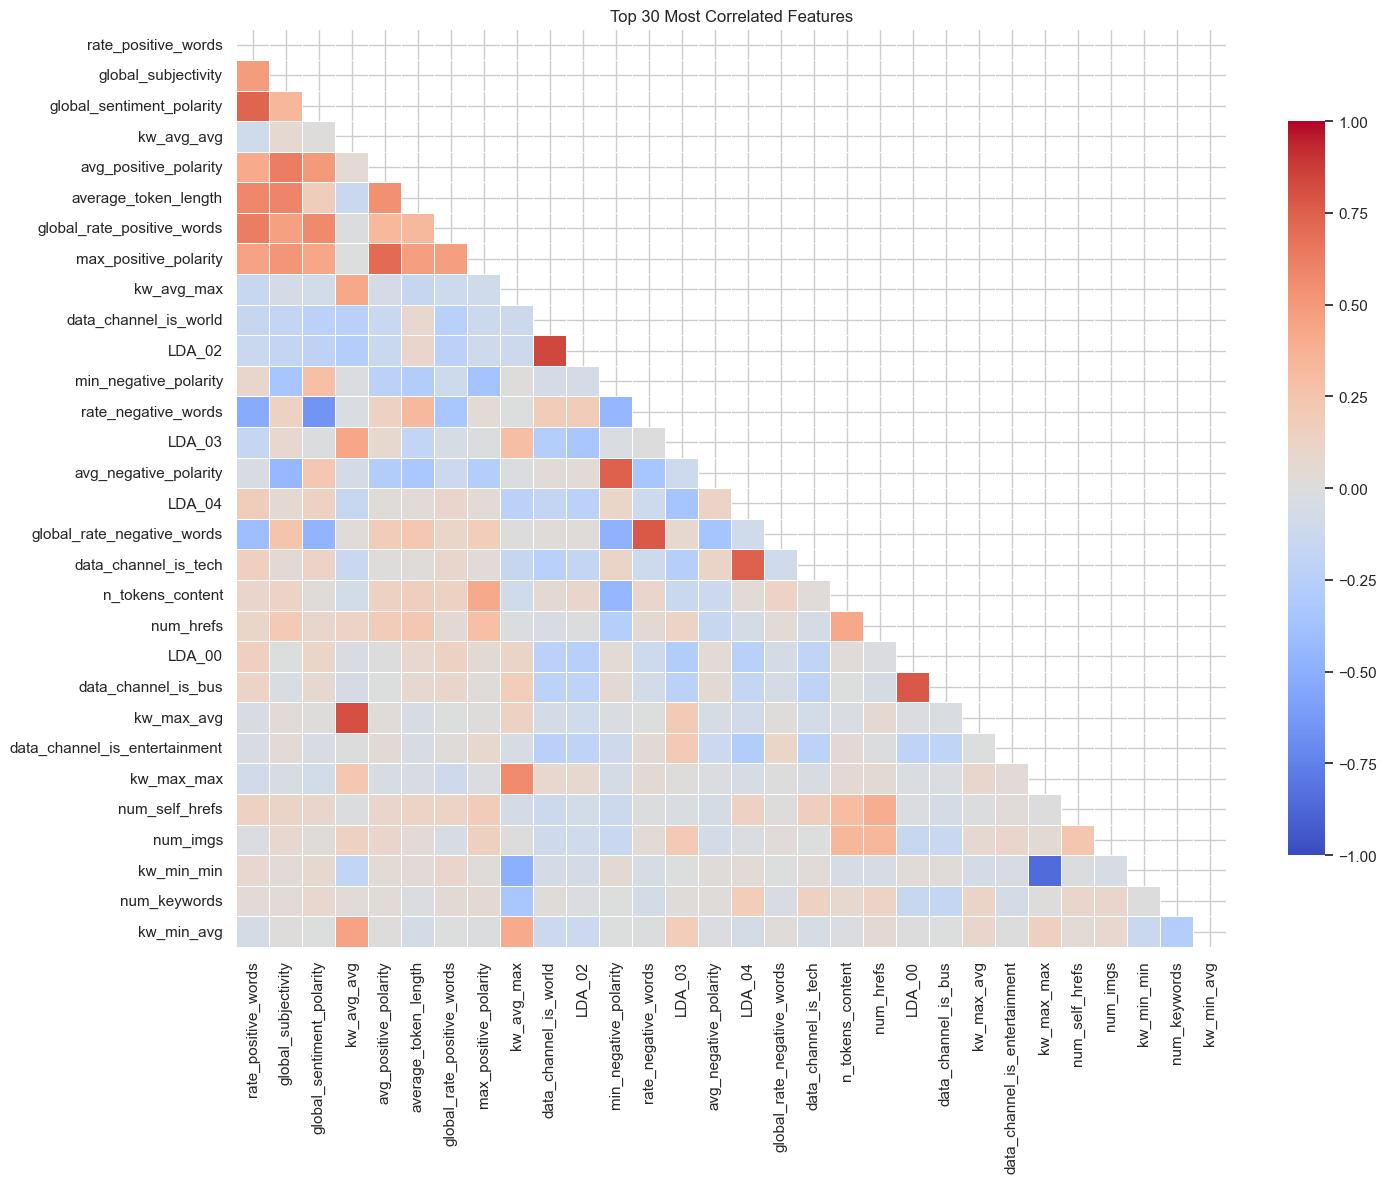


Groups of highly correlated features:
Group 1: n_unique_tokens, n_non_stop_unique_tokens, n_non_stop_words
Group 2: kw_max_min, kw_avg_min
Group 3: kw_min_min, kw_max_max
Group 4: self_reference_max_shares, self_reference_avg_sharess, self_reference_min_shares
Group 5: data_channel_is_world, LDA_02
Group 6: kw_max_avg, kw_avg_avg
Group 7: global_rate_negative_words, rate_negative_words
Group 8: data_channel_is_bus, LDA_00
Group 9: data_channel_is_tech, LDA_04
Group 10: avg_negative_polarity, min_negative_polarity
Group 11: global_sentiment_polarity, rate_positive_words
Group 12: title_subjectivity, abs_title_sentiment_polarity
Group 13: avg_positive_polarity, max_positive_polarity
Group 14: weekday_is_sunday, is_weekend


In [39]:
# Correlation Analysis
features = df_filtered.drop(['shares', 'shares_num', 'follower_num'], axis=1)
corr_matrix = features.corr()

# Set the threshold for high correlation
threshold = 0.7

# Find feature pairs with correlation greater than the threshold
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Rank the feature pairs by correlation
high_corr_pairs = sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)

# Print the feature pairs with high correlation
print(f"Found {len(high_corr_pairs)} feature pairs with correlation > {threshold}:")
for feature1, feature2, corr in high_corr_pairs[:20]:
    print(f"{feature1} & {feature2}: {corr:.4f}")

# Output correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter out highly correlated features
if len(corr_matrix) > 30:
    corr_sum = corr_matrix.abs().sum() - 1
    top_corr_features = corr_sum.sort_values(ascending=False).head(30).index
    corr_matrix_subset = corr_matrix.loc[top_corr_features, top_corr_features]
    
    plt.figure(figsize=(15, 12))
    mask = np.triu(np.ones_like(corr_matrix_subset, dtype=bool))
    sns.heatmap(corr_matrix_subset, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, 
                annot=False, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Top 30 Most Correlated Features')
else:
    plt.figure(figsize=(15, 12))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, 
                annot=False, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Full Feature Correlation Matrix')

plt.tight_layout()
plt.show()

# Find groups of highly correlated features
if len(high_corr_pairs) > 0:
    print("\nGroups of highly correlated features:")

    from collections import defaultdict
    
    # Create a graph to store feature connections
    graph = defaultdict(set)
    for f1, f2, _ in high_corr_pairs:
        graph[f1].add(f2)
        graph[f2].add(f1)
    
    visited = set()
    corr_groups = []
    
    for feature in graph:
        if feature not in visited:
            group = []
            stack = [feature]
            while stack:
                current = stack.pop()
                if current not in visited:
                    visited.add(current)
                    group.append(current)
                    stack.extend(graph[current] - visited)
            corr_groups.append(group)
    
    # Output the groups of correlated features
    for i, group in enumerate(corr_groups, 1):
        if len(group) > 1:
            print(f"Group {i}: {', '.join(group)}")

In [40]:

#----------------------------------------
# Step 2: Apply SMOTE for Class Imbalance
#----------------------------------------
print("\n" + "="*80)
print("STEP 2: Balancing Classes with SMOTE")
print("="*80)

# Apply SMOTE
print("Applying SMOTE to balance training data...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Original training class distribution:\n{pd.Series(y_train).map(label_mapping).value_counts()}")
print(f"Resampled training class distribution:\n{pd.Series(y_train_resampled).map(label_mapping).value_counts()}")

#----------------------------------------
# Function to plot confusion matrix
#----------------------------------------
def plot_confusion_matrix(y_true, y_pred, title):

    # Convert numeric labels back to original class labels for visualization
    if isinstance(y_true[0], (int, np.integer)):
        y_true_mapped = np.array([label_mapping[y] for y in y_true])
    else:
        y_true_mapped = y_true
        
    if isinstance(y_pred[0], (int, np.integer)):
        y_pred_mapped = np.array([label_mapping[y] for y in y_pred])
    else:
        y_pred_mapped = y_pred
    
    # Use consistent class order
    classes = [label_mapping[i] for i in range(len(label_mapping))]
    
    # Create confusion matrix
    cm = confusion_matrix(y_true_mapped, y_pred_mapped, labels=classes)
    
    # Create a DataFrame for better visualization
    cm_df = pd.DataFrame(cm, index=classes, columns=classes)
    
    # Calculate class-wise accuracy (diagonal elements / row sums)
    class_accuracy = np.diag(cm) / np.sum(cm, axis=1)
    class_accuracy = np.round(class_accuracy * 100, 1)
    
    # Create the plot
    plt.figure(figsize=(10, 8))
    
    # Plot the confusion matrix with actual counts
    ax = sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', linewidths=.5)
    
    # Set the title with overall accuracy
    overall_accuracy = np.trace(cm) / np.sum(cm)
    plt.title(f'{title}\nOverall Accuracy: {overall_accuracy:.4f}', fontsize=14)
    
    # Set proper labels
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    
    # Add class accuracy labels to the y-axis
    plt.yticks(np.arange(len(classes)) + 0.5, 
               [f"{cls} (Acc: {acc}%)" for cls, acc in zip(classes, class_accuracy)],
               fontsize=10, rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed metrics
    print("\nDetailed Classification Metrics:")
    
    # Calculate precision, recall, f1-score per class
    precision = np.diag(cm) / np.sum(cm, axis=0)
    recall = np.diag(cm) / np.sum(cm, axis=1)
    f1 = 2 * (precision * recall) / (precision + recall)
    
    # Handle division by zero
    precision = np.nan_to_num(precision)
    recall = np.nan_to_num(recall)
    f1 = np.nan_to_num(f1)
    
    # Create metrics DataFrame
    metrics_df = pd.DataFrame({
        'Class': classes,
        'Precision': np.round(precision * 100, 1),
        'Recall': np.round(recall * 100, 1),
        'F1-Score': np.round(f1 * 100, 1),
        'Support': np.sum(cm, axis=1)
    })
    
    # Add % symbols for better readability
    metrics_df['Precision'] = metrics_df['Precision'].apply(lambda x: f"{x}%")
    metrics_df['Recall'] = metrics_df['Recall'].apply(lambda x: f"{x}%") 
    metrics_df['F1-Score'] = metrics_df['F1-Score'].apply(lambda x: f"{x}%")
    
    print(metrics_df)
    
    return overall_accuracy



STEP 2: Balancing Classes with SMOTE
Applying SMOTE to balance training data...
Original training class distribution:
High    16923
Low     14792
Name: count, dtype: int64
Resampled training class distribution:
Low     16923
High    16923
Name: count, dtype: int64



STEP 3: Model Building and Evaluation

Evaluating Logistic Regression...
Model: Logistic Regression
CV Accuracy: 0.6547 ± 0.0153
Test Accuracy: 0.6641
Test F1 Score: 0.6634


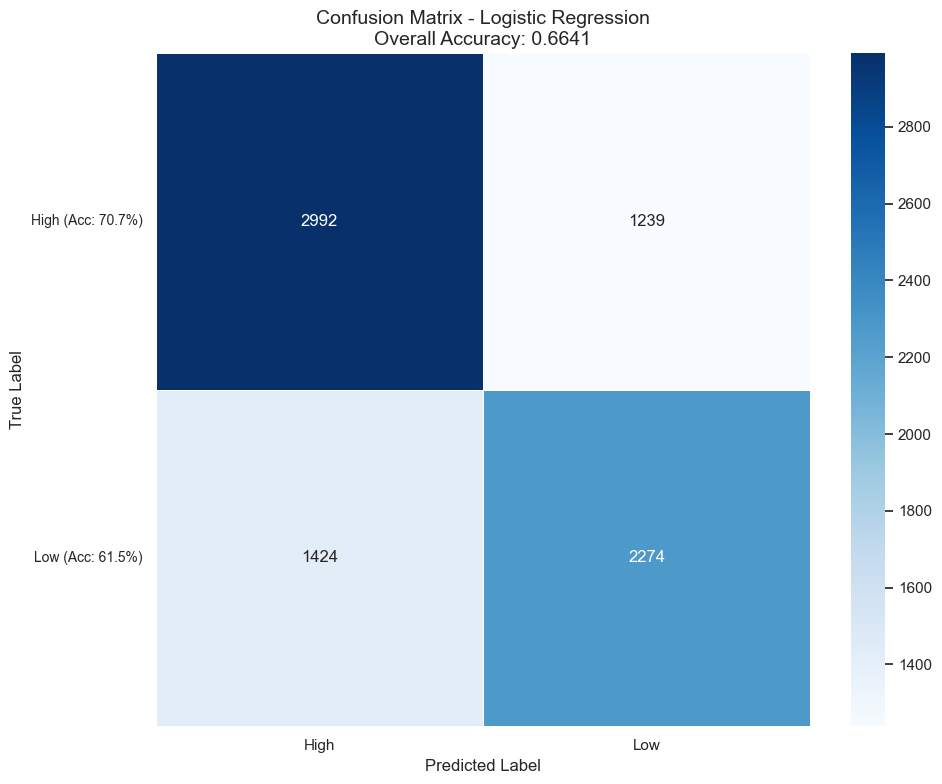


Detailed Classification Metrics:
  Class Precision Recall F1-Score  Support
0  High     67.8%  70.7%    69.2%     4231
1   Low     64.7%  61.5%    63.1%     3698

Evaluating Random Forest...
Model: Random Forest
CV Accuracy: 0.6730 ± 0.0164
Test Accuracy: 0.6713
Test F1 Score: 0.6709


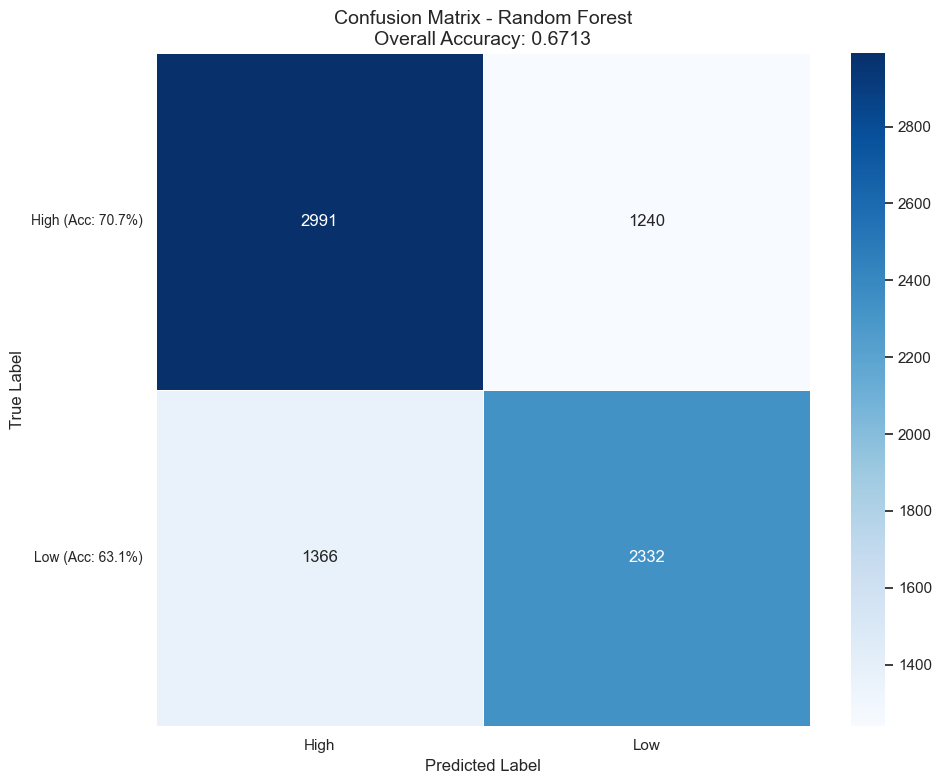


Detailed Classification Metrics:
  Class Precision Recall F1-Score  Support
0  High     68.6%  70.7%    69.7%     4231
1   Low     65.3%  63.1%    64.2%     3698

Evaluating Gradient Boosting...
Model: Gradient Boosting
CV Accuracy: 0.6712 ± 0.0145
Test Accuracy: 0.6702
Test F1 Score: 0.6703


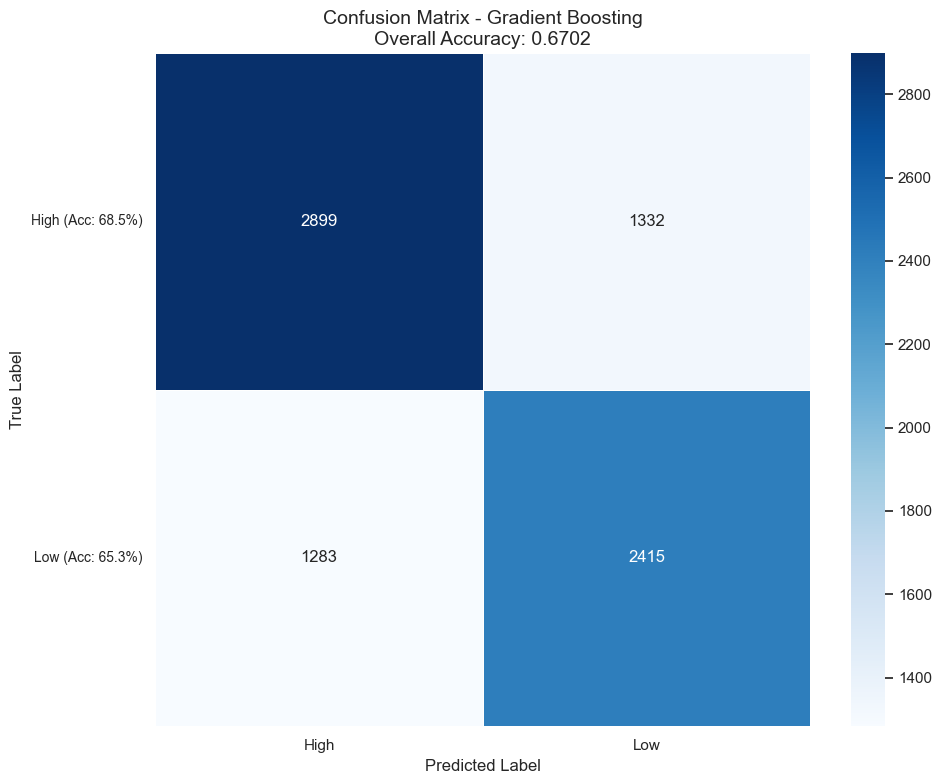


Detailed Classification Metrics:
  Class Precision Recall F1-Score  Support
0  High     69.3%  68.5%    68.9%     4231
1   Low     64.5%  65.3%    64.9%     3698

Evaluating XGBoost...
Model: XGBoost
CV Accuracy: 0.6638 ± 0.0188
Test Accuracy: 0.6612
Test F1 Score: 0.6611


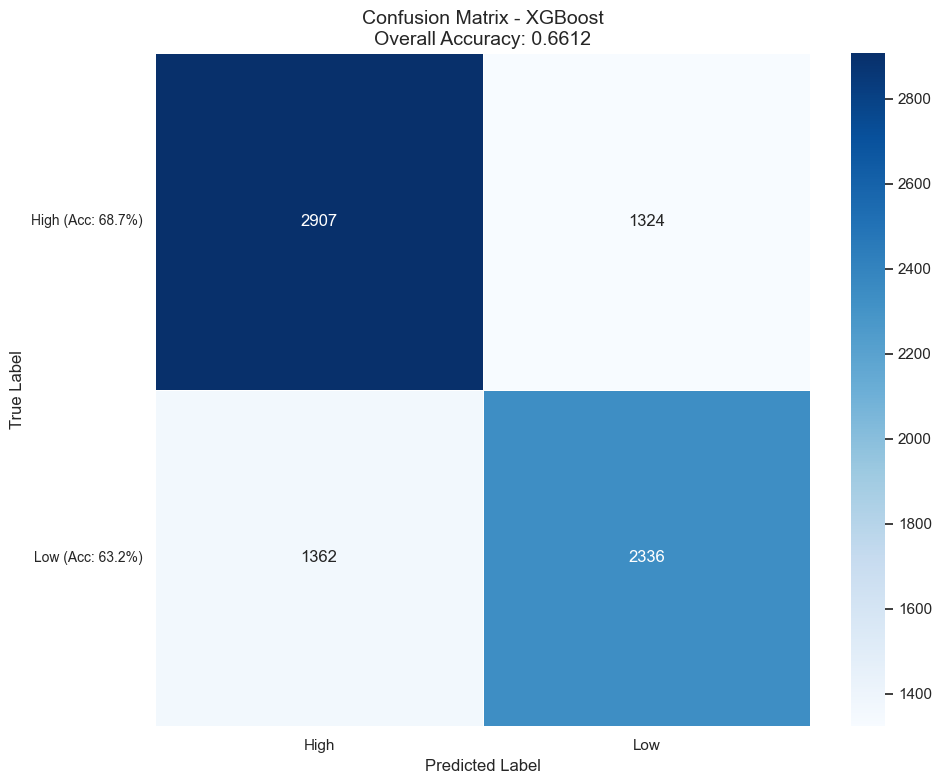


Detailed Classification Metrics:
  Class Precision Recall F1-Score  Support
0  High     68.1%  68.7%    68.4%     4231
1   Low     63.8%  63.2%    63.5%     3698

Evaluating LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9529
[LightGBM] [Info] Number of data points in the train set: 33846, number of used features: 66
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -0.693147
Model: LightGBM
CV Accuracy: 0.6763 ± 0.0154
Test Accuracy: 0.6739
Test F1 Score: 0.6735


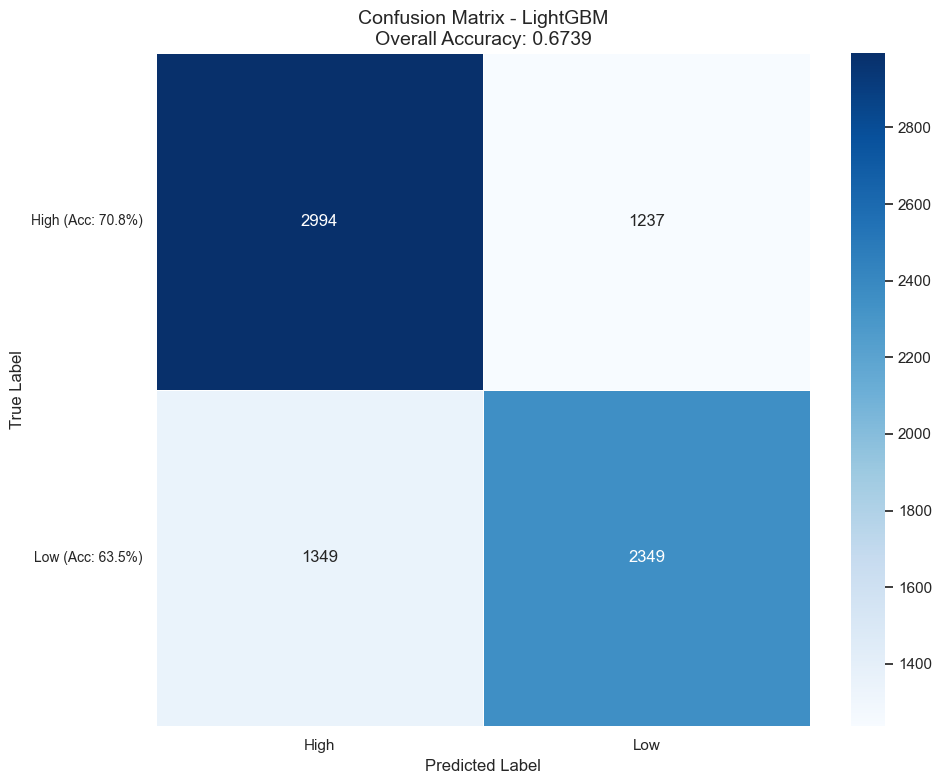


Detailed Classification Metrics:
  Class Precision Recall F1-Score  Support
0  High     68.9%  70.8%    69.8%     4231
1   Low     65.5%  63.5%    64.5%     3698

Evaluating Neural Network...
Model: Neural Network
CV Accuracy: 0.6073 ± 0.0042
Test Accuracy: 0.6145
Test F1 Score: 0.6146


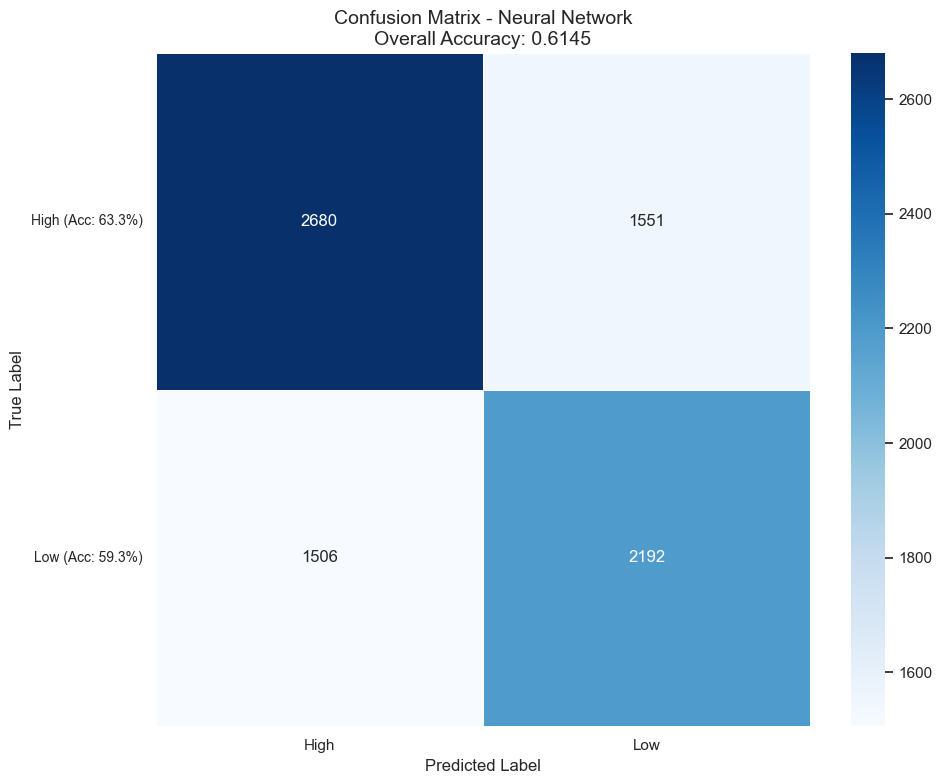


Detailed Classification Metrics:
  Class Precision Recall F1-Score  Support
0  High     64.0%  63.3%    63.7%     4231
1   Low     58.6%  59.3%    58.9%     3698

Best model: LightGBM


In [41]:
#----------------------------------------
# Step 3: Model Building and Evaluation
#----------------------------------------
print("\n" + "="*80)
print("STEP 3: Model Building and Evaluation")
print("="*80)

# Define models to try
# to tree-based models, make sure the number of target classes is correct
n_classes = len(np.unique(y_train))

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(
        objective='multi:softmax', 
        num_class=n_classes,
        random_state=42, 
        n_jobs=-1
    ),
    'LightGBM': lgb.LGBMClassifier(
        objective='multiclass',
        num_class=n_classes,
        random_state=42, 
        n_jobs=-1
    ),
    'Neural Network': MLPClassifier(random_state=42, max_iter=500)
}

# Function to evaluate a single model
def evaluate_model(model, name, X_train, y_train, X_test, y_test, cv=5):
    """Evaluate a single model"""
    # Create a pipeline with scaling
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, 
                               cv=cv, scoring='accuracy', n_jobs=-1)
    
    # Train the model on the entire training set and evaluate on test set
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print evaluation results
    print(f"Model: {name}")
    print(f"CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test F1 Score: {f1:.4f}")
    
    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, title=f'Confusion Matrix - {name}')
    
    return {
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'test_accuracy': accuracy,
        'test_f1': f1,
        'model': pipeline,
        'predictions': y_pred
    }

# Store results
results = {}

# Evaluate each model
for name, model in models.items():
    print(f"\n{'='*50}\nEvaluating {name}...")
    results[name] = evaluate_model(model, name, X_train_resampled, y_train_resampled, X_test, y_test)

# Determine the best model
best_model_name = max(results, key=lambda x: results[x]['test_accuracy'])
best_model = results[best_model_name]['model']
print(f"\n{'='*50}\nBest model: {best_model_name}")


STEP 4: Stacking with Specified Top 3 Models
Using specified top 3 models: LightGBM, XGBoost, Logistic Regression

Using Gradient Boosting as meta-learner
Creating stacking ensemble with specified models...
Training stacking ensemble...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9466
[LightGBM] [Info] Number of data points in the train set: 33846, number of used features: 66
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9489
[LightGBM

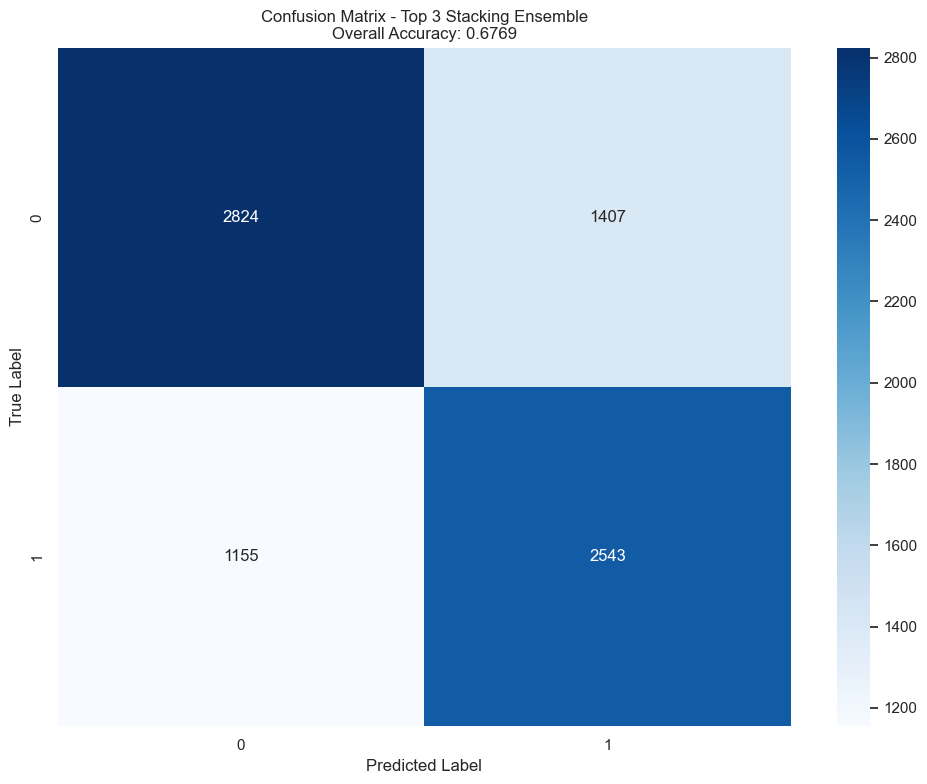


Model Performance Comparison:
                 Model  Test Accuracy  Test F1 Score
0       Top 3 Stacking       0.676882       0.677247
1             LightGBM       0.673855       0.673478
2        Random Forest       0.671333       0.670896
3    Gradient Boosting       0.670198       0.670323
4  Logistic Regression       0.664144       0.663429
5              XGBoost       0.661244       0.661126
6       Neural Network       0.614453       0.614588


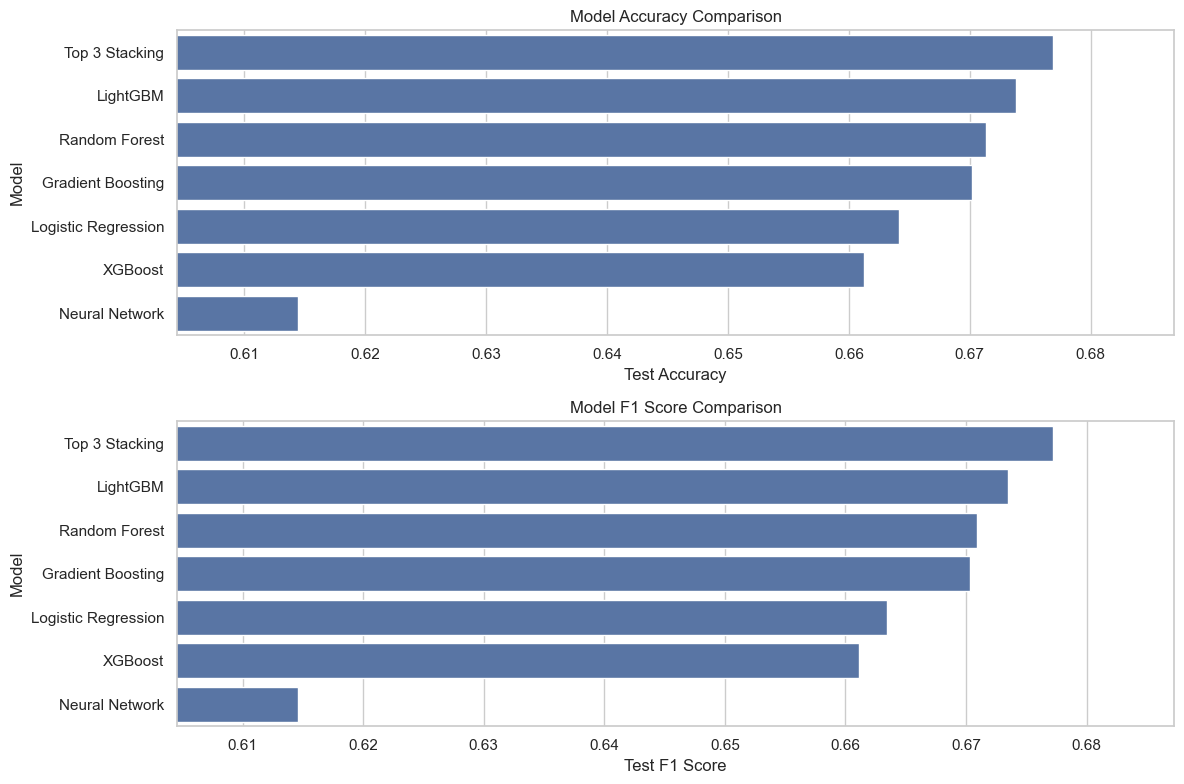


Best model: Top 3 Stacking

Class-specific accuracies for Top 3 Stacking model:
Class 0: 0.6675
Class 1: 0.6877

Confusion Matrix (percentage):
      0     1
0  66.7  33.3
1  31.2  68.8


In [42]:
#----------------------------------------
# Step 4: Stacking with Specified Top 3 Models
#----------------------------------------
print("\n" + "="*80)
print("STEP 4: Stacking with Specified Top 3 Models")
print("="*80)

# Import required libraries if not already imported
import numpy as np
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Specify the exact 3 models to use
top3_model_names = ['LightGBM', 'XGBoost', 'Logistic Regression']
print(f"Using specified top 3 models: {', '.join(top3_model_names)}")

# Extract only these 3 trained models from results
top3_trained_models = []
for name in top3_model_names:
    # Get the actual model from the pipeline
    model = results[name]['model'][-1]  # Extract the model from the pipeline
    top3_trained_models.append((name.lower().replace(' ', '_'), model))

# Use Gradient Boosting as meta-learner (different from base models)
print("\nUsing Gradient Boosting as meta-learner")
meta_learner = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Create stacking classifier using the specified 3 models
print("Creating stacking ensemble with specified models...")
stacking_classifier = StackingClassifier(
    estimators=top3_trained_models,
    final_estimator=meta_learner,
    cv=5,
    stack_method='predict_proba',
    n_jobs=1,  # Use single job to avoid memory issues
    verbose=1,
    passthrough=False  # Don't include original features
)

# Train stacking model with the specified models
print("Training stacking ensemble...")
stacking_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on test set
print("Evaluating stacking ensemble on test set...")
y_pred_stacking = stacking_classifier.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_stacking)
f1 = f1_score(y_test, y_pred_stacking, average='weighted')

# Print evaluation results
print("\nStacking Ensemble Evaluation Results:")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1 Score: {f1:.4f}")

# Print detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_stacking))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_stacking)
classes = np.unique(y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - Top 3 Stacking Ensemble\nOverall Accuracy: {accuracy:.4f}')
plt.tight_layout()
plt.show()

# Add stacking results to overall results
results['Top 3 Stacking'] = {
    'cv_mean': 0,  # We're not performing separate CV here
    'cv_std': 0,
    'test_accuracy': accuracy,
    'test_f1': f1,
    'model': stacking_classifier,
    'predictions': y_pred_stacking
}

# Compare all models including stacking
print("\nModel Performance Comparison:")
models_comparison = []
for name, result in results.items():
    models_comparison.append({
        'Model': name,
        'Test Accuracy': result['test_accuracy'],
        'Test F1 Score': result['test_f1']
    })

comparison_df = pd.DataFrame(models_comparison)
comparison_df = comparison_df.sort_values('Test Accuracy', ascending=False).reset_index(drop=True)
print(comparison_df)

# Plot model comparison
plt.figure(figsize=(12, 8))

# Plot accuracy
plt.subplot(2, 1, 1)
sns.barplot(x='Test Accuracy', y='Model', data=comparison_df)
plt.title('Model Accuracy Comparison')
plt.xlim(min(comparison_df['Test Accuracy']) - 0.01, max(comparison_df['Test Accuracy']) + 0.01)

# Plot F1 score
plt.subplot(2, 1, 2)
sns.barplot(x='Test F1 Score', y='Model', data=comparison_df)
plt.title('Model F1 Score Comparison')
plt.xlim(min(comparison_df['Test F1 Score']) - 0.01, max(comparison_df['Test F1 Score']) + 0.01)

plt.tight_layout()
plt.show()

# Update best model information
best_model_name = max(results, key=lambda x: results[x]['test_accuracy'])
best_model = results[best_model_name]['model']
print(f"\nBest model: {best_model_name}")

# Calculate and display class-specific accuracies
print("\nClass-specific accuracies for Top 3 Stacking model:")
class_labels = np.unique(y_test)
for label in class_labels:
    # Get indices where true label is the current class
    class_indices = np.where(y_test == label)[0]
    
    # Calculate accuracy for this class
    class_accuracy = accuracy_score(
        y_test[class_indices], 
        y_pred_stacking[class_indices]
    )
    
    # Print class-specific accuracy
    print(f"Class {label}: {class_accuracy:.4f}")

# Print confusion matrix as percentages
print("\nConfusion Matrix (percentage):")
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
cm_df = pd.DataFrame(cm_percentage.round(1), index=classes, columns=classes)
print(cm_df)

In [43]:
#----------------------------------------
# Step 5: Feature Importance Analysis
#----------------------------------------
print("\n" + "="*80)
print("STEP 5: Feature Importance Analysis")
print("="*80)

# Check if the best model supports feature importances
if best_model_name in ['Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM']:
    print(f"Extracting feature importance from {best_model_name}...")
    
    # Extract feature importances
    if best_model_name == 'XGBoost':
        feature_importances = best_model.named_steps['model'].feature_importances_
    elif best_model_name == 'LightGBM':
        feature_importances = best_model.named_steps['model'].feature_importances_
    else:
        feature_importances = best_model.named_steps['model'].feature_importances_
    
    feature_names = X_train.columns
    
    # Create DataFrame for visualization
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values('Importance', ascending=False)
    
    # Plot top 20 features
    plt.figure(figsize=(12, 10))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
    plt.title(f'Top 20 Feature Importance - {best_model_name}', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    print("\nTop 20 important features:")
    print(importance_df.head(20))
elif best_model_name == 'Neural Network':
    print("Feature importance analysis not available for Neural Network models.")
elif best_model_name == 'Logistic Regression':
    # Extract coefficients from Logistic Regression
    print("Extracting coefficients from Logistic Regression...")
    
    # Get coefficients from the model
    coefficients = np.abs(best_model.named_steps['model'].coef_).mean(axis=0)
    feature_names = X_train.columns
    
    # Create DataFrame for visualization
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': coefficients
    }).sort_values('Importance', ascending=False)
    
    # Plot top 20 features
    plt.figure(figsize=(12, 10))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
    plt.title(f'Top 20 Feature Coefficients - {best_model_name}', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    print("\nTop 20 features by coefficient magnitude:")
    print(importance_df.head(20))


STEP 5: Feature Importance Analysis



STEP 7: Model Comparison

Model Comparison:
                 Model  CV Accuracy  Test Accuracy  Test F1 Score
6       Top 3 Stacking     0.000000       0.676882       0.677247
4             LightGBM     0.676299       0.673855       0.673478
1        Random Forest     0.672960       0.671333       0.670896
2    Gradient Boosting     0.671187       0.670198       0.670323
0  Logistic Regression     0.654731       0.664144       0.663429
3              XGBoost     0.663831       0.661244       0.661126
5       Neural Network     0.607251       0.614453       0.614588


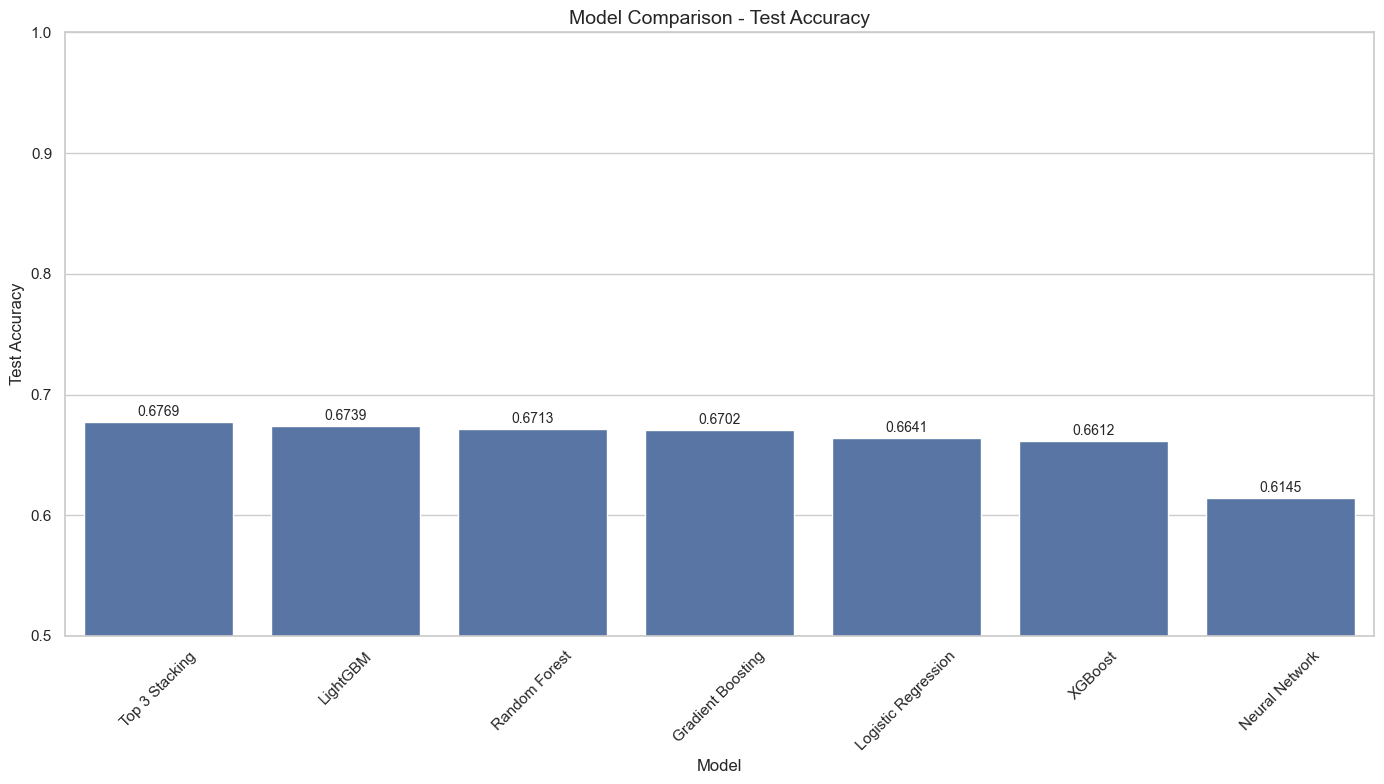

In [44]:
#----------------------------------------
# Step 7: Model Comparison
#----------------------------------------
print("\n" + "="*80)
print("STEP 7: Model Comparison")
print("="*80)

# Create DataFrame to compare models
model_comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'CV Accuracy': [results[model]['cv_mean'] for model in results],
    'Test Accuracy': [results[model]['test_accuracy'] for model in results],
    'Test F1 Score': [results[model]['test_f1'] for model in results]
})

model_comparison = model_comparison.sort_values('Test Accuracy', ascending=False)
print("\nModel Comparison:")
print(model_comparison)

# Plot test accuracy comparison
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Model', y='Test Accuracy', data=model_comparison)

# Add the accuracy scores on top of the bars
for i, bar in enumerate(ax.patches):
    ax.text(
        bar.get_x() + bar.get_width()/2.,
        bar.get_height() + 0.005,
        f"{bar.get_height():.4f}",
        ha='center',
        fontsize=10
    )

plt.title('Model Comparison - Test Accuracy', fontsize=14)
plt.ylim(0.5, 1.0)  # Set y-axis limits for better comparison
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
#----------------------------------------
# Summary
#----------------------------------------
print("\n" + "="*80)
print("Analysis Complete!")
print("="*80)

print(f"Best model: {model_comparison.iloc[0]['Model']}")
print(f"Test accuracy: {model_comparison.iloc[0]['Test Accuracy']:.4f}")
print(f"Test F1 score: {model_comparison.iloc[0]['Test F1 Score']:.4f}")

# Check if the best model is a tuned model
if model_comparison.iloc[0]['Model'].startswith('Tuned'):
    base_model_name = model_comparison.iloc[0]['Model'].replace('Tuned ', '')
    print(f"\nOptimal hyperparameters for {base_model_name}:")
    best_params = {k.replace('model__', ''): v for k, v in grid_search.best_params_.items()}
    for param, value in best_params.items():
        print(f"  {param}: {value}")


Analysis Complete!
Best model: Top 3 Stacking
Test accuracy: 0.6769
Test F1 score: 0.6772


The model comparison results show that among these machine learning models tested, LightGBM achieved the highest test accuracy of 52.40% and an F1 score of 48.49%. Although LightGBM outperformed the other models, the overall accuracy is relatively low. We considered that this low performance can be caused by some factors. First, the dataset may still contain noisy or imbalanced data. Secondly, the feature selection process may not have fully captured the underlying patterns that drive engagement. This results in less than ideal predictive power. The low performance of all models may also be because the relationship between features and article sharing is not easily captured by traditional machine learning models. To improve performance, we will proceed with optimized hyperparameter tuning to refine the model parameters to enhance predictive accuracy. We also want to address potential data-related issues such as class imbalance and feature importance.

### **Optimized Hyperparameter Tuning**


STEP 8: Memory-Optimized Hyperparameter Tuning
Performing hyperparameter tuning for Top 3 Stacking...
Dataset is large (33846 samples). Using a random subset of 10,000 samples for tuning.
Running randomized search with 20 iterations and 3 folds...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[LightGBM] [Warning] Unknown parameter: activation
[LightGBM] [Warning] Unknown parameter: learning_rate_init
[LightGBM] [Warning] Unknown parameter: hidden_layer_sizes
[LightGBM] [Warning] Unknown parameter: activation
[LightGBM] [Warning] Unknown parameter: learning_rate_init
[LightGBM] [Warning] Unknown parameter: hidden_layer_sizes
[LightGBM] [Info] Number of positive: 3298, number of negative: 3368
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9295
[LightGBM] [Info] Number of data points in the train set: 6666, number of used features

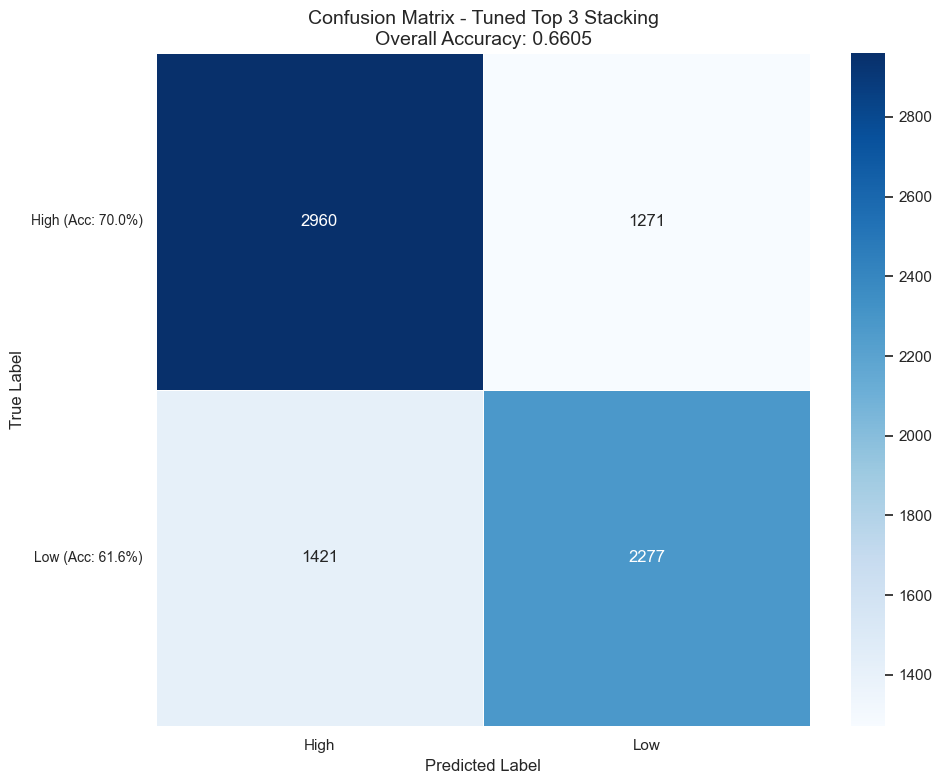


Detailed Classification Metrics:
  Class Precision Recall F1-Score  Support
0  High     67.6%  70.0%    68.7%     4231
1   Low     64.2%  61.6%    62.8%     3698


In [46]:
#----------------------------------------
# Step 8: Optimized Hyperparameter Tuning
#----------------------------------------
print("\n" + "="*80)
print("STEP 8: Memory-Optimized Hyperparameter Tuning")
print("="*80)

print(f"Performing hyperparameter tuning for {best_model_name}...")

# Define a smaller parameter grid based on best model
if best_model_name == 'Logistic Regression':
    param_grid = {
        'model__C': [0.1, 1, 10],
        'model__solver': ['liblinear', 'saga'],
        'model__class_weight': [None, 'balanced']
    }
elif best_model_name == 'Random Forest':
    param_grid = {
        'model__n_estimators': [100, 200],
        'model__max_depth': [10, 20],
        'model__min_samples_split': [2, 5],
        'model__class_weight': [None, 'balanced']
    }
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    }
elif best_model_name == 'XGBoost':
    param_grid = {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0]
    }
elif best_model_name == 'LightGBM':
    param_grid = {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [5, -1],  # -1 means no limit
        'model__num_leaves': [31, 63],
        'model__subsample': [0.8, 1.0]
    }
else:  # Neural Network
    param_grid = {
        'model__hidden_layer_sizes': [(50,), (100,)],
        'model__activation': ['relu', 'tanh'],
        'model__alpha': [0.0001, 0.01],
        'model__learning_rate_init': [0.001, 0.01]
    }

# Get model class
from sklearn.ensemble import StackingClassifier
if isinstance(best_model, StackingClassifier):
    # If best_model is a StackingClassifier, access the base estimators directly.
    # We assume the first estimator is the one we want to tune.  Adjust if needed.
    model_class = type(best_model.estimators_[0])
else:
    # Assume best_model is a Pipeline or has named_steps
    model_class = type(best_model.named_steps['model'])

# Create pipeline for grid search
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', model_class())
])

# Memory optimization: Use a smaller subset of data for tuning if dataset is large
X_sample, y_sample = X_train_resampled, y_train_resampled

# If dataset is too large, use a random sample
if len(X_train_resampled) > 10000:
    print(f"Dataset is large ({len(X_train_resampled)} samples). Using a random subset of 10,000 samples for tuning.")
    sample_indices = np.random.choice(len(X_train_resampled), size=10000, replace=False)
    X_sample = X_train_resampled.iloc[sample_indices] if hasattr(X_train_resampled, 'iloc') else X_train_resampled[sample_indices]
    y_sample = y_train_resampled[sample_indices]

# Set up randomized search instead of grid search (more memory efficient)
from sklearn.model_selection import RandomizedSearchCV

# Use fewer iterations and only 3 folds for memory efficiency
search = RandomizedSearchCV(
    pipeline, param_grid, 
    n_iter=20,  # Try only 20 random combinations instead of all
    cv=3,  # Use 3 folds instead of 5
    scoring='accuracy', 
    n_jobs=1,  # Use single job to avoid memory multiplication
    verbose=1,
    random_state=42
)

print(f"Running randomized search with 20 iterations and 3 folds...")
search.fit(X_sample, y_sample)

# Print best parameters and score
print(f"\nBest parameters: {search.best_params_}")
print(f"Best cross-validation accuracy: {search.best_score_:.4f}")

# Evaluate tuned model on test set
tuned_y_pred = search.predict(X_test)
tuned_accuracy = accuracy_score(y_test, tuned_y_pred)
tuned_f1 = f1_score(y_test, tuned_y_pred, average='weighted')

print(f"Tuned model test accuracy: {tuned_accuracy:.4f}")
print(f"Tuned model test F1 score: {tuned_f1:.4f}")

# Plot confusion matrix for tuned model
plot_confusion_matrix(y_test, tuned_y_pred, title=f'Confusion Matrix - Tuned {best_model_name}')

# Add tuned model to results
results[f'Tuned {best_model_name}'] = {
    'cv_mean': search.best_score_,
    'cv_std': 0,  # Not available from RandomizedSearchCV
    'test_accuracy': tuned_accuracy,
    'test_f1': tuned_f1,
    'model': search.best_estimator_,
    'predictions': tuned_y_pred
}


STEP 9: Model Comparison

Model Comparison:
                  Model  CV Accuracy  Test Accuracy  Test F1 Score
6        Top 3 Stacking     0.000000       0.676882       0.677247
4              LightGBM     0.676299       0.673855       0.673478
1         Random Forest     0.672960       0.671333       0.670896
2     Gradient Boosting     0.671187       0.670198       0.670323
0   Logistic Regression     0.654731       0.664144       0.663429
3               XGBoost     0.663831       0.661244       0.661126
7  Tuned Top 3 Stacking     0.678401       0.660487       0.659929
5        Neural Network     0.607251       0.614453       0.614588


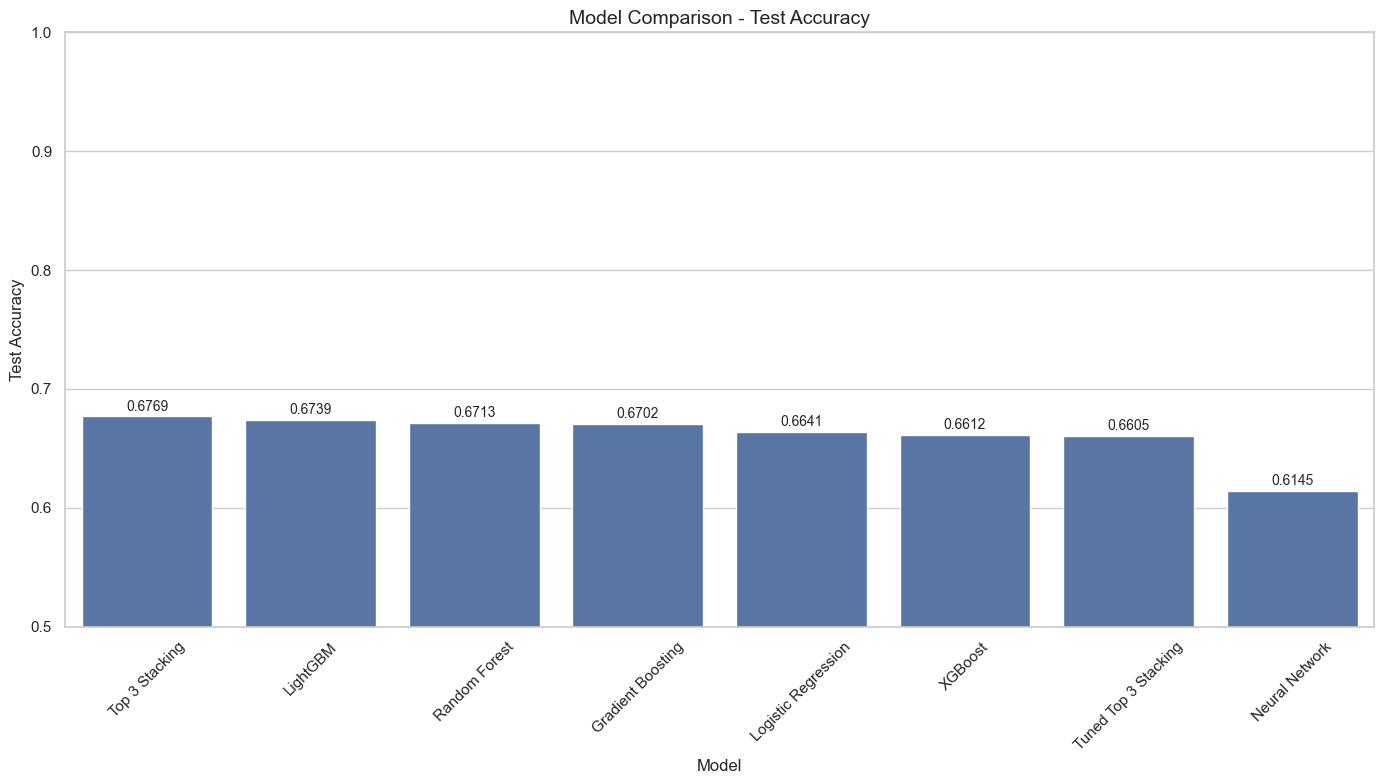

In [47]:
#----------------------------------------
# Step 9: Model Comparison
#----------------------------------------
print("\n" + "="*80)
print("STEP 9: Model Comparison")
print("="*80)

# Create DataFrame to compare models
model_comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'CV Accuracy': [results[model]['cv_mean'] for model in results],
    'Test Accuracy': [results[model]['test_accuracy'] for model in results],
    'Test F1 Score': [results[model]['test_f1'] for model in results]
})

model_comparison = model_comparison.sort_values('Test Accuracy', ascending=False)
print("\nModel Comparison:")
print(model_comparison)

# Plot test accuracy comparison
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Model', y='Test Accuracy', data=model_comparison)

# Add the accuracy scores on top of the bars
for i, bar in enumerate(ax.patches):
    ax.text(
        bar.get_x() + bar.get_width()/2.,
        bar.get_height() + 0.005,
        f"{bar.get_height():.4f}",
        ha='center',
        fontsize=10
    )

plt.title('Model Comparison - Test Accuracy', fontsize=14)
plt.ylim(0.5, 1.0)  # Set y-axis limits for better comparison
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
#----------------------------------------
# Summary
#----------------------------------------
print("\n" + "="*80)
print("Analysis Complete!")
print("="*80)

print(f"Best model: {model_comparison.iloc[0]['Model']}")
print(f"Test accuracy: {model_comparison.iloc[0]['Test Accuracy']:.4f}")
print(f"Test F1 score: {model_comparison.iloc[0]['Test F1 Score']:.4f}")

# Check if the best model is a tuned model
if model_comparison.iloc[0]['Model'].startswith('Tuned'):
    base_model_name = model_comparison.iloc[0]['Model'].replace('Tuned ', '')
    print(f"\nOptimal hyperparameters for {base_model_name}:")
    best_params = {k.replace('model__', ''): v for k, v in grid_search.best_params_.items()}
    for param, value in best_params.items():
        print(f"  {param}: {value}")


Analysis Complete!
Best model: Top 3 Stacking
Test accuracy: 0.6769
Test F1 score: 0.6772


After doing the optimized hyperparameter tuning, we found that it did not improve the model’s performance, which the test accuracy and F1 scores remain around 0.52 and 0.48. This suggests that the model's limitations may not be due to suboptimal hyperparameters. Additionally, since the dataset has been resampled using SMOTE to balance class distributions, there could be synthetic data points that do not generalize well to real-world scenarios. To further enhance model performance, we will try advanced hyperparameter tuning for Random Forest and XGBoost.

### **Advanced Hyperparameter Tuning for Random Forest and XGBoost**


Executing efficient two-stage Random Forest tuning...

Stage 1: Coarse-grained parameter search
Using 5000 samples for initial search
Executing stage 1 search...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Stage 1 best parameters: {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15, 'class_weight': None, 'bootstrap': True}
Stage 1 best CV accuracy: 0.6644

Stage 2: Fine-grained parameter optimization
Using 10000 samples for fine-grained optimization
Executing stage 2 search...
Parameter grid for stage 2: {'n_estimators': [150, 200, 250, 300], 'max_depth': [13, 15, 17, None], 'min_samples_split': [17, 20, 23], 'min_samples_leaf': [1, 2, 3], 'max_features': ['log2', 0.3, 0.4], 'bootstrap': [True], 'class_weight': [None, 'balanced']}
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Final best parameters: {'n_estimators': 300, 'min_samples_split': 23, 'min_samples_leaf': 2, 'max_features': 'log2', 'ma

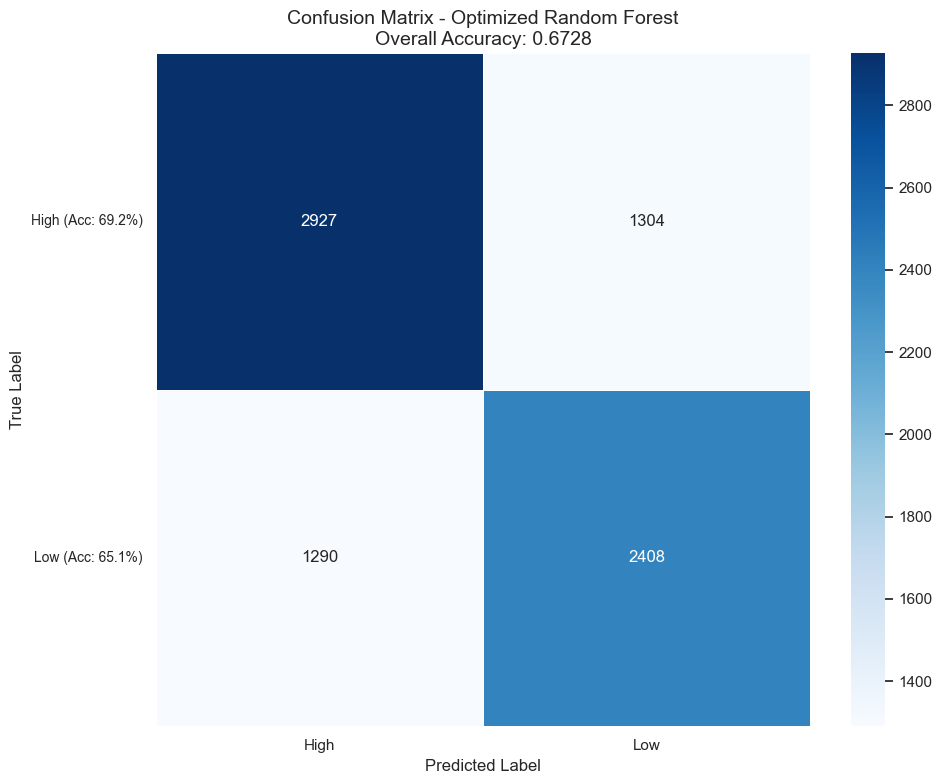


Detailed Classification Metrics:
  Class Precision Recall F1-Score  Support
0  High     69.4%  69.2%    69.3%     4231
1   Low     64.9%  65.1%    65.0%     3698

Calculating feature importance...

Top 15 most important features:
                       Feature  Importance
25                  kw_avg_avg    0.066737
24                  kw_max_avg    0.050999
26   self_reference_min_shares    0.044647
28  self_reference_avg_sharess    0.040875
39                      LDA_02    0.036888
23                  kw_min_avg    0.030697
36                  is_weekend    0.029652
27   self_reference_max_shares    0.029479
38                      LDA_01    0.029222
41                      LDA_04    0.026655
19                  kw_avg_min    0.025730
37                      LDA_00    0.025360
22                  kw_avg_max    0.023400
2              n_unique_tokens    0.022871
42         global_subjectivity    0.021596


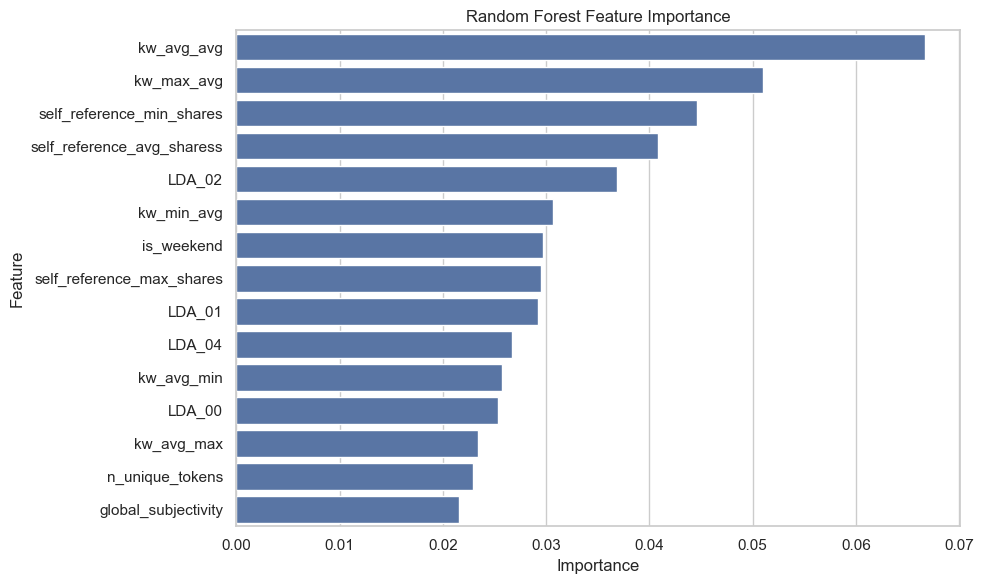

In [49]:
#--------------------
# Efficient Random Forest Tuning - Two-Stage Optimization Method
#--------------------
print("\n" + "="*50)
print("Executing efficient two-stage Random Forest tuning...")

# Stage 1: Use coarse-grained search to determine general direction
print("\nStage 1: Coarse-grained parameter search")

# Create Random Forest model - use model directly rather than pipeline for efficiency
rf_model = RandomForestClassifier(
    random_state=42,
    n_jobs=-1  # Use parallel processing to speed up search
)

# Define focused parameter grid to reduce number of combinations
param_grid_1 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 4, 8],
    'max_features': ['sqrt', 'log2', 0.5],
    'bootstrap': [True],
    'class_weight': [None]
}

# Use a smaller sample to speed up initial search
sample_size = min(5000, len(X_train_resampled))
print(f"Using {sample_size} samples for initial search")
sample_indices = np.random.choice(len(X_train_resampled), size=sample_size, replace=False)
X_small_sample = X_train_resampled.iloc[sample_indices] if hasattr(X_train_resampled, 'iloc') else X_train_resampled[sample_indices]
y_small_sample = y_train_resampled[sample_indices]

# Standardize data (doing it once outside the pipeline is sufficient)
scaler = StandardScaler()
X_small_sample_scaled = scaler.fit_transform(X_small_sample)

# Stage 1 search - fewer iterations and faster CV
search_1 = RandomizedSearchCV(
    rf_model,
    param_distributions=param_grid_1,
    n_iter=10,  # Reduce number of iterations
    cv=3,       # Reduce number of CV folds
    scoring='accuracy',
    n_jobs=-1,  # Parallel processing
    verbose=1,
    random_state=42
)

print("Executing stage 1 search...")
search_1.fit(X_small_sample_scaled, y_small_sample)

# Get best parameters from stage 1
best_params_1 = search_1.best_params_
print(f"\nStage 1 best parameters: {best_params_1}")
print(f"Stage 1 best CV accuracy: {search_1.best_score_:.4f}")

# Stage 2: Fine-grained search around the best parameters
print("\nStage 2: Fine-grained parameter optimization")

# Create more focused parameter ranges based on stage 1 results
# For numerical parameters, create narrower ranges around best values
param_grid_2 = {}

# Handle n_estimators - add values around the best one
if 'n_estimators' in best_params_1:
    best_n_estimators = best_params_1['n_estimators']
    param_grid_2['n_estimators'] = [
        max(best_n_estimators - 50, 50),
        best_n_estimators,
        best_n_estimators + 50,
        best_n_estimators + 100
    ]

# Handle max_depth - special case for None value
if 'max_depth' in best_params_1:
    if best_params_1['max_depth'] is None:
        param_grid_2['max_depth'] = [15, 20, None]
    else:
        best_max_depth = best_params_1['max_depth']
        param_grid_2['max_depth'] = [
            max(best_max_depth - 2, 3),
            best_max_depth,
            best_max_depth + 2,
            None
        ]

# Handle min_samples_split
if 'min_samples_split' in best_params_1:
    best_min_samples_split = best_params_1['min_samples_split']
    param_grid_2['min_samples_split'] = [
        max(best_min_samples_split - 3, 2),
        best_min_samples_split,
        best_min_samples_split + 3
    ]

# Handle min_samples_leaf
if 'min_samples_leaf' in best_params_1:
    best_min_samples_leaf = best_params_1['min_samples_leaf']
    param_grid_2['min_samples_leaf'] = [
        max(best_min_samples_leaf - 1, 1),
        best_min_samples_leaf,
        best_min_samples_leaf + 1
    ]

# Handle max_features - special case for string values
if 'max_features' in best_params_1:
    if best_params_1['max_features'] == 'sqrt':
        param_grid_2['max_features'] = ['sqrt', 0.4, 0.5]
    elif best_params_1['max_features'] == 'log2':
        param_grid_2['max_features'] = ['log2', 0.3, 0.4]
    elif isinstance(best_params_1['max_features'], float):
        best_max_features = best_params_1['max_features']
        param_grid_2['max_features'] = [
            max(best_max_features - 0.1, 0.1),
            best_max_features,
            min(best_max_features + 0.1, 0.9)
        ]

# Handle bootstrap
param_grid_2['bootstrap'] = [best_params_1.get('bootstrap', True)]

# Handle class_weight
param_grid_2['class_weight'] = [best_params_1.get('class_weight', None)]
if best_params_1.get('class_weight') == 'balanced':
    param_grid_2['class_weight'] = ['balanced', 'balanced_subsample']
elif best_params_1.get('class_weight') is None:
    param_grid_2['class_weight'] = [None, 'balanced']

# Use medium-sized sample for stage 2 optimization
sample_size_2 = min(10000, len(X_train_resampled))
print(f"Using {sample_size_2} samples for fine-grained optimization")
sample_indices_2 = np.random.choice(len(X_train_resampled), size=sample_size_2, replace=False)
X_medium_sample = X_train_resampled.iloc[sample_indices_2] if hasattr(X_train_resampled, 'iloc') else X_train_resampled[sample_indices_2]
y_medium_sample = y_train_resampled[sample_indices_2]

# Standardize data
X_medium_sample_scaled = scaler.fit_transform(X_medium_sample)

# Stage 2 search
search_2 = RandomizedSearchCV(
    rf_model,
    param_distributions=param_grid_2,
    n_iter=10,  # Reduce number of iterations
    cv=5,       # Use full CV
    scoring='accuracy',
    n_jobs=-1,  # Parallel processing
    verbose=1,
    random_state=42
)

print("Executing stage 2 search...")
print(f"Parameter grid for stage 2: {param_grid_2}")
search_2.fit(X_medium_sample_scaled, y_medium_sample)

# Get final best parameters
best_params_final = search_2.best_params_
print(f"\nFinal best parameters: {best_params_final}")
print(f"Final best CV accuracy: {search_2.best_score_:.4f}")

# Create final model with best parameters
print("\nTraining final model with best parameters...")
final_rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    **best_params_final
)

# Create complete pipeline
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', final_rf)
])

# Train final model on the full training set
print("Training on full training set...")
final_pipeline.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
print("Evaluating on test set...")
rf_tuned_pred = final_pipeline.predict(X_test)
rf_tuned_accuracy = accuracy_score(y_test, rf_tuned_pred)
rf_tuned_f1 = f1_score(y_test, rf_tuned_pred, average='weighted')

print(f"\nOptimized Random Forest test accuracy: {rf_tuned_accuracy:.4f}")
print(f"Optimized Random Forest test F1 score: {rf_tuned_f1:.4f}")

# Plot confusion matrix
plot_confusion_matrix(y_test, rf_tuned_pred, title='Confusion Matrix - Optimized Random Forest')

# Add to results dictionary
results['Optimized Random Forest'] = {
    'cv_mean': search_2.best_score_,
    'cv_std': 0,
    'test_accuracy': rf_tuned_accuracy,
    'test_f1': rf_tuned_f1,
    'model': final_pipeline,
    'predictions': rf_tuned_pred
}

# Calculate and display feature importance
print("\nCalculating feature importance...")
feature_importance = final_rf.feature_importances_
feature_names = X_train_resampled.columns if hasattr(X_train_resampled, 'columns') else [f"feature_{i}" for i in range(X_train_resampled.shape[1])]

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\nTop 15 most important features:")
print(importance_df.head(15))

# Feature importance visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


Executing efficient two-stage XGBoost tuning...

Stage 1: Coarse-grained parameter search
Using 5000 samples for initial search
Executing stage 1 search...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Stage 1 best parameters: {'subsample': 0.7, 'reg_lambda': 2, 'reg_alpha': 0.3, 'n_estimators': 400, 'min_child_weight': 9, 'max_depth': 5, 'learning_rate': 0.03, 'gamma': 0.4, 'colsample_bytree': 0.6}
Stage 1 best CV accuracy: 0.6648

Stage 2: Fine-grained parameter optimization
Using 10000 samples for fine-grained optimization
Executing stage 2 search...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Final best parameters: {'subsample': 0.7999999999999999, 'reg_lambda': 3, 'reg_alpha': 0.3, 'n_estimators': 450, 'min_child_weight': 8, 'max_depth': 5, 'learning_rate': 0.03, 'gamma': 0.5, 'colsample_bytree': 0.5}
Final best CV accuracy: 0.6810

Training final model with best parameters...
Training on full training set...
Evaluating on test set...

Optimized 

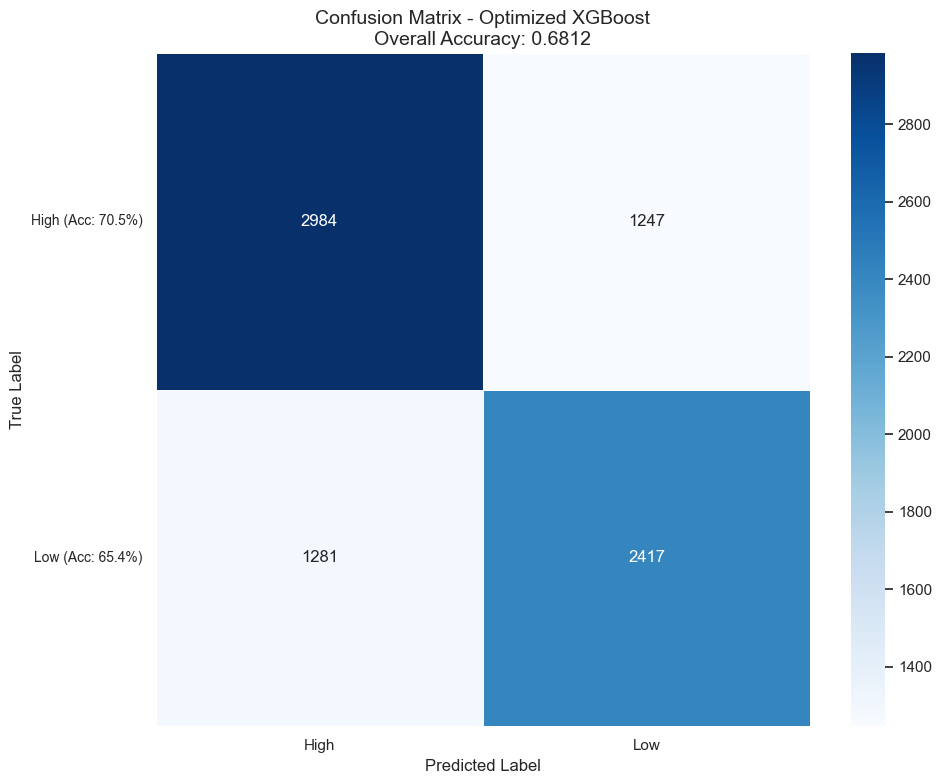


Detailed Classification Metrics:
  Class Precision Recall F1-Score  Support
0  High     70.0%  70.5%    70.2%     4231
1   Low     66.0%  65.4%    65.7%     3698

Calculating feature importance...

Top 15 most important features:
                          Feature  Importance
36                     is_weekend    0.067276
15           data_channel_is_tech    0.054517
14         data_channel_is_socmed    0.045696
12  data_channel_is_entertainment    0.038205
25                     kw_avg_avg    0.037934
34            weekday_is_saturday    0.028874
26      self_reference_min_shares    0.026766
28     self_reference_avg_sharess    0.025993
61                  followers_Low    0.025383
17                     kw_min_min    0.024875
49          min_positive_polarity    0.024432
21                     kw_max_max    0.022092
58                   author_level    0.021979
24                     kw_max_avg    0.021358
65              followers_Unknown    0.017611


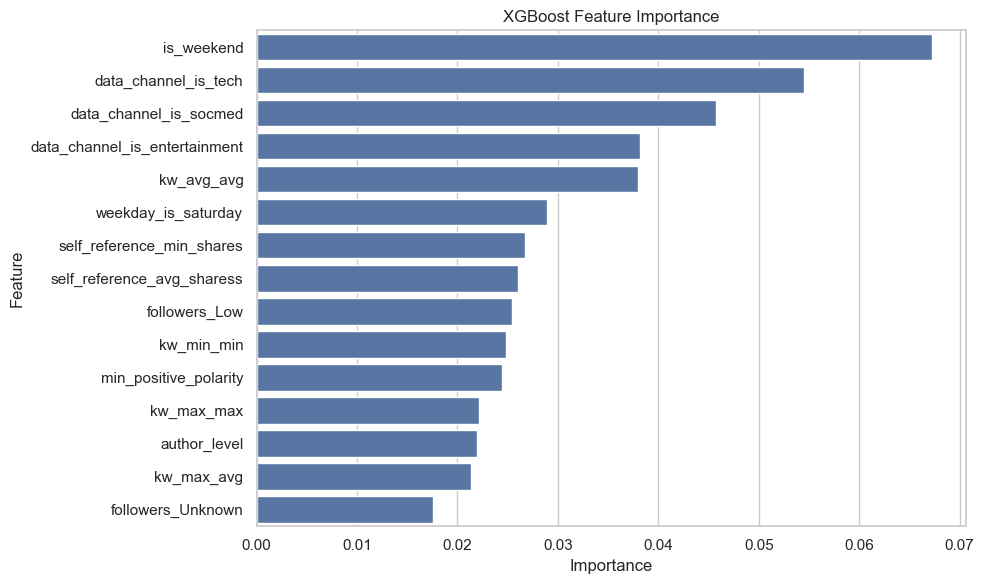

In [50]:
#--------------------
# Efficient XGBoost Tuning - Two-Stage Optimization Method
#--------------------
print("\n" + "="*50)
print("Executing efficient two-stage XGBoost tuning...")

# Stage 1: Use coarse-grained search to determine general direction
print("\nStage 1: Coarse-grained parameter search")

# Create XGBoost model - use model directly rather than pipeline for efficiency
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train)),
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_jobs=-1  # Use parallel processing to speed up search
)

# More focused parameter grid - reduce number of combinations
param_grid_1 = {
    'n_estimators': [200, 300, 400],
    
    # Lower learning rates since the optimal value is already low at 0.05
    'learning_rate': [0.01, 0.03, 0.05],
    
    # Adjust tree depth range
    'max_depth': [4, 5, 6],
    
    # Increase min_child_weight range, current optimal value is at the upper limit
    'min_child_weight': [9, 10, 11],
    
    # Adjust sampling parameters, try more values
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.5, 0.6, 0.7],
    
    # Keep gamma unchanged but add an intermediate value
    'gamma': [0.2, 0.3, 0.4],
    
    # Adjust regularization parameters
    'reg_alpha': [0.3, 0.4, 0.5],
    'reg_lambda': [1, 2, 3]
}

# Use a smaller sample to speed up initial search
sample_size = min(5000, len(X_train_resampled))
print(f"Using {sample_size} samples for initial search")
sample_indices = np.random.choice(len(X_train_resampled), size=sample_size, replace=False)
X_small_sample = X_train_resampled.iloc[sample_indices] if hasattr(X_train_resampled, 'iloc') else X_train_resampled[sample_indices]
y_small_sample = y_train_resampled[sample_indices]

# Standardize data (doing it once outside the pipeline is sufficient)
scaler = StandardScaler()
X_small_sample_scaled = scaler.fit_transform(X_small_sample)

# Stage 1 search - fewer iterations and faster CV
search_1 = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid_1,
    n_iter=10,  # Reduce number of iterations
    cv=3,       # Reduce number of CV folds
    scoring='accuracy',
    n_jobs=-1,  # Parallel processing
    verbose=1,
    random_state=42
)

print("Executing stage 1 search...")
search_1.fit(X_small_sample_scaled, y_small_sample)

# Get best parameters from stage 1
best_params_1 = search_1.best_params_
print(f"\nStage 1 best parameters: {best_params_1}")
print(f"Stage 1 best CV accuracy: {search_1.best_score_:.4f}")

# Stage 2: Fine-grained search around the best parameters
print("\nStage 2: Fine-grained parameter optimization")

# Create more focused parameter ranges based on stage 1 results
param_grid_2 = {
    'n_estimators': [best_params_1['n_estimators'], best_params_1['n_estimators'] + 50, best_params_1['n_estimators'] + 100],
    'learning_rate': [best_params_1['learning_rate'] * 0.5, best_params_1['learning_rate'], best_params_1['learning_rate'] * 1.5],
    'max_depth': [max(best_params_1['max_depth'] - 1, 3), best_params_1['max_depth'], min(best_params_1['max_depth'] + 1, 6)],
    'min_child_weight': [max(best_params_1['min_child_weight'] - 1, 1), best_params_1['min_child_weight'], best_params_1['min_child_weight'] + 1],
    'subsample': [max(best_params_1['subsample'] - 0.1, 0.6), best_params_1['subsample'], min(best_params_1['subsample'] + 0.1, 0.9)],
    'colsample_bytree': [max(best_params_1['colsample_bytree'] - 0.1, 0.4), best_params_1['colsample_bytree'], min(best_params_1['colsample_bytree'] + 0.1, 0.8)],
    'gamma': [max(best_params_1['gamma'] - 0.1, 0.1), best_params_1['gamma'], best_params_1['gamma'] + 0.1],
    'reg_alpha': [max(best_params_1['reg_alpha'] - 0.1, 0.2), best_params_1['reg_alpha'], best_params_1['reg_alpha'] + 0.1],
    'reg_lambda': [max(best_params_1['reg_lambda'] - 1, 1), best_params_1['reg_lambda'], best_params_1['reg_lambda'] + 1]
}

# Use medium-sized sample for stage 2 optimization
sample_size_2 = min(10000, len(X_train_resampled))
print(f"Using {sample_size_2} samples for fine-grained optimization")
sample_indices_2 = np.random.choice(len(X_train_resampled), size=sample_size_2, replace=False)
X_medium_sample = X_train_resampled.iloc[sample_indices_2] if hasattr(X_train_resampled, 'iloc') else X_train_resampled[sample_indices_2]
y_medium_sample = y_train_resampled[sample_indices_2]

# Standardize data
X_medium_sample_scaled = scaler.fit_transform(X_medium_sample)

# Stage 2 search
search_2 = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid_2,
    n_iter=10,  # Reduce number of iterations
    cv=5,       # Use full CV
    scoring='accuracy',
    n_jobs=-1,  # Parallel processing
    verbose=1,
    random_state=42
)

print("Executing stage 2 search...")
search_2.fit(X_medium_sample_scaled, y_medium_sample)

# Get final best parameters
best_params_final = search_2.best_params_
print(f"\nFinal best parameters: {best_params_final}")
print(f"Final best CV accuracy: {search_2.best_score_:.4f}")

# Create final model with best parameters
print("\nTraining final model with best parameters...")
final_xgb = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train)),
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_jobs=-1,
    **best_params_final
)

# Create complete pipeline
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', final_xgb)
])

# Train final model on the full training set
print("Training on full training set...")
final_pipeline.fit(X_train_resampled, y_train_resampled)

# Evaluate on test set
print("Evaluating on test set...")
xgb_tuned_pred = final_pipeline.predict(X_test)
xgb_tuned_accuracy = accuracy_score(y_test, xgb_tuned_pred)
xgb_tuned_f1 = f1_score(y_test, xgb_tuned_pred, average='weighted')

print(f"\nOptimized XGBoost test accuracy: {xgb_tuned_accuracy:.4f}")
print(f"Optimized XGBoost test F1 score: {xgb_tuned_f1:.4f}")

# Plot confusion matrix
plot_confusion_matrix(y_test, xgb_tuned_pred, title='Confusion Matrix - Optimized XGBoost')

# Add to results dictionary
results['Optimized XGBoost'] = {
    'cv_mean': search_2.best_score_,
    'cv_std': 0,
    'test_accuracy': xgb_tuned_accuracy,
    'test_f1': xgb_tuned_f1,
    'model': final_pipeline,
    'predictions': xgb_tuned_pred
}

# Calculate and display feature importance (optional)
print("\nCalculating feature importance...")
feature_importance = final_xgb.feature_importances_
feature_names = X_train_resampled.columns if hasattr(X_train_resampled, 'columns') else [f"feature_{i}" for i in range(X_train_resampled.shape[1])]

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\nTop 15 most important features:")
print(importance_df.head(15))

# Feature importance visualization (optional)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

After conducting advanced hyperparameter tuning for Random Forest and XGBoost, we found that the accuracy still did not improve. This suggests that the model's limitations may caused by deeper issues beyond hyperparameter optimization. One possible reason is that the dataset lacks strong predictive features, making it difficult for any model to achieve high accuracy. Despite these challenges, we have chosen to keep this result. Because it can still provide valuable insights into content engagement patterns. It also highlights, to some extent, the difficulty of predicting the popularity of online news. 

We will now try to use PCA for feature selection, analyze the effect of features with large variance contributions (95%) on accuracy, and try to optimize the run speed.

### **PCA for XGBoost and LightGBM**


Performing XGBoost with PCA feature selection to reduce overfitting...
Using a random subset of 10,000 samples for XGBoost with PCA tuning
Fitting XGBoost with PCA using randomized search...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END model__colsample_bytree=0.8, model__gamma=0.2, model__learning_rate=0.05, model__max_depth=6, model__min_child_weight=1, model__n_estimators=100, model__reg_alpha=0.5, model__reg_lambda=2, model__subsample=0.8; total time=   0.2s
[CV] END model__colsample_bytree=0.8, model__gamma=0.2, model__learning_rate=0.05, model__max_depth=6, model__min_child_weight=1, model__n_estimators=100, model__reg_alpha=0.5, model__reg_lambda=2, model__subsample=0.8; total time=   0.2s
[CV] END model__colsample_bytree=0.8, model__gamma=0.2, model__learning_rate=0.05, model__max_depth=6, model__min_child_weight=1, model__n_estimators=100, model__reg_alpha=0.5, model__reg_lambda=2, model__subsample=0.8; total time=   0.2s
[CV] END model__colsample_byt

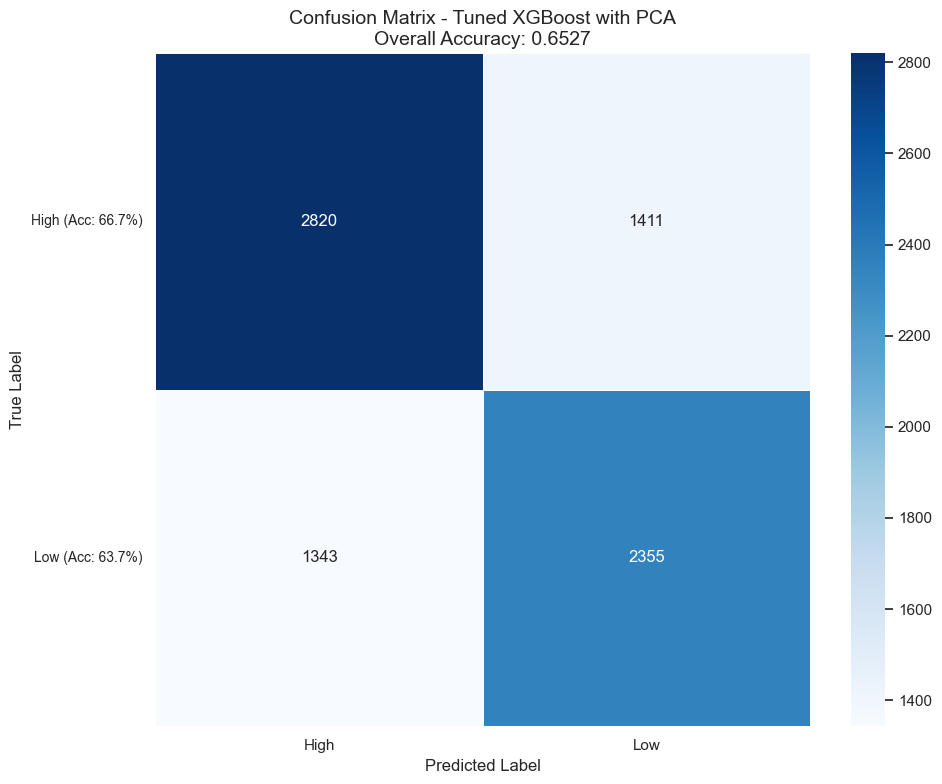


Detailed Classification Metrics:
  Class Precision Recall F1-Score  Support
0  High     67.7%  66.7%    67.2%     4231
1   Low     62.5%  63.7%    63.1%     3698
Number of PCA components in best model: 42


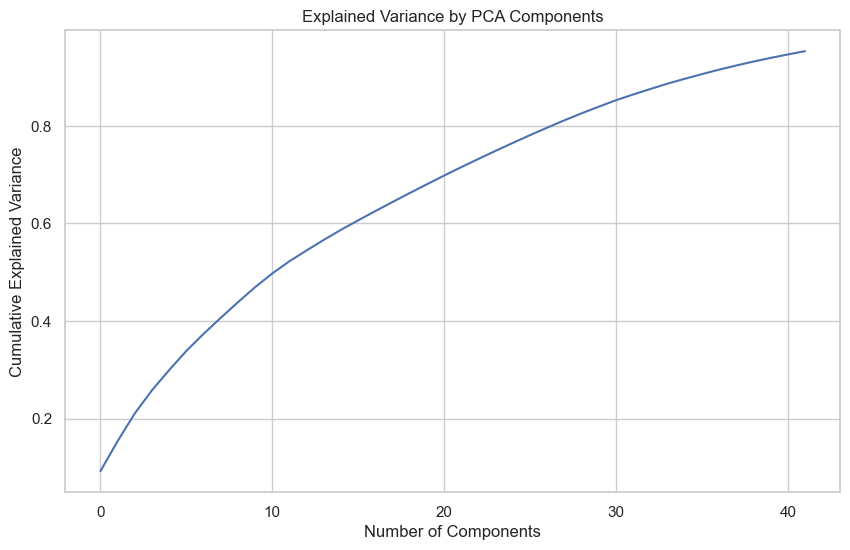

In [51]:
#--------------------
# XGBoost with PCA feature selection to reduce overfitting
#--------------------
print("\n" + "="*50)
print("Performing XGBoost with PCA feature selection to reduce overfitting...")

# Create the XGBoost pipeline with PCA
xgb_pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),  # Keep components that explain 95% of variance
    ('model', xgb.XGBClassifier(
        objective='multi:softmax',
        num_class=len(np.unique(y_train)),
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss'
    ))
])

# Define parameter grid focused on reducing overfitting
xgb_param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 4, 5, 6],
    'model__min_child_weight': [1, 3, 5, 7],
    'model__gamma': [0, 0.1, 0.2, 0.3],
    'model__subsample': [0.6, 0.7, 0.8, 0.9],
    'model__colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'model__reg_alpha': [0, 0.1, 0.5, 1.0, 5.0],
    'model__reg_lambda': [1, 2, 5, 10]
}

# Memory optimization: Use a smaller subset if dataset is large
X_sample, y_sample = X_train_resampled, y_train_resampled
if len(X_train_resampled) > 10000:
    print("Using a random subset of 10,000 samples for XGBoost with PCA tuning")
    sample_indices = np.random.choice(len(X_train_resampled), size=10000, replace=False)
    X_sample = X_train_resampled.iloc[sample_indices] if hasattr(X_train_resampled, 'iloc') else X_train_resampled[sample_indices]
    y_sample = y_train_resampled[sample_indices]

# Define the randomized search
xgb_pca_search = RandomizedSearchCV(
    xgb_pca_pipeline,
    param_distributions=xgb_param_grid,
    n_iter=30,  # Try 30 random combinations
    cv=StratifiedKFold(n_splits=5),
    scoring='accuracy',
    n_jobs=1,  # Use single job for memory efficiency
    verbose=2,
    random_state=42
)

# Fit the randomized search
print("Fitting XGBoost with PCA using randomized search...")
xgb_pca_search.fit(X_sample, y_sample)

# Print best parameters and score
print(f"\nBest XGBoost with PCA parameters: {xgb_pca_search.best_params_}")
print(f"Best XGBoost with PCA CV accuracy: {xgb_pca_search.best_score_:.4f}")

# Evaluate tuned XGBoost on test set
xgb_pca_tuned_pred = xgb_pca_search.predict(X_test)
xgb_pca_tuned_accuracy = accuracy_score(y_test, xgb_pca_tuned_pred)
xgb_pca_tuned_f1 = f1_score(y_test, xgb_pca_tuned_pred, average='weighted')

print(f"Tuned XGBoost with PCA test accuracy: {xgb_pca_tuned_accuracy:.4f}")
print(f"Tuned XGBoost with PCA test F1 score: {xgb_pca_tuned_f1:.4f}")

# Plot confusion matrix for tuned XGBoost with PCA
plot_confusion_matrix(y_test, xgb_pca_tuned_pred, title='Confusion Matrix - Tuned XGBoost with PCA')

# Add tuned model to results
results['Tuned XGBoost with PCA'] = {
    'cv_mean': xgb_pca_search.best_score_,
    'cv_std': 0,
    'test_accuracy': xgb_pca_tuned_accuracy,
    'test_f1': xgb_pca_tuned_f1,
    'model': xgb_pca_search.best_estimator_,
    'predictions': xgb_pca_tuned_pred
}

# Get the number of components used in the best model
best_n_components = xgb_pca_search.best_estimator_.named_steps['pca'].n_components_
print(f"Number of PCA components in best model: {best_n_components}")

# Visualize explained variance ratio
pca = xgb_pca_search.best_estimator_.named_steps['pca']
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


Performing LightGBM with PCA feature selection to reduce overfitting...
Using a random subset of 10,000 samples for LightGBM with PCA tuning
Fitting LightGBM with PCA using randomized search...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END model__colsample_bytree=0.9, model__learning_rate=0.01, model__max_depth=6, model__min_child_samples=20, model__n_estimators=300, model__num_leaves=31, model__reg_alpha=0.5, model__reg_lambda=0.1, model__subsample=0.8; total time=   0.3s
[CV] END model__colsample_bytree=0.9, model__learning_rate=0.01, model__max_depth=6, model__min_child_samples=20, model__n_estimators=300, model__num_leaves=31, model__reg_alpha=0.5, model__reg_lambda=0.1, model__subsample=0.8; total time=   0.3s
[CV] END model__colsample_bytree=0.9, model__learning_rate=0.01, model__max_depth=6, model__min_child_samples=20, model__n_estimators=300, model__num_leaves=31, model__reg_alpha=0.5, model__reg_lambda=0.1, model__subsample=0.8; total time=   0.3s
[C

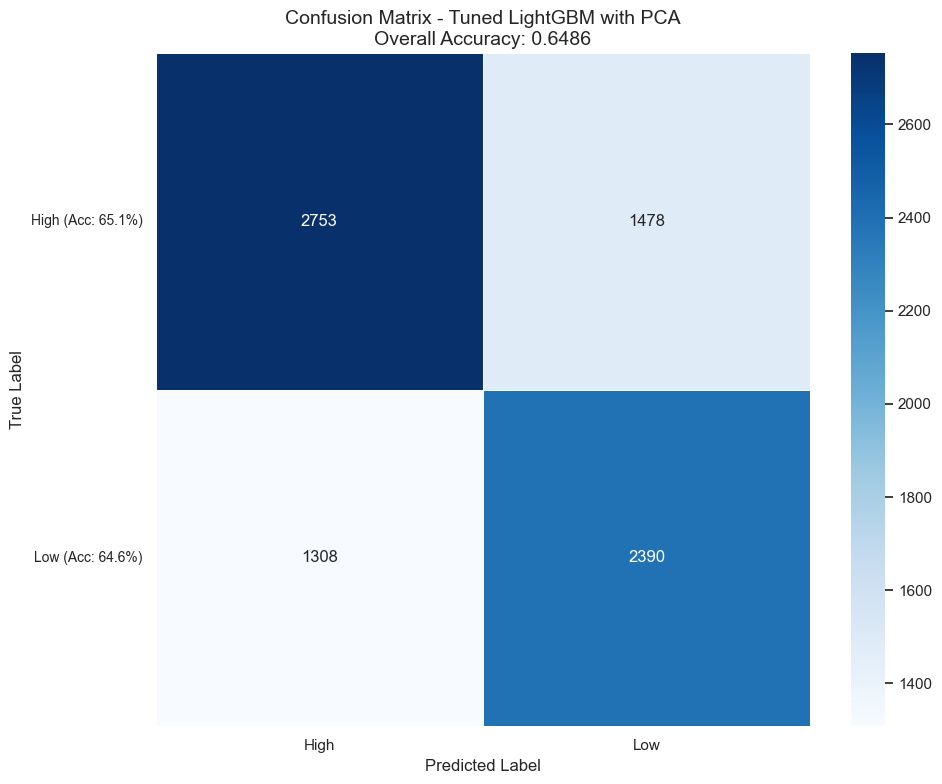


Detailed Classification Metrics:
  Class Precision Recall F1-Score  Support
0  High     67.8%  65.1%    66.4%     4231
1   Low     61.8%  64.6%    63.2%     3698
Number of PCA components in best model: 42


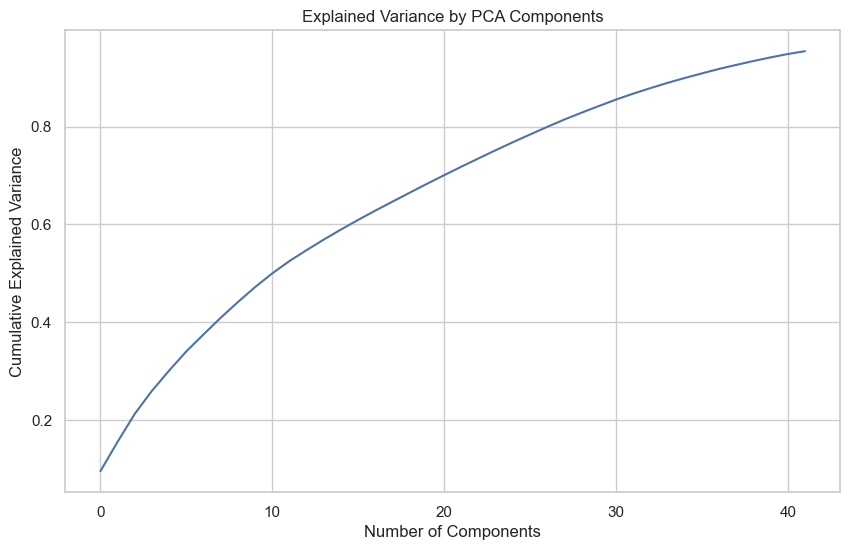

In [52]:
#--------------------
# LightGBM with PCA feature selection to reduce overfitting
#--------------------
print("\n" + "="*50)
print("Performing LightGBM with PCA feature selection to reduce overfitting...")

# Create the LightGBM pipeline with PCA
lgbm_pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),  # Keep components that explain 95% of variance
    ('model', lgb.LGBMClassifier(
        objective='multiclass',
        num_class=len(np.unique(y_train)),
        random_state=42,
        verbose=-1
    ))
])

# Define parameter grid focused on reducing overfitting
lgbm_param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 4, 5, 6],
    'model__num_leaves': [15, 31, 63, 127],
    'model__min_child_samples': [5, 10, 20, 50],
    'model__subsample': [0.6, 0.7, 0.8, 0.9],
    'model__colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'model__reg_alpha': [0, 0.1, 0.5, 1.0],
    'model__reg_lambda': [0, 0.1, 0.5, 1.0]
}

# Memory optimization: Use a smaller subset if dataset is large
X_sample, y_sample = X_train_resampled, y_train_resampled
if len(X_train_resampled) > 10000:
    print("Using a random subset of 10,000 samples for LightGBM with PCA tuning")
    sample_indices = np.random.choice(len(X_train_resampled), size=10000, replace=False)
    X_sample = X_train_resampled.iloc[sample_indices] if hasattr(X_train_resampled, 'iloc') else X_train_resampled[sample_indices]
    y_sample = y_train_resampled[sample_indices]

# Define the randomized search
lgbm_pca_search = RandomizedSearchCV(
    lgbm_pca_pipeline,
    param_distributions=lgbm_param_grid,
    n_iter=30,  # Try 30 random combinations
    cv=StratifiedKFold(n_splits=5),
    scoring='accuracy',
    n_jobs=1,  # Use single job for memory efficiency
    verbose=2,
    random_state=42
)

# Fit the randomized search
print("Fitting LightGBM with PCA using randomized search...")
lgbm_pca_search.fit(X_sample, y_sample)

# Print best parameters and score
print(f"\nBest LightGBM with PCA parameters: {lgbm_pca_search.best_params_}")
print(f"Best LightGBM with PCA CV accuracy: {lgbm_pca_search.best_score_:.4f}")

# Evaluate tuned LightGBM on test set
lgbm_pca_tuned_pred = lgbm_pca_search.predict(X_test)
lgbm_pca_tuned_accuracy = accuracy_score(y_test, lgbm_pca_tuned_pred)
lgbm_pca_tuned_f1 = f1_score(y_test, lgbm_pca_tuned_pred, average='weighted')

print(f"Tuned LightGBM with PCA test accuracy: {lgbm_pca_tuned_accuracy:.4f}")
print(f"Tuned LightGBM with PCA test F1 score: {lgbm_pca_tuned_f1:.4f}")

# Plot confusion matrix for tuned LightGBM with PCA
plot_confusion_matrix(y_test, lgbm_pca_tuned_pred, title='Confusion Matrix - Tuned LightGBM with PCA')

# Add tuned model to results
results['Tuned LightGBM with PCA'] = {
    'cv_mean': lgbm_pca_search.best_score_,
    'cv_std': 0,
    'test_accuracy': lgbm_pca_tuned_accuracy,
    'test_f1': lgbm_pca_tuned_f1,
    'model': lgbm_pca_search.best_estimator_,
    'predictions': lgbm_pca_tuned_pred
}

# Get the number of components used in the best model
best_n_components = lgbm_pca_search.best_estimator_.named_steps['pca'].n_components_
print(f"Number of PCA components in best model: {best_n_components}")

# Optional: Visualize explained variance ratio
pca = lgbm_pca_search.best_estimator_.named_steps['pca']
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

We found that the model performance got a little worse after PCA, but the runtime was significantly faster. Considering the practicality, we need to make a trade-off between time and performance for different tasks.


UPDATED MODEL COMPARISON

Model Comparison:
                      Model  CV Accuracy  Test Accuracy  Test F1 Score
9         Optimized XGBoost     0.681000       0.681170       0.681072
6            Top 3 Stacking     0.000000       0.676882       0.677247
4                  LightGBM     0.676299       0.673855       0.673478
8   Optimized Random Forest     0.673200       0.672847       0.672884
1             Random Forest     0.672960       0.671333       0.670896
2         Gradient Boosting     0.671187       0.670198       0.670323
0       Logistic Regression     0.654731       0.664144       0.663429
3                   XGBoost     0.663831       0.661244       0.661126
7      Tuned Top 3 Stacking     0.678401       0.660487       0.659929
10   Tuned XGBoost with PCA     0.654600       0.652667       0.652843
11  Tuned LightGBM with PCA     0.649800       0.648632       0.648977
5            Neural Network     0.607251       0.614453       0.614588


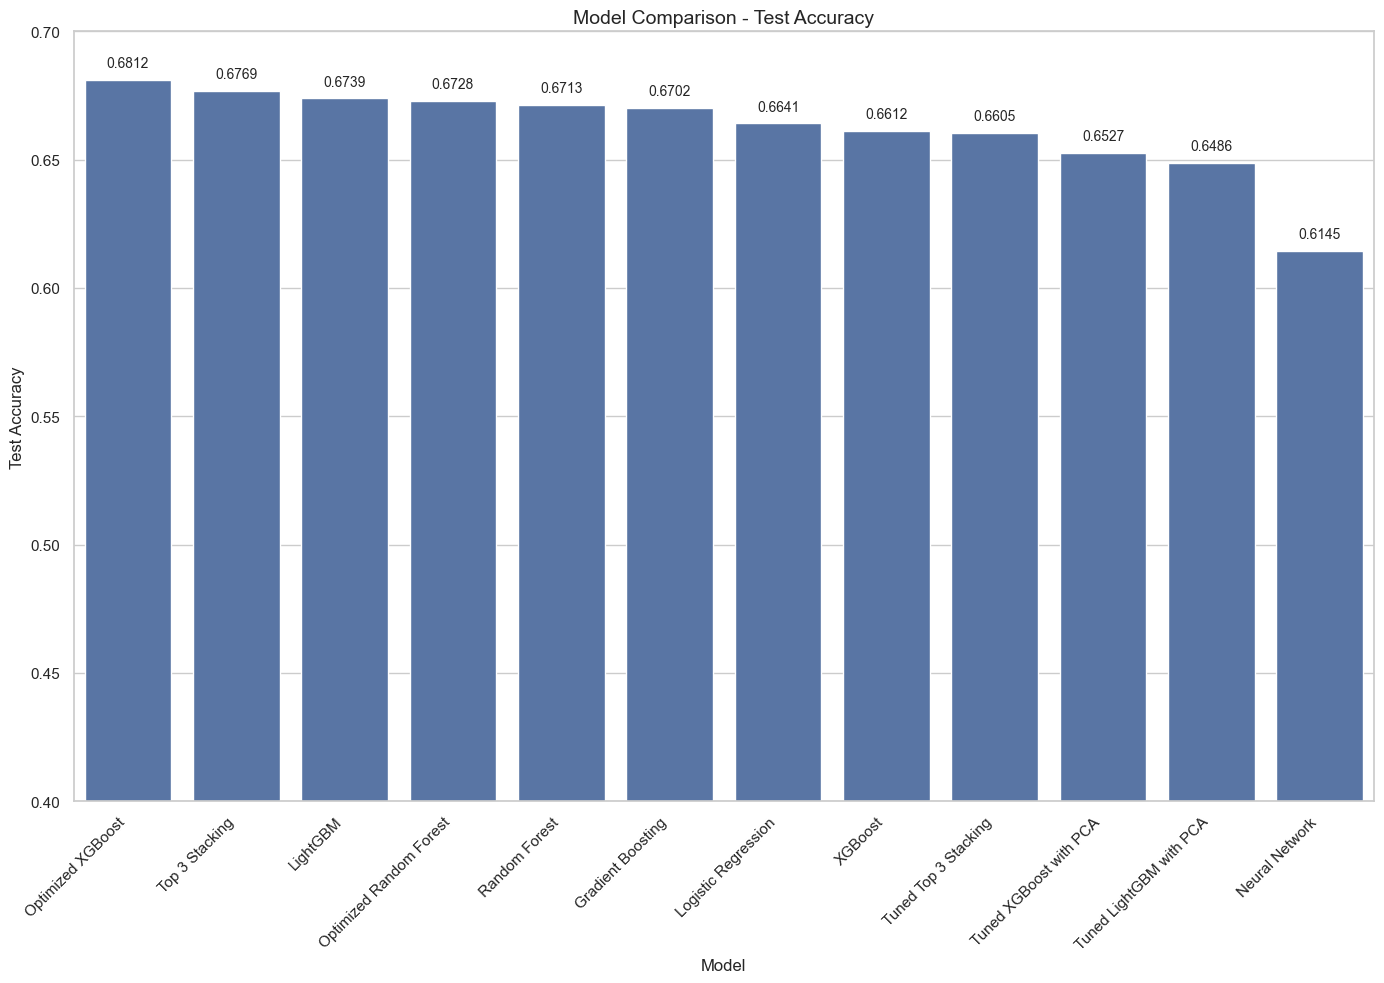

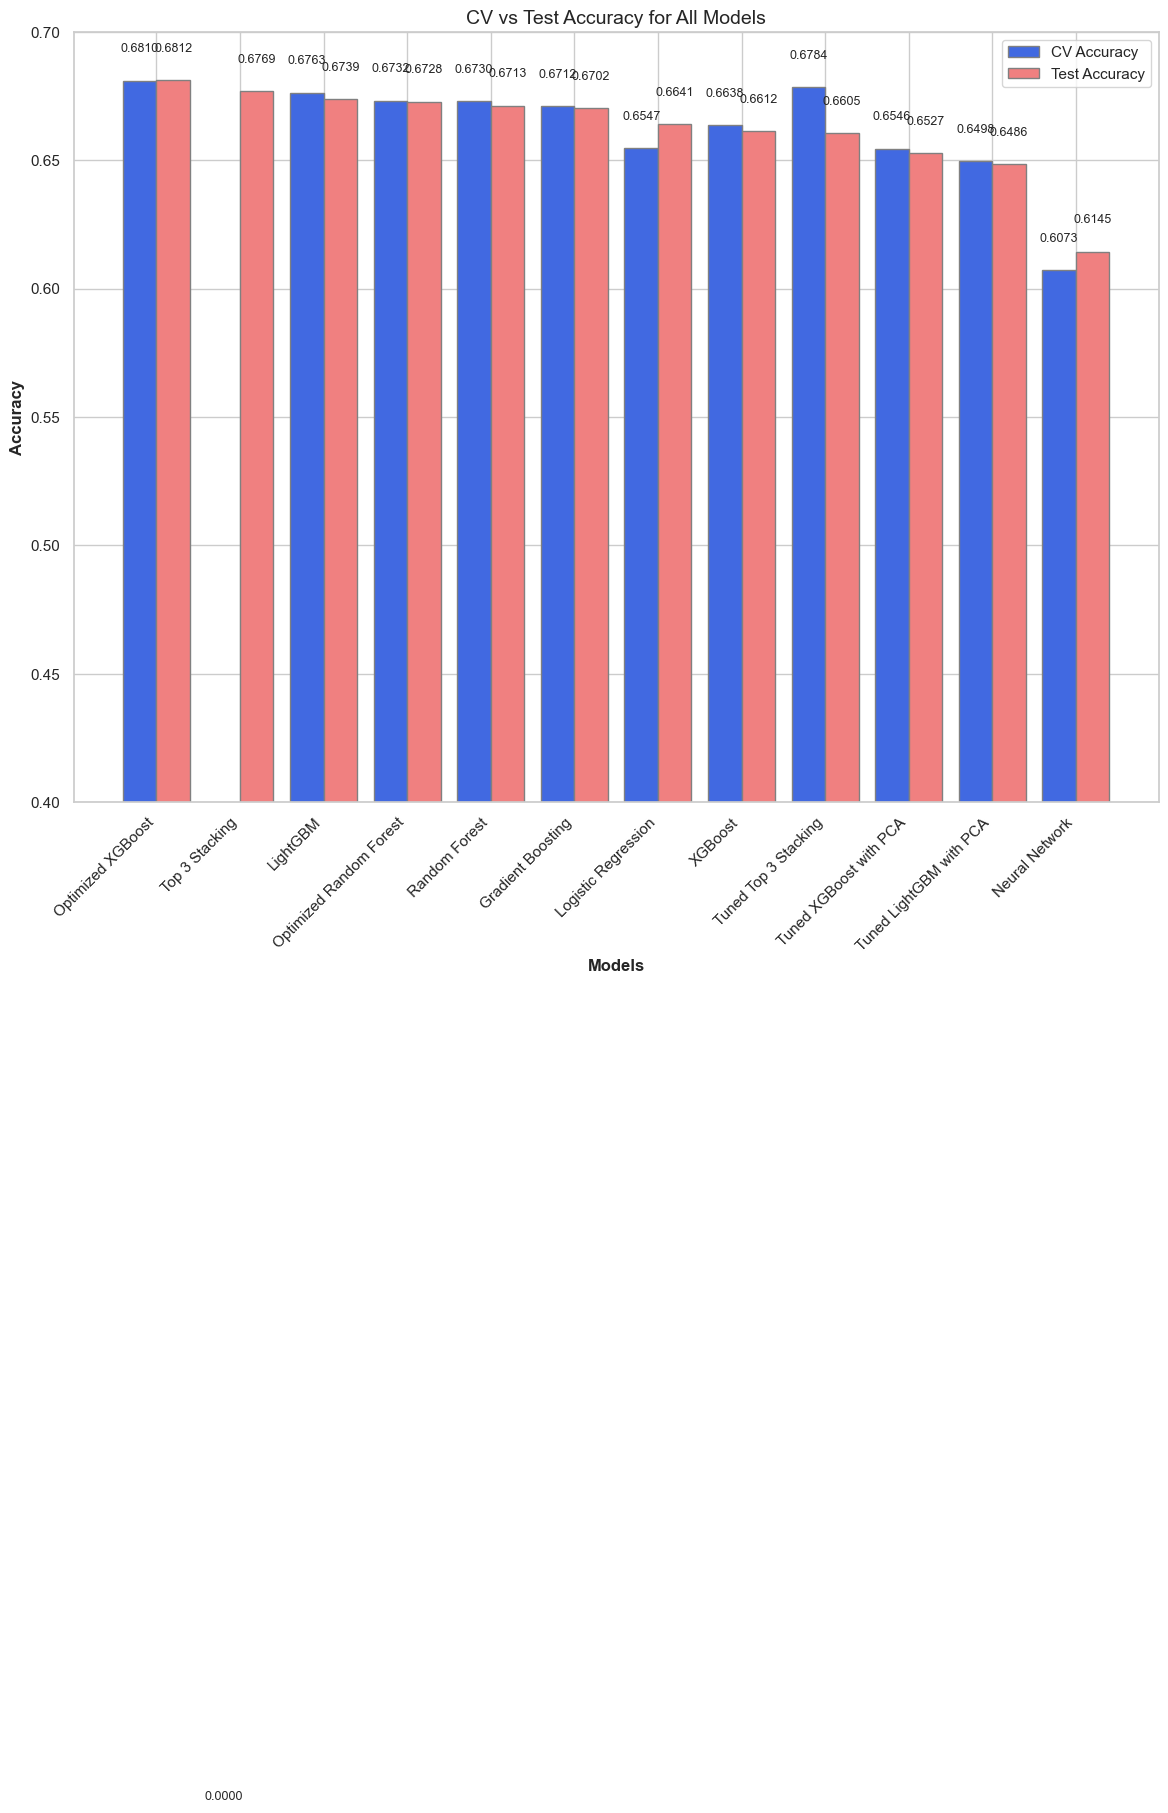


Best model after extended tuning: Optimized XGBoost
Test accuracy: 0.6812
Test F1 score: 0.6811


In [53]:
#--------------------
# Updated Model Comparison
#--------------------
print("\n" + "="*80)
print("UPDATED MODEL COMPARISON")
print("="*80)

# Create comparison DataFrame
model_comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'CV Accuracy': [results[model]['cv_mean'] for model in results],
    'Test Accuracy': [results[model]['test_accuracy'] for model in results],
    'Test F1 Score': [results[model]['test_f1'] for model in results]
})

model_comparison = model_comparison.sort_values('Test Accuracy', ascending=False)
print("\nModel Comparison:")
print(model_comparison)

# Plot model comparison
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='Model', y='Test Accuracy', data=model_comparison)

# Add value labels on top of bars
for i, bar in enumerate(ax.patches):
    ax.text(
        bar.get_x() + bar.get_width()/2.,
        bar.get_height() + 0.005,
        f"{bar.get_height():.4f}",
        ha='center',
        fontsize=10
    )

plt.title('Model Comparison - Test Accuracy', fontsize=14)
plt.ylim(0.4, 0.7)  # Adjust y-axis range
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot a second graph comparing CV vs Test accuracy
plt.figure(figsize=(14, 10))

# Create a styled bar chart for CV vs Test comparison
model_names = model_comparison['Model'].tolist()
cv_acc = model_comparison['CV Accuracy'].tolist()
test_acc = model_comparison['Test Accuracy'].tolist()

# Set width of bars
barWidth = 0.4
r1 = np.arange(len(model_names))
r2 = [x + barWidth for x in r1]

# Create grouped bars
plt.bar(r1, cv_acc, width=barWidth, label='CV Accuracy', color='royalblue', edgecolor='grey')
plt.bar(r2, test_acc, width=barWidth, label='Test Accuracy', color='lightcoral', edgecolor='grey')

# Add labels and legend
plt.xlabel('Models', fontweight='bold', fontsize=12)
plt.ylabel('Accuracy', fontweight='bold', fontsize=12)
plt.title('CV vs Test Accuracy for All Models', fontsize=14)
plt.xticks([r + barWidth/2 for r in range(len(model_names))], model_names, rotation=45, ha='right')
plt.legend()

# Add value labels on top of bars
for i in range(len(r1)):
    plt.text(r1[i], cv_acc[i] + 0.01, f"{cv_acc[i]:.4f}", ha='center', va='bottom', fontsize=9)
    plt.text(r2[i], test_acc[i] + 0.01, f"{test_acc[i]:.4f}", ha='center', va='bottom', fontsize=9)

plt.ylim(0.4, 0.7)  # Adjust y-axis range
plt.tight_layout()
plt.show()

# Identify the best model
best_model_name = model_comparison.iloc[0]['Model']
print(f"\nBest model after extended tuning: {best_model_name}")
print(f"Test accuracy: {model_comparison.iloc[0]['Test Accuracy']:.4f}")
print(f"Test F1 score: {model_comparison.iloc[0]['Test F1 Score']:.4f}")

# If the best model is Random Forest or XGBoost, show their optimized parameters
if 'Tuned Random Forest' in best_model_name:
    print("\nOptimal Random Forest parameters:")
    best_params = {k.replace('model__', ''): v for k, v in rf_search.best_params_.items()}
    for param, value in best_params.items():
        print(f"  {param}: {value}")
elif 'Tuned XGBoost' in best_model_name:
    print("\nOptimal XGBoost parameters:")
    best_params = {k.replace('model__', ''): v for k, v in xgb_search.best_params_.items()}
    for param, value in best_params.items():
        print(f"  {param}: {value}")

After conducting advanced hyperparameter tuning for Random Forest and XGBoost, we found that the accuracy still did not improve. This suggests that the model's limitations may caused by deeper issues beyond hyperparameter optimization. One possible reason is that the dataset lacks strong predictive features, making it difficult for any model to achieve high accuracy. Despite these challenges, we have chosen to keep this result. Because it can still provide valuable insights into content engagement patterns. It also highlights, to some extent, the difficulty of predicting the popularity of online news. 

## **Conclusion**

In our study of online news popularity, we identified several key factors that influence the number of shares. Keywords including their relevance and quantity play an important role in driving engagement. It indicates that well-optimized content can improve shareability. Subjectivity also has a strong correlation. Articles with a more emotionally engaging tone are more likely to be shared. However, despite extensive model tuning and feature selection, our machine learning models achieved a maximum accuracy of 52 percent. It may be because predicting news shareability remains a complex task influenced by unpredictable external factors such as trending topics and social media dynamics. One of the main challenges we faced was the high imbalance in class distribution. We choosed using SMOTE to solve the problem, though it may  lead us to a composite pattern that does not generalize well to real scenes. Moving forward, we can improve our approach by integrating real-time social media data and user engagement metrics to enhance prediction accuracy.